# LOL  EDA_part2

## 변수 설명 

##### championName_100_1-5// 200_6-10 : 챔피언 이름 (0-5: 블루 , 6-10: 레드)
##### teamPosition_100_1-5 // 200_6-10 : 챔피언 라인 
##### totalGold_100_1-5// 200_6-10 : 15분 당시 들고 있던 골드량 
##### level_100_1-5 //200_6-10: 15분 당시 챔피언 별 레벨 
##### minionsKilled_100_1
##### jungleMinionsKilled_100_1

## 모델링 하기 
### 로지스틱 회귀 분석 


# 1.데이터 불러오고 확인하기

In [3]:
#라이브러리 가져오기 
# numerical calculation & data frames
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so

# statistics
import statsmodels.api as sm

# pandas options
pd.set_option('mode.copy_on_write', True)  # pandas 2.0
pd.options.display.float_format = '{:.2f}'.format  # pd.reset_option('display.float_format')
pd.options.display.max_rows = 7  # max number of rows to display

# NumPy options
np.set_printoptions(precision = 2, suppress=True)  # suppress scientific notation

# For high resolution display
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats("retina")

In [3]:
# col 생략 없이 출력
pd.set_option('display.max_columns', None)

In [4]:
#데이터 가져오기 
matchdata=pd.read_csv('matchdata_45000.csv')
matchdata
match_total=pd.read_csv('match_total.csv')

In [7]:
print(matchdata.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44547 entries, 0 to 44546
Columns: 140 entries, matchid to winteam
dtypes: float64(118), object(22)
memory usage: 47.6+ MB
None


# 결측치 처리하기 

In [4]:
#결측치 확인하기 
matchdata.isnull().sum()

matchid                   0
championName_100_1     1250
championName_100_2     1250
championName_100_3     1250
championName_100_4     1250
                       ... 
player7magicdamage     1125
player8magicdamage     1125
player9magicdamage     1125
player10magicdamage    1125
winteam                1187
Length: 140, dtype: int64

In [5]:
# player 0 으로 되어있는 칼럼들 삭제
matchdata=matchdata.drop(['player0kills', 'player0assists', 'player0deaths','Unnamed: 0'],axis=1)

In [28]:
matchdata

matchid championName_100_1 championName_100_2 championName_100_3  \
0      KR_6965278983              Teemo               Ekko           Tristana   
1      KR_6961163006        Mordekaiser                 Vi             Irelia   
2      KR_6990258458            XinZhao           Volibear               Ahri   
3      KR_6987828402          Gangplank            Nidalee           Tristana   
4      KR_6985798489             Darius              Shaco               Ahri   
...              ...                ...                ...                ...   
37875  KR_6879214617             Illaoi              Ivern             Syndra   
37876  KR_6972979983            Karthus             Singed             Aatrox   
37877  KR_6975916818             Gragas             Graves               Yone   
37878  KR_6968177944           Renekton             Lillia              Akali   
37879  KR_6961832296               Gnar              Sylas                Zed   

      championName_100_4 championName_100_5 championName_200_6  \
0                  Nilah             Maokai               Ryze   
1                Smolder                Lux           Volibear   
2                Smolder              Braum              Kayle   
3                  Varus               Lulu              Karma   
4                   Jinx               Bard              Garen   
...                  ...                ...                ...   
37875               Jinx               Sett             Darius   
37876           Tristana           Nautilus               Sett   
37877               Jhin             Xerath              Yasuo   
37878             Ezreal              Swain             Aatrox   
37879        MissFortune             Soraka               Gwen   

      championName_200_7 championName_200_8 championName_200_9  \
0                 LeeSin        TwistedFate             Ezreal   
1                   Ekko              Galio             Ezreal   
2               Nocturne        AurelionSol               Jinx   
3             MonkeyKing              Brand               Jinx   
4                     Vi               Hwei             KogMaw   
...                  ...                ...                ...   
37875             Graves              Neeko               Ashe   
37876             Khazix            Taliyah              Xayah   
37877              Brand               Hwei             Draven   
37878              Brand               Yone               Zeri   
37879              Viego              Talon             Ezreal   

      championName_200_10 teamPosition_100_1 teamPosition_100_2  \
0                   Karma                TOP             JUNGLE   
1                     Zoe                TOP             JUNGLE   
2                 Camille                TOP             JUNGLE   
3                  Maokai                TOP             JUNGLE   
4                    Lulu                TOP             JUNGLE   
...                   ...                ...                ...   
37875              Thresh                TOP             JUNGLE   
37876               Leona                TOP             JUNGLE   
37877          Blitzcrank                TOP             JUNGLE   
37878                Lulu                TOP             JUNGLE   
37879               Senna                TOP             JUNGLE   

      teamPosition_100_3 teamPosition_100_4 teamPosition_100_5  \
0                 MIDDLE             BOTTOM            UTILITY   
1                 MIDDLE             BOTTOM            UTILITY   
2                 MIDDLE             BOTTOM            UTILITY   
3                 MIDDLE             BOTTOM            UTILITY   
4                 MIDDLE             BOTTOM            UTILITY   
...                  ...                ...                ...   
37875             MIDDLE             BOTTOM            UTILITY   
37876             MIDDLE             BOTTOM            UTILITY   
37877             MIDDLE             BOTTOM            

In [7]:
matchdata=matchdata.dropna()

In [8]:
matchdata.shape

(37880, 136)

In [9]:
matchdata

matchid championName_100_1 championName_100_2 championName_100_3  \
0      KR_6965278983              Teemo               Ekko           Tristana   
1      KR_6961163006        Mordekaiser                 Vi             Irelia   
2      KR_6990258458            XinZhao           Volibear               Ahri   
4      KR_6987828402          Gangplank            Nidalee           Tristana   
5      KR_6985798489             Darius              Shaco               Ahri   
...              ...                ...                ...                ...   
43292  KR_6879214617             Illaoi              Ivern             Syndra   
43293  KR_6972979983            Karthus             Singed             Aatrox   
43294  KR_6975916818             Gragas             Graves               Yone   
43295  KR_6968177944           Renekton             Lillia              Akali   
43296  KR_6961832296               Gnar              Sylas                Zed   

      championName_100_4 championName_100_5 championName_200_6  \
0                  Nilah             Maokai               Ryze   
1                Smolder                Lux           Volibear   
2                Smolder              Braum              Kayle   
4                  Varus               Lulu              Karma   
5                   Jinx               Bard              Garen   
...                  ...                ...                ...   
43292               Jinx               Sett             Darius   
43293           Tristana           Nautilus               Sett   
43294               Jhin             Xerath              Yasuo   
43295             Ezreal              Swain             Aatrox   
43296        MissFortune             Soraka               Gwen   

      championName_200_7 championName_200_8 championName_200_9  ...  \
0                 LeeSin        TwistedFate             Ezreal  ...   
1                   Ekko              Galio             Ezreal  ...   
2               Nocturne        AurelionSol               Jinx  ...   
4             MonkeyKing              Brand               Jinx  ...   
5                     Vi               Hwei             KogMaw  ...   
...                  ...                ...                ...  ...   
43292             Graves              Neeko               Ashe  ...   
43293             Khazix            Taliyah              Xayah  ...   
43294              Brand               Hwei             Draven  ...   
43295              Brand               Yone               Zeri  ...   
43296              Viego              Talon             Ezreal  ...   

      player2magicdamage player3magicdamage player4magicdamage  \
0                 2855.0              489.0                0.0   
1                    0.0             1950.0              723.0   
2                 1518.0             4227.0             1143.0   
4                 4008.0             1384.0             1270.0   
5                 1370.0             2563.0              367.0   
...                  ...                ...                ...   
43292             1111.0             9242.0              300.0   
43293             5729.0             1545.0              802.0   
43294              306.0             1693.0              338.0   
43295             4949.0             8175.0              920.0   
43296             7291.0              588.0              351.0   

      player5magicdamage player6magicdamage player7magicdamage  \
0                 3382.0             8017.0             1577.0   
1                 4491.0             2548.0             4958.0   
2                 3292.0             2894.0              219.0   
4                 1326.0             5847.0              562.0   
5                 1959.0                0.0                0.0   
...                  ...                ...                ...   
43292              276.0                0.0              219.0   
43293             1985.0                0.0              393.0   
43294  

In [68]:
# matchdata.to_csv('결측치_제거_37880.csv', index=False)  

# 2. 결측치 제거된 파일로 EDA 하기

### 승리에 영향을 끼치는 변수는 무엇일까? 

In [4]:
matchdata=pd.read_csv('결측치_제거_37880.csv')

### 챔피언 이름

In [40]:
matchdata.iloc[:,1:11]

championName_100_1 championName_100_2 championName_100_3  \
0                  Teemo               Ekko           Tristana   
1            Mordekaiser                 Vi             Irelia   
2                XinZhao           Volibear               Ahri   
...                  ...                ...                ...   
37877             Gragas             Graves               Yone   
37878           Renekton             Lillia              Akali   
37879               Gnar              Sylas                Zed   

      championName_100_4 championName_100_5 championName_200_6  \
0                  Nilah             Maokai               Ryze   
1                Smolder                Lux           Volibear   
2                Smolder              Braum              Kayle   
...                  ...                ...                ...   
37877               Jhin             Xerath              Yasuo   
37878             Ezreal              Swain             Aatrox   
37879        MissFortune             Soraka               Gwen   

      championName_200_7 championName_200_8 championName_200_9  \
0                 LeeSin        TwistedFate             Ezreal   
1                   Ekko              Galio             Ezreal   
2               Nocturne        AurelionSol               Jinx   
...                  ...                ...                ...   
37877              Brand               Hwei             Draven   
37878              Brand               Yone               Zeri   
37879              Viego              Talon             Ezreal   

      championName_200_10  
0                   Karma  
1                     Zoe  
2                 Camille  
...                   ...  
37877          Blitzcrank  
37878                Lulu  
37879               Senna  

[37880 rows x 10 columns]

In [41]:
matchdata.iloc[:,1:11]=matchdata.iloc[:,1:11].astype('category')

C:\Users\jys72\AppData\Local\Temp\ipykernel_7088\2107396520.py:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  matchdata.iloc[:,1:11]=matchdata.iloc[:,1:11].astype('category')


### 챔피언 라인 
#### 라인 확인 해보고 라인 스왑하기 

In [8]:
 matchdata.iloc[:,11:21]

teamPosition_100_1 teamPosition_100_2 teamPosition_100_3  \
0                    TOP             JUNGLE             MIDDLE   
1                    TOP             JUNGLE             MIDDLE   
2                    TOP             JUNGLE             MIDDLE   
...                  ...                ...                ...   
37877                TOP             JUNGLE             MIDDLE   
37878                TOP             JUNGLE             MIDDLE   
37879                TOP             JUNGLE             MIDDLE   

      teamPosition_100_4 teamPosition_100_5 teamPosition_200_6  \
0                 BOTTOM            UTILITY                TOP   
1                 BOTTOM            UTILITY                TOP   
2                 BOTTOM            UTILITY                TOP   
...                  ...                ...                ...   
37877             BOTTOM            UTILITY                TOP   
37878             BOTTOM            UTILITY                TOP   
37879             BOTTOM            UTILITY                TOP   

      teamPosition_200_7 teamPosition_200_8 teamPosition_200_9  \
0                 JUNGLE             MIDDLE             BOTTOM   
1                 JUNGLE             MIDDLE             BOTTOM   
2                 JUNGLE             MIDDLE             BOTTOM   
...                  ...                ...                ...   
37877             JUNGLE             MIDDLE             BOTTOM   
37878             JUNGLE             MIDDLE             BOTTOM   
37879             JUNGLE             MIDDLE             BOTTOM   

      teamPosition_200_10  
0                 UTILITY  
1                 UTILITY  
2                 UTILITY  
...                   ...  
37877             UTILITY  
37878             UTILITY  
37879             UTILITY  

[37880 rows x 10 columns]

In [48]:
# 라인 확인해보기
matchdata['teamPosition_100_1'].value_counts()

TOP        36793
MIDDLE       672
JUNGLE       180
UTILITY      167
BOTTOM        68
Name: teamPosition_100_1, dtype: int64

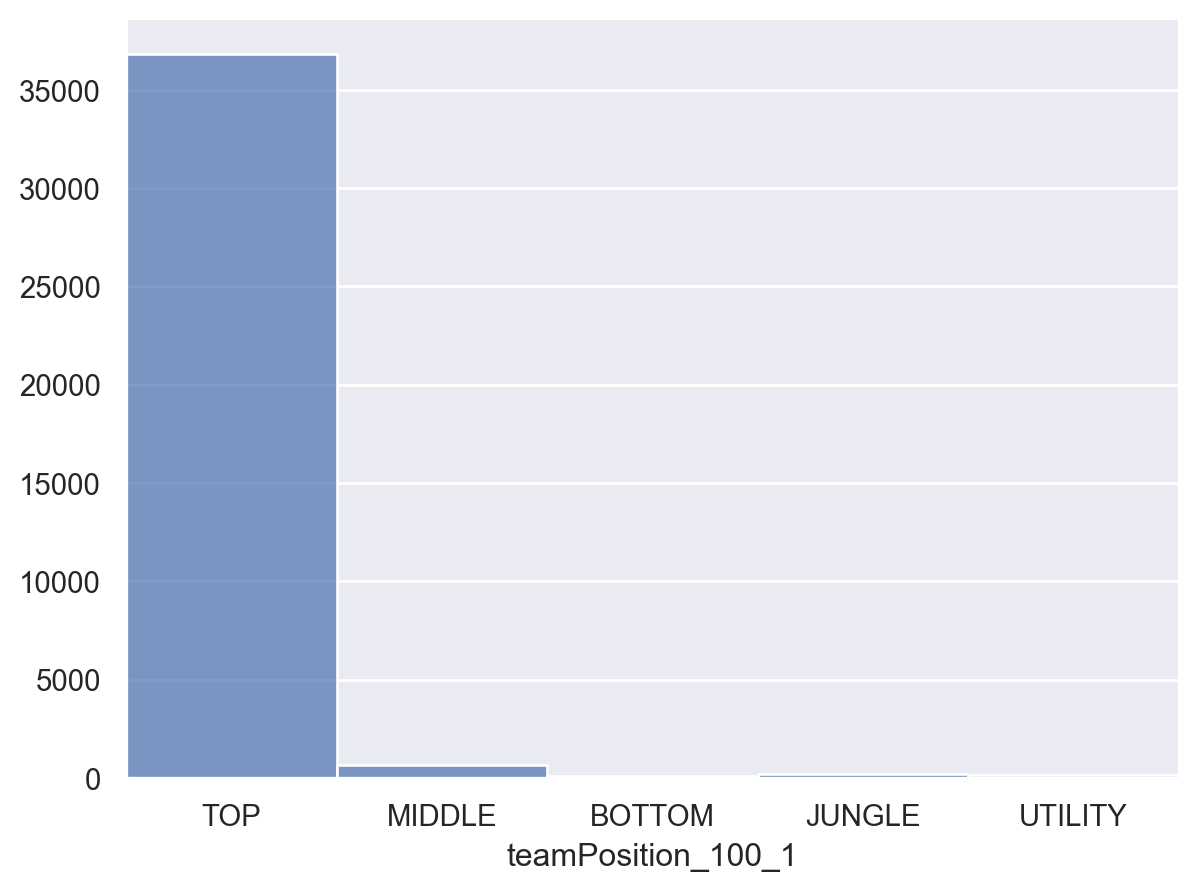

In [51]:

(
    so.Plot(matchdata, x="teamPosition_100_1")
    .add(so.Bars(), so.Hist(binwidth=50))
)

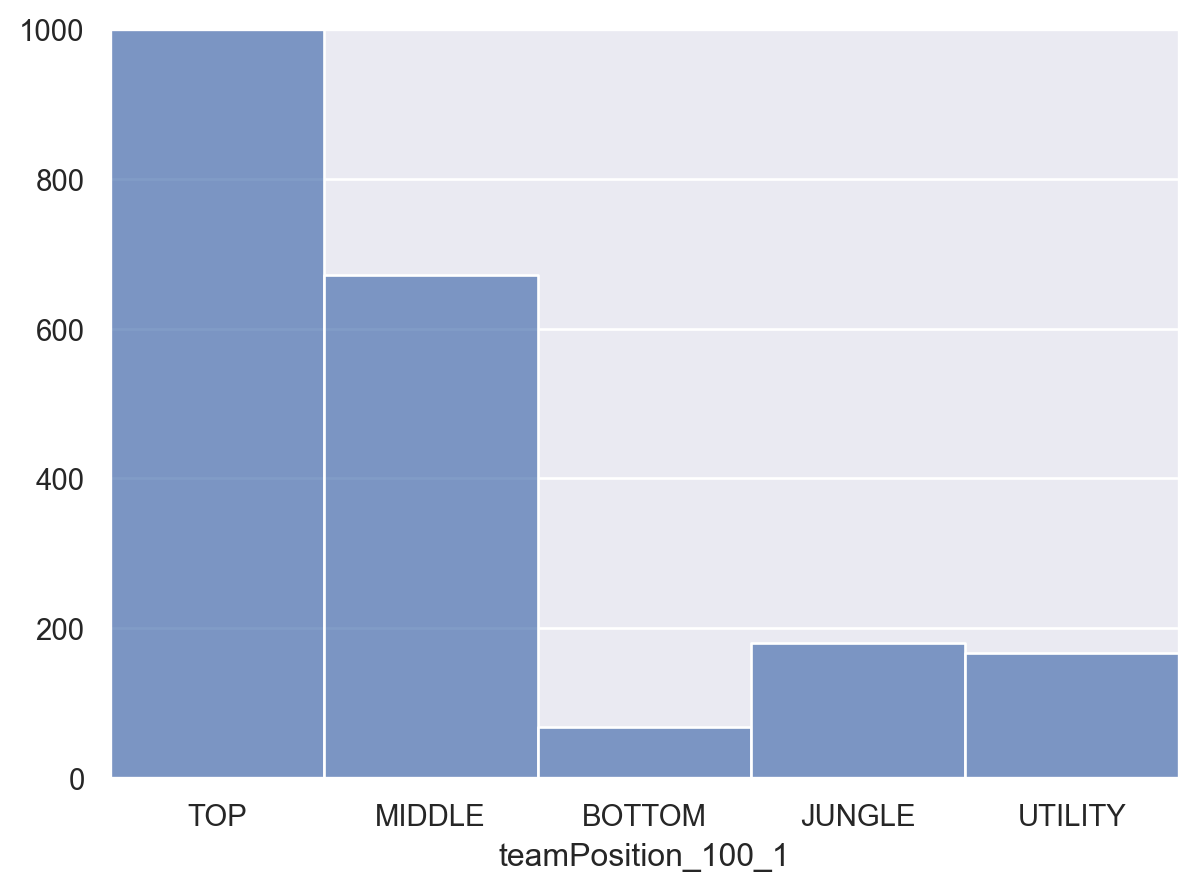

In [52]:
# Zoom-in
(
    so.Plot(matchdata, x="teamPosition_100_1")
    .add(so.Bars(), so.Hist(binwidth=1000))
    .limit(y=(0, 1000))
)

#### 라인 별로 챔피언과 묶는 딕셔너리 만들기 

In [6]:
matchdata['champosition'] = None  # 새로운 열을 None으로 초기화

for i in range(len(matchdata)):
    champositions = {}  # 각 행의 챔피언과 포지션을 담을 딕셔너리 초기화
    champo = {}  # 각 행의 챔피언과 포지션을 담을 딕셔너리 초기화
    for j in range(1, 6):  # 1부터 5까지 (포지션은 1부터 5까지)
        champion = matchdata.iloc[i, j]  # 챔피언 이름
        position = matchdata.iloc[i, j + 10]  # 챔피언의 포지션
        champo[f'champion{j}'] = champion  # 챔피언 이름을 딕셔너리에 추가
        champo[f'position{j}'] = position  # 챔피언 포지션을 딕셔너리에 추가
        champositions[position] = champion  # 포지션을 키로 사용하여 챔피언을 추가
    
    matchdata.at[i, 'champosition'] = champositions  # 각 행의 'champosition' 열에 딕셔너리 할당


In [7]:
matchdata['champosition2'] = None  # 새로운 열을 None으로 초기화

for i in range(len(matchdata)):
    champositions = {}  # 각 행의 챔피언과 포지션을 담을 딕셔너리 초기화
    champo = {}  # 각 행의 챔피언과 포지션을 담을 딕셔너리 초기화
    for j in range(6,11):  # 1부터 5까지 (포지션은 1부터 5까지)
        champion = matchdata.iloc[i, j]  # 챔피언 이름
        position = matchdata.iloc[i, j + 10]  # 챔피언의 포지션
        champo[f'champion{j}'] = champion  # 챔피언 이름을 딕셔너리에 추가
        champo[f'position{j}'] = position  # 챔피언 포지션을 딕셔너리에 추가
        champositions[position] = champion  # 포지션을 키로 사용하여 챔피언을 추가
    
    matchdata.at[i, 'champosition2'] = champositions  # 각 행의 'champosition' 열에 딕셔너리 할당


In [8]:

for i in range(len(matchdata)):
    matchdata.at[i,'ChampionName_100_1']=matchdata['champosition'][i]['TOP']
    matchdata.at[i,'ChampionName_100_2']=matchdata['champosition'][i]['JUNGLE']
    matchdata.at[i,'ChampionName_100_3']=matchdata['champosition'][i]['MIDDLE']
    matchdata.at[i,'ChampionName_100_4']=matchdata['champosition'][i]['BOTTOM']
    matchdata.at[i,'ChampionName_100_5']=matchdata['champosition'][i]['UTILITY']
    matchdata.at[i,'ChampionName_200_6']=matchdata['champosition2'][i]['TOP']
    matchdata.at[i,'ChampionName_200_7']=matchdata['champosition2'][i]['JUNGLE']
    matchdata.at[i,'ChampionName_200_8']=matchdata['champosition2'][i]['MIDDLE']
    matchdata.at[i,'ChampionName_200_9']=matchdata['champosition2'][i]['BOTTOM']
    matchdata.at[i,'ChampionName_200_10']=matchdata['champosition2'][i]['UTILITY']

    

In [9]:
pd.options.display.max_rows = 0
matchdata[matchdata['winteam']=='[100]'].value_counts("ChampionName_100_1").head(15)

ChampionName_100_1
Aatrox         1778
Yone            956
Jayce           781
Darius          741
KSante          655
Jax             640
Volibear        552
Malphite        516
Irelia          498
Fiora           472
Renekton        441
Mordekaiser     412
Sett            380
Trundle         380
Garen           370
dtype: int64

In [10]:
matchdata.to_csv('라인스왑완료.csv', index=False)  

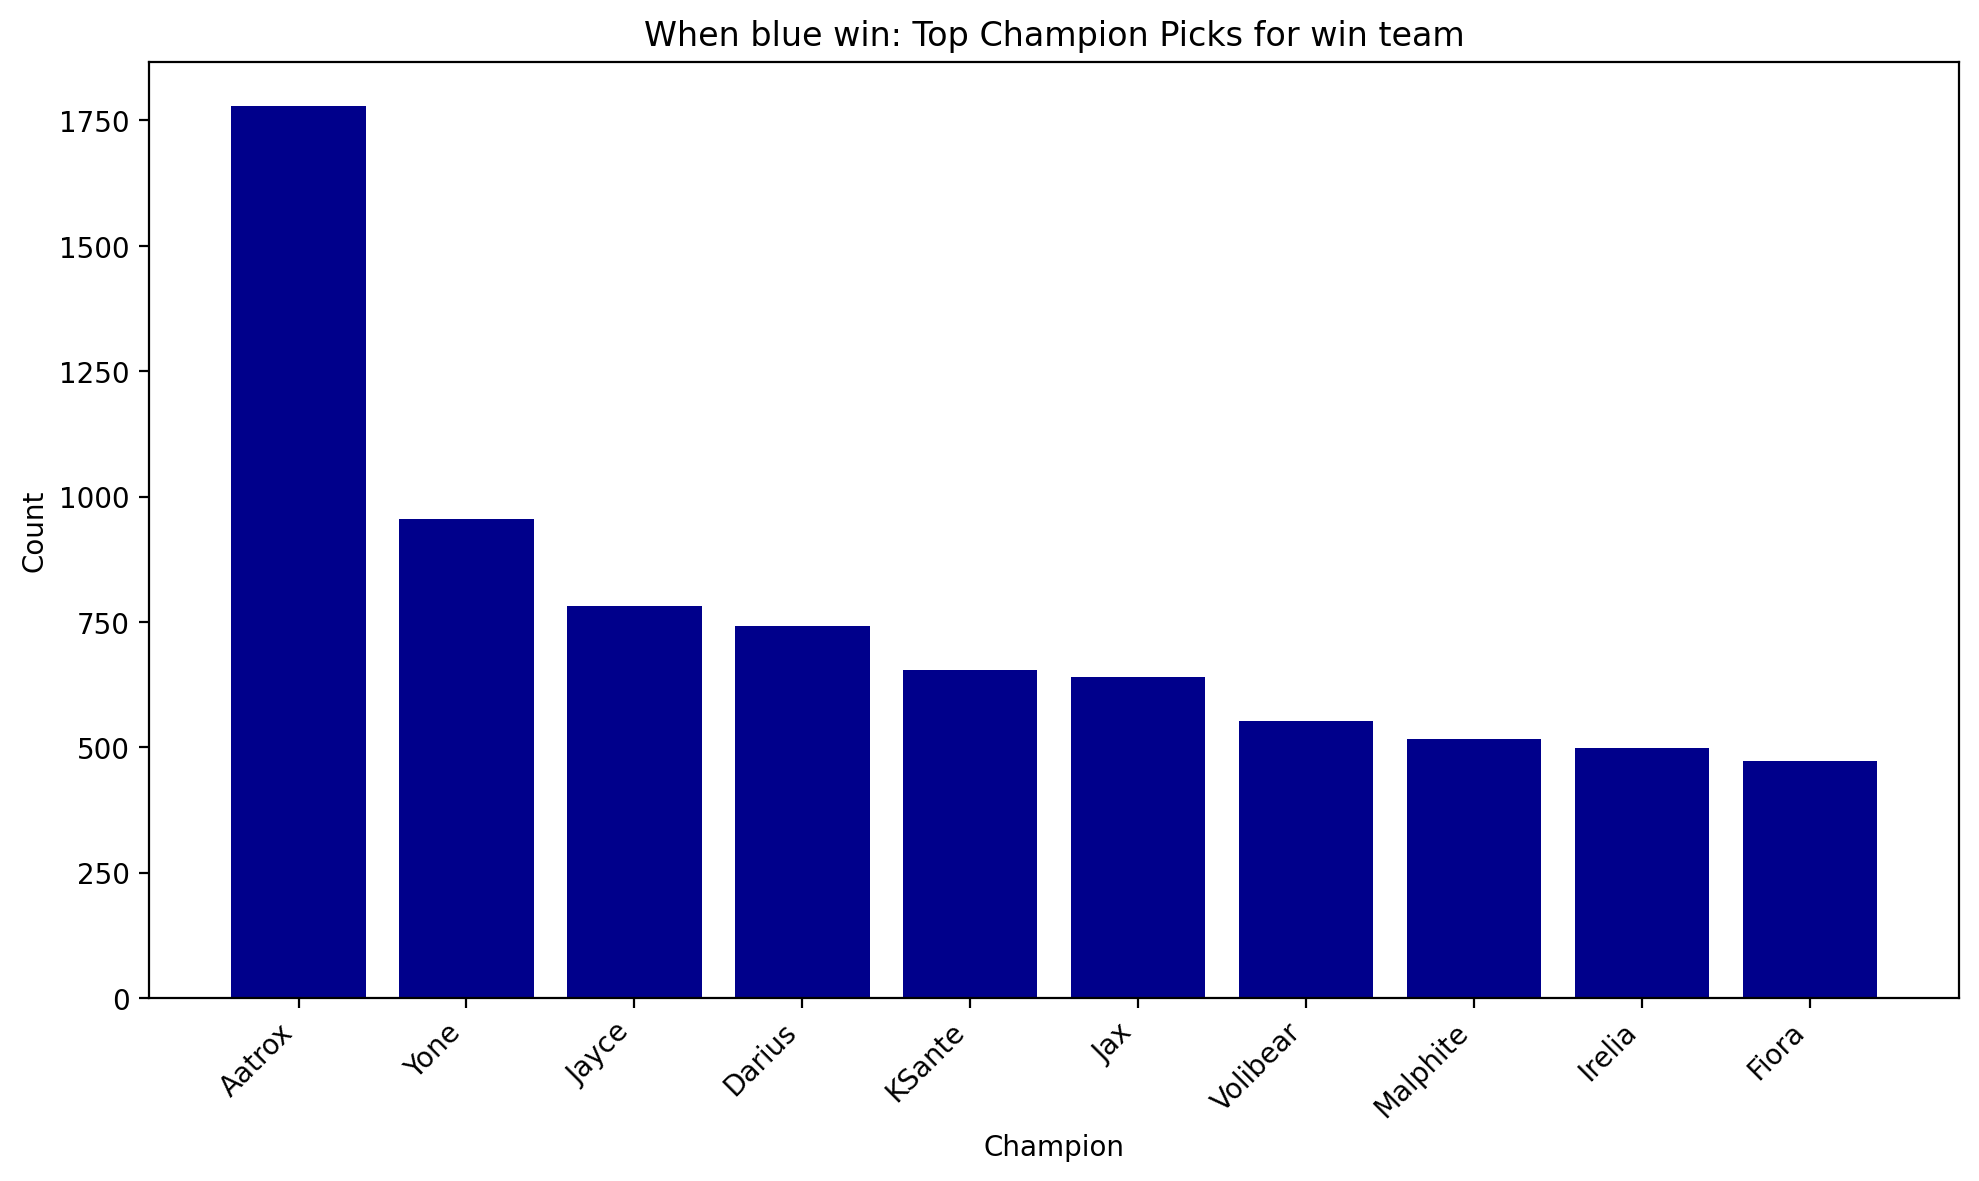

In [211]:
import pandas as pd
import matplotlib.pyplot as plt

# 이전에 설정한 max_rows를 되돌립니다.
pd.reset_option("display.max_rows")

# matchdata에서 'winteam'이 '[100]'인 경우의 'ChampionName_100_1' 값의 빈도수를 계산합니다.
data = matchdata[matchdata['winteam'] == '[100]']['ChampionName_100_1'].value_counts().head(10)

# 시각화를 위해 데이터프레임으로 변환합니다.
df = data.to_frame().reset_index()
df.columns = ['Champion', 'Count']

# 막대 그래프를 그립니다.
plt.figure(figsize=(10, 6))
plt.bar(df['Champion'], df['Count'], color='darkblue')
plt.title('When blue win: Top Champion Picks for win team')
plt.xlabel('Champion')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


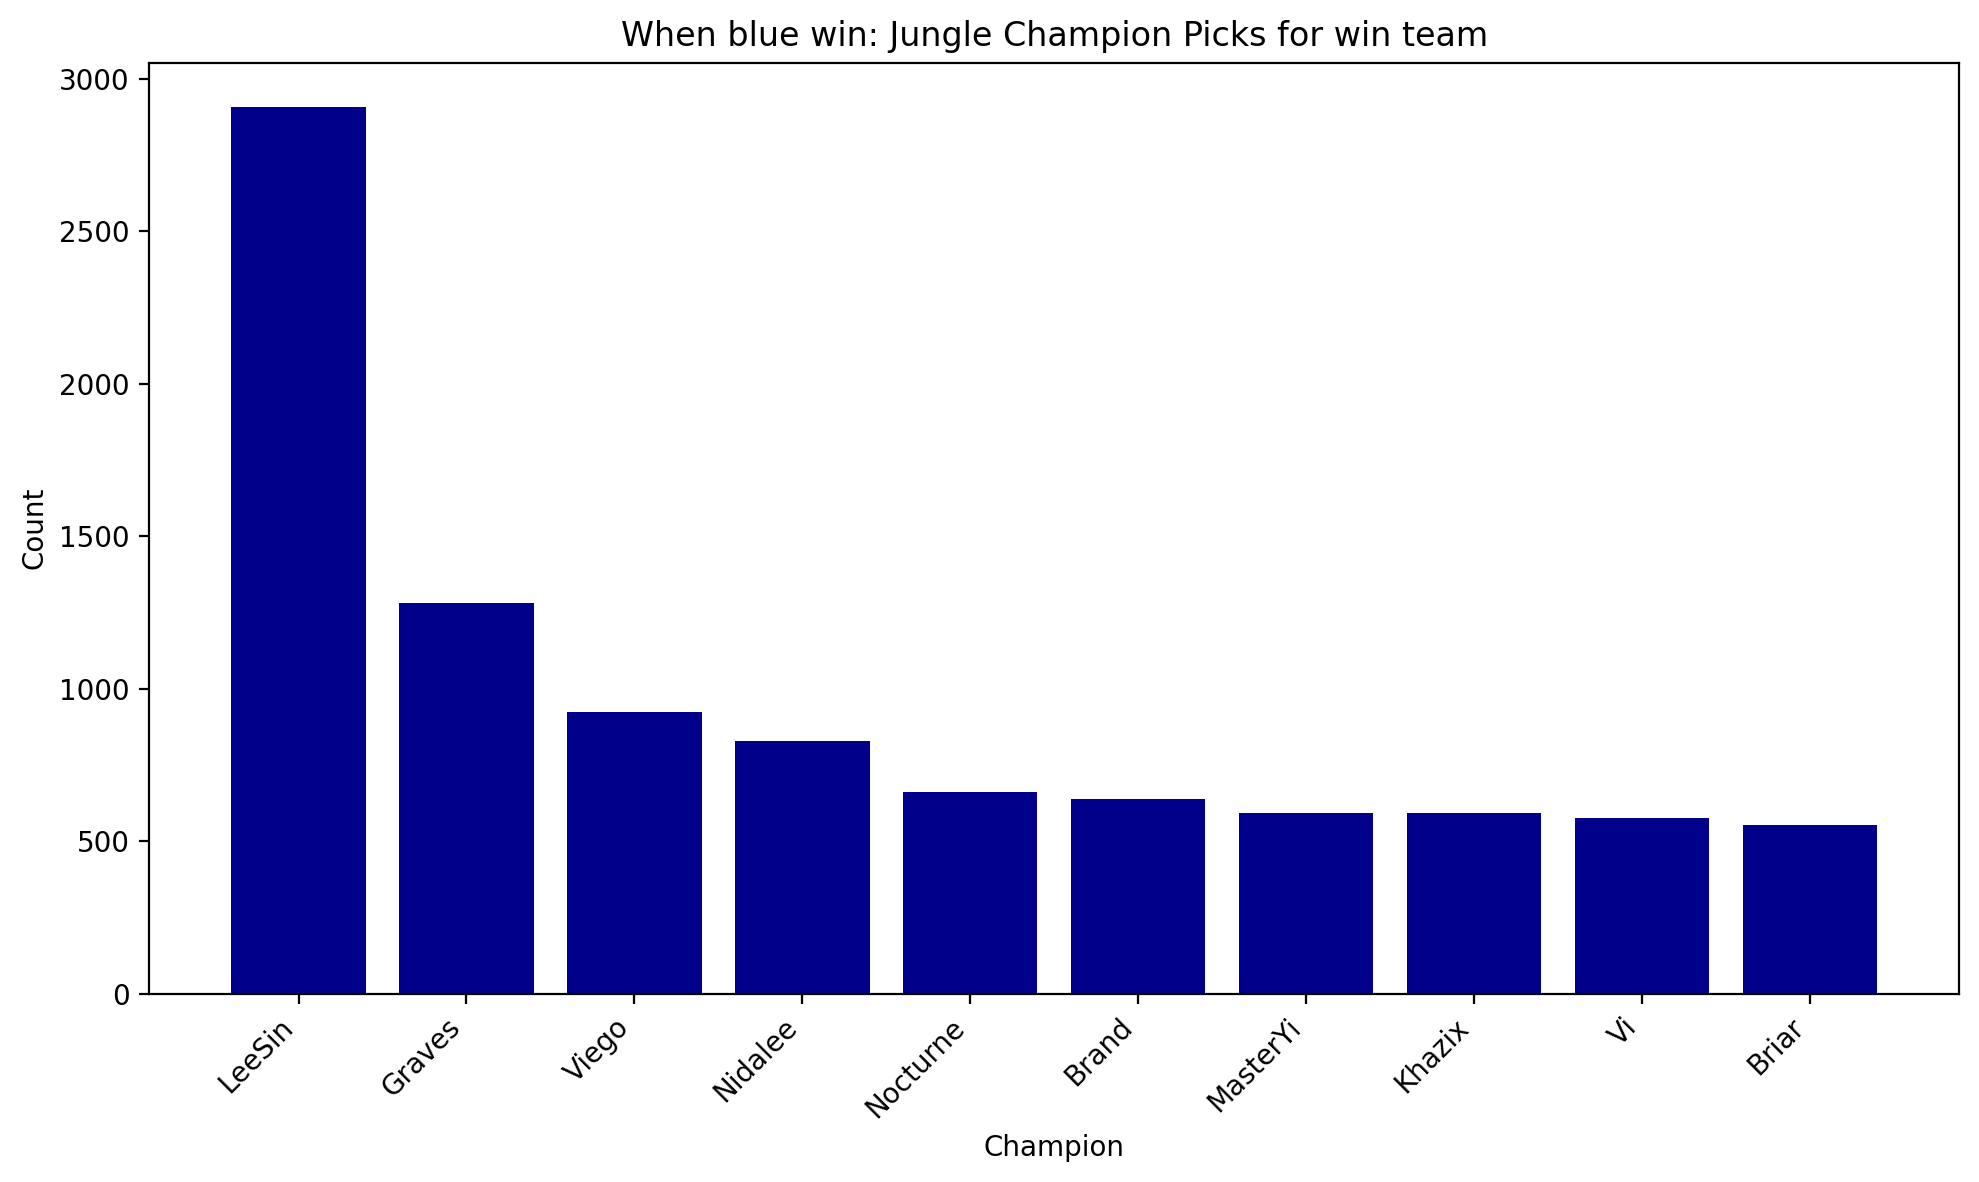

In [222]:
import pandas as pd
import matplotlib.pyplot as plt

# 이전에 설정한 max_rows를 되돌립니다.
pd.reset_option("display.max_rows")

# matchdata에서 'winteam'이 '[100]'인 경우의 'ChampionName_100_1' 값의 빈도수를 계산합니다.
data = matchdata[matchdata['winteam'] == '[100]']['ChampionName_100_2'].value_counts().head(10)

# 시각화를 위해 데이터프레임으로 변환합니다.
df = data.to_frame().reset_index()
df.columns = ['Champion', 'Count']

# 막대 그래프를 그립니다.
plt.figure(figsize=(10, 6))
plt.bar(df['Champion'], df['Count'], color='darkblue')
plt.title('When blue win: Jungle Champion Picks for win team')
plt.xlabel('Champion')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


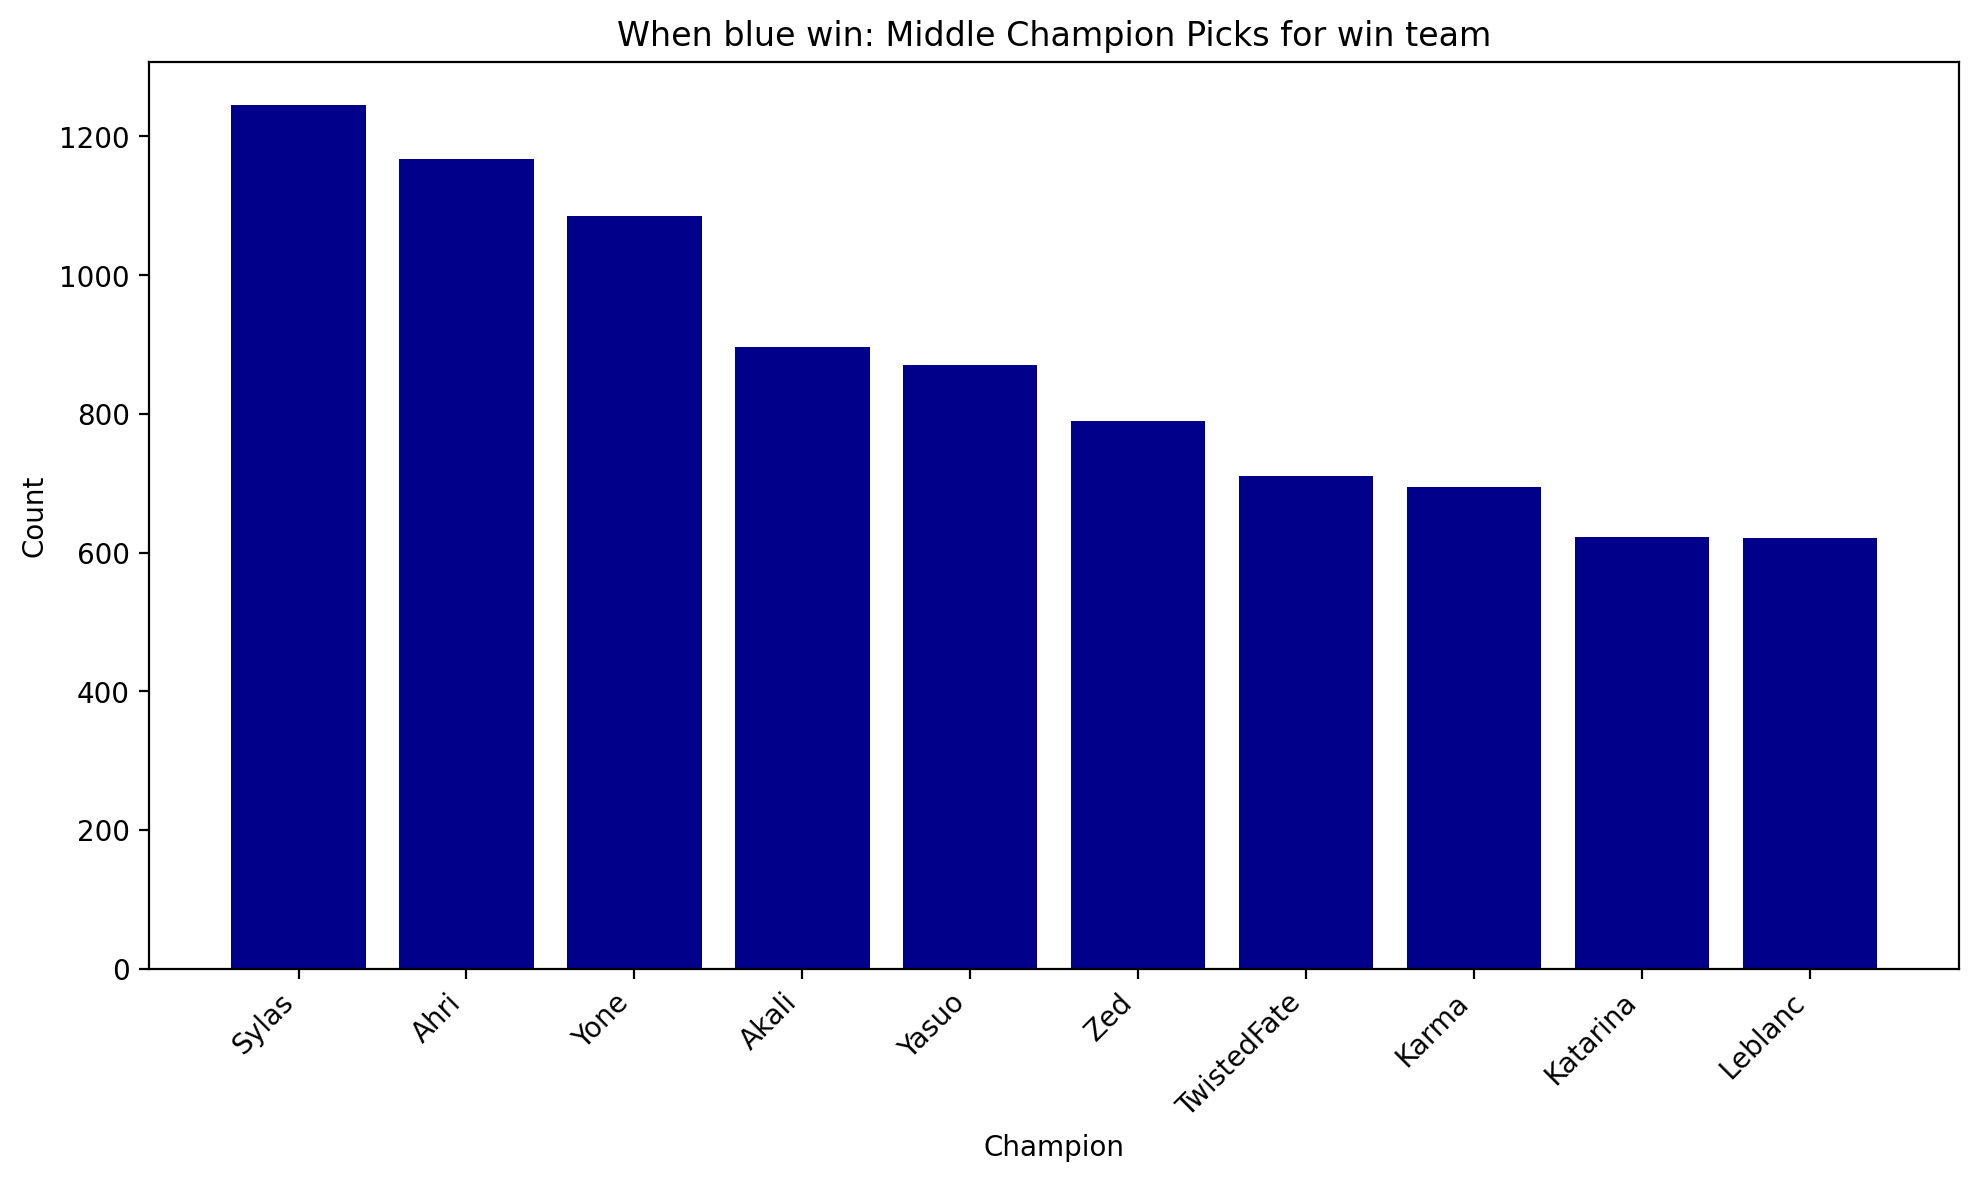

In [223]:
import pandas as pd
import matplotlib.pyplot as plt

# 이전에 설정한 max_rows를 되돌립니다.
pd.reset_option("display.max_rows")

# matchdata에서 'winteam'이 '[100]'인 경우의 'ChampionName_100_1' 값의 빈도수를 계산합니다.
data = matchdata[matchdata['winteam'] == '[100]']['ChampionName_100_3'].value_counts().head(10)

# 시각화를 위해 데이터프레임으로 변환합니다.
df = data.to_frame().reset_index()
df.columns = ['Champion', 'Count']

# 막대 그래프를 그립니다.
plt.figure(figsize=(10, 6))
plt.bar(df['Champion'], df['Count'], color='darkblue')
plt.title('When blue win: Middle Champion Picks for win team')
plt.xlabel('Champion')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


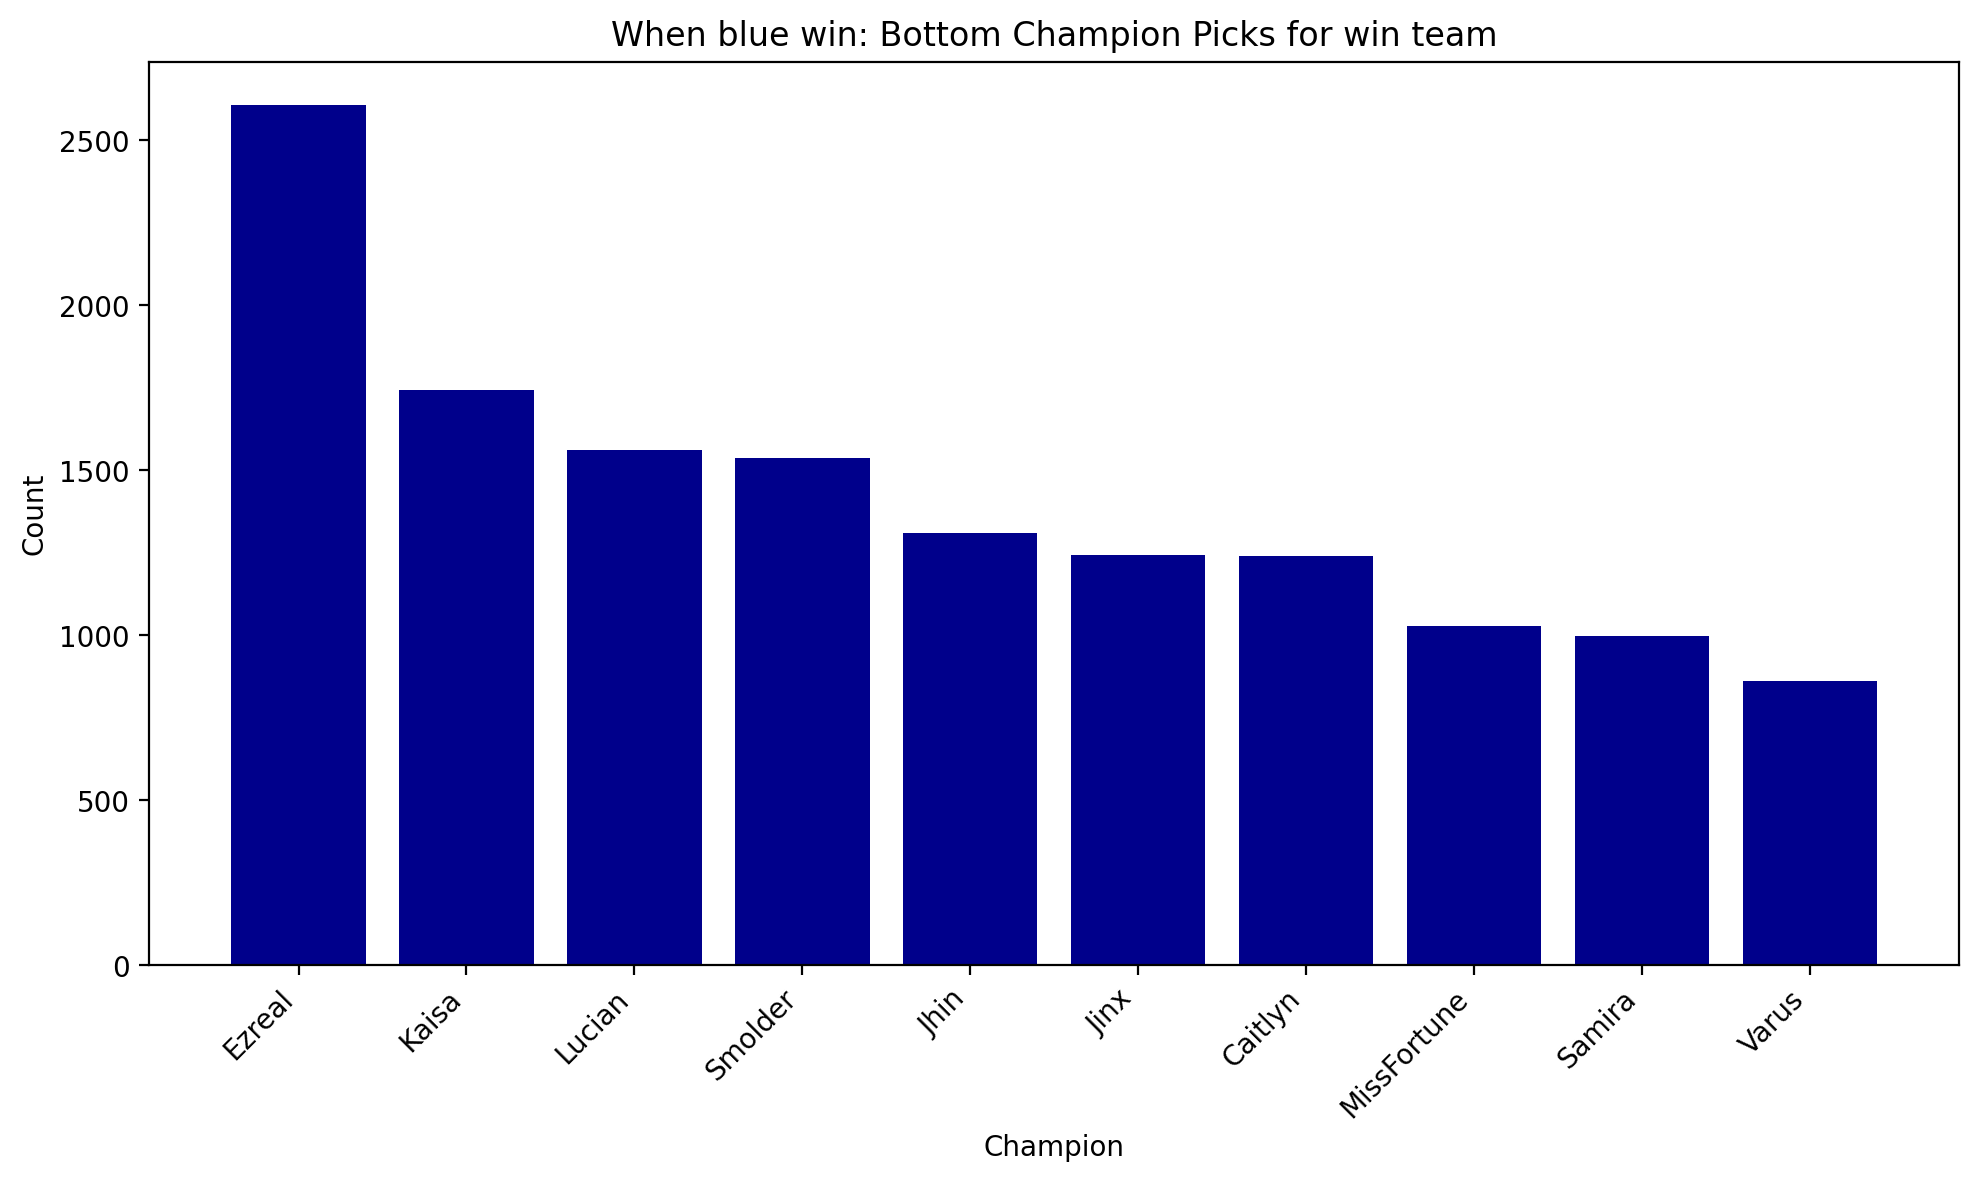

In [212]:
import pandas as pd
import matplotlib.pyplot as plt

# 이전에 설정한 max_rows를 되돌립니다.
pd.reset_option("display.max_rows")

# matchdata에서 'winteam'이 '[100]'인 경우의 'ChampionName_100_1' 값의 빈도수를 계산합니다.
data = matchdata[matchdata['winteam'] == '[100]']['ChampionName_100_4'].value_counts().head(10)

# 시각화를 위해 데이터프레임으로 변환합니다.
df = data.to_frame().reset_index()
df.columns = ['Champion', 'Count']

# 막대 그래프를 그립니다.
plt.figure(figsize=(10, 6))
plt.bar(df['Champion'], df['Count'], color='darkblue')
plt.title('When blue win: Bottom Champion Picks for win team')
plt.xlabel('Champion')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


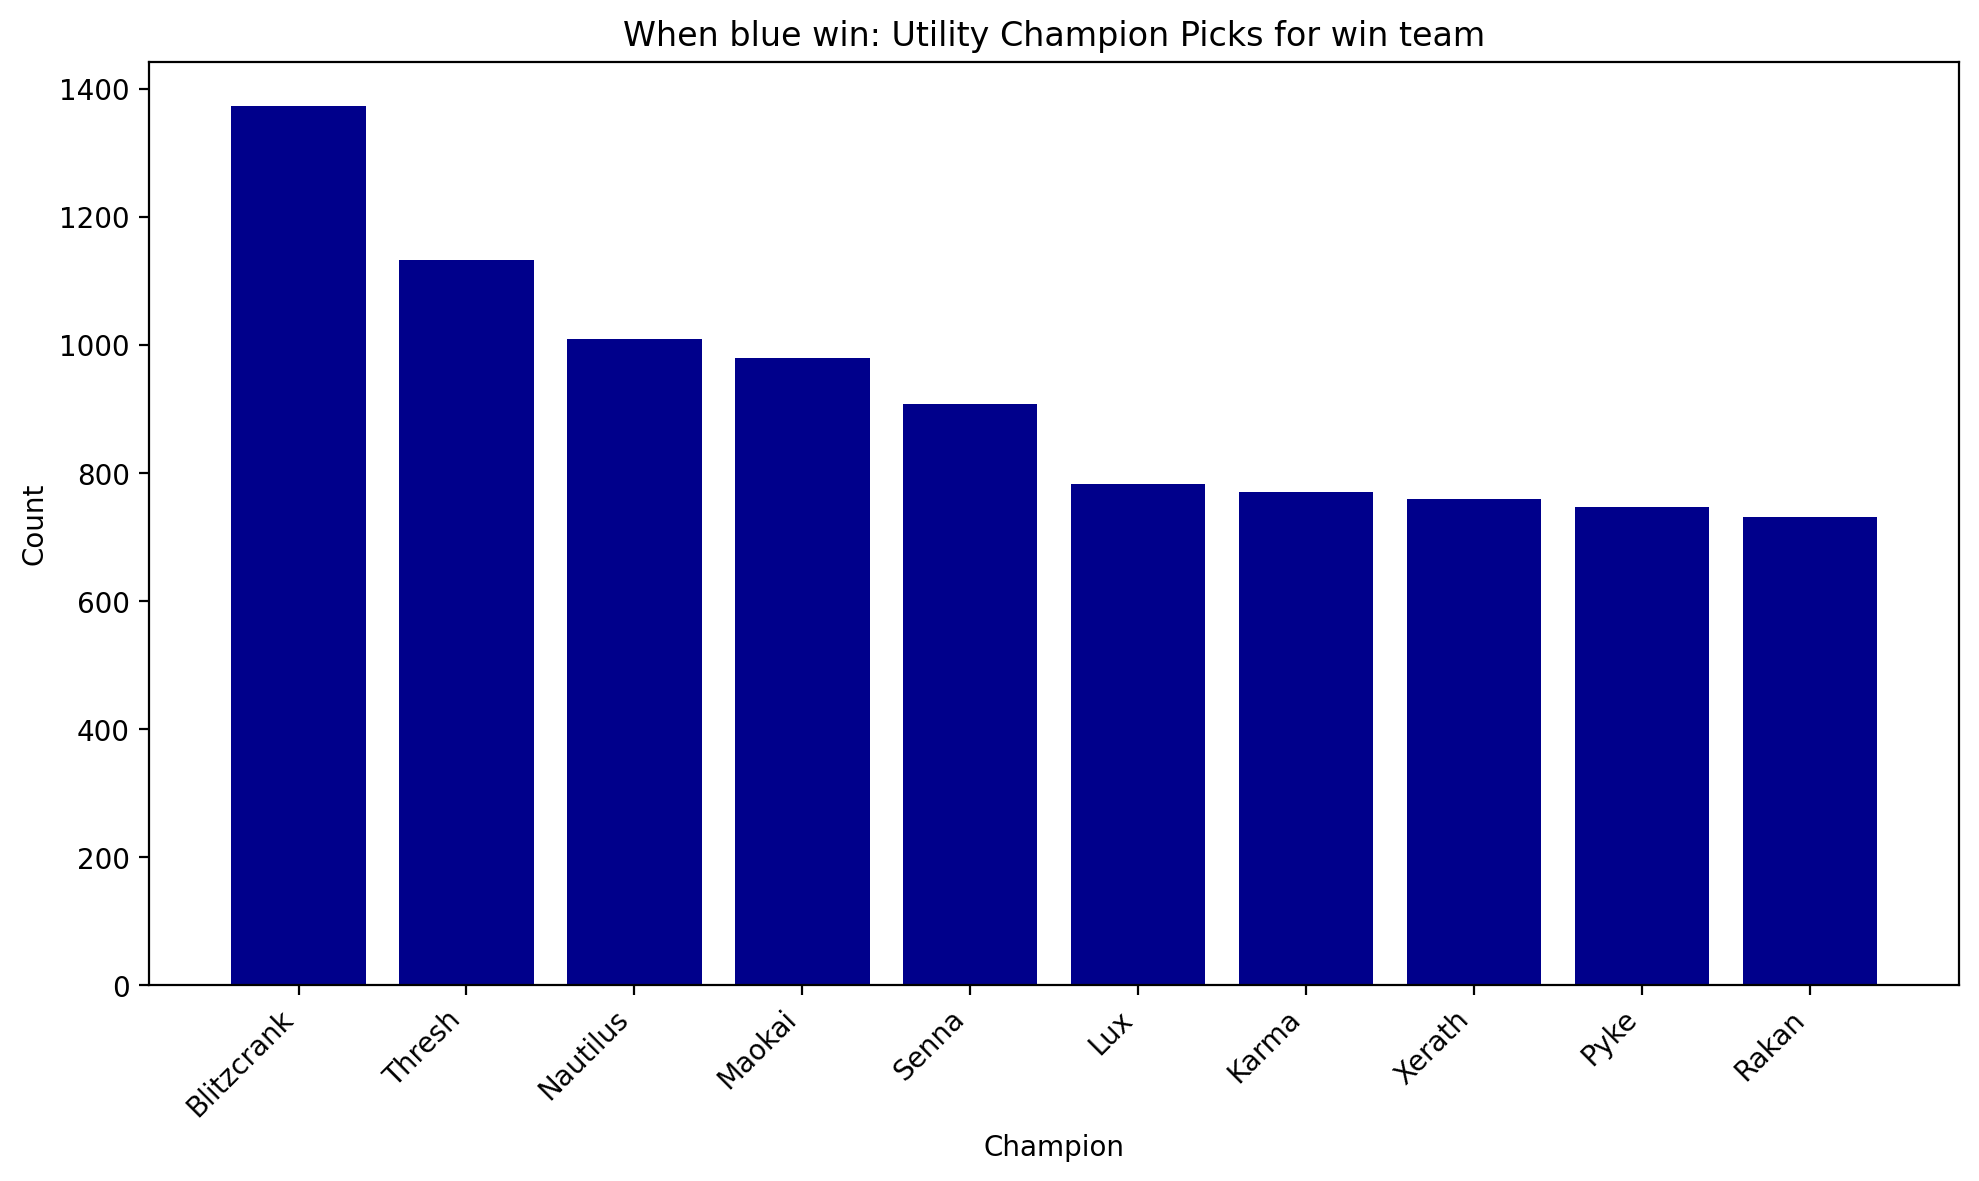

In [224]:
import pandas as pd
import matplotlib.pyplot as plt

# 이전에 설정한 max_rows를 되돌립니다.
pd.reset_option("display.max_rows")

# matchdata에서 'winteam'이 '[100]'인 경우의 'ChampionName_100_1' 값의 빈도수를 계산합니다.
data = matchdata[matchdata['winteam'] == '[100]']['ChampionName_100_5'].value_counts().head(10)

# 시각화를 위해 데이터프레임으로 변환합니다.
df = data.to_frame().reset_index()
df.columns = ['Champion', 'Count']

# 막대 그래프를 그립니다.
plt.figure(figsize=(10, 6))
plt.bar(df['Champion'], df['Count'], color='darkblue')
plt.title('When blue win: Utility Champion Picks for win team')
plt.xlabel('Champion')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


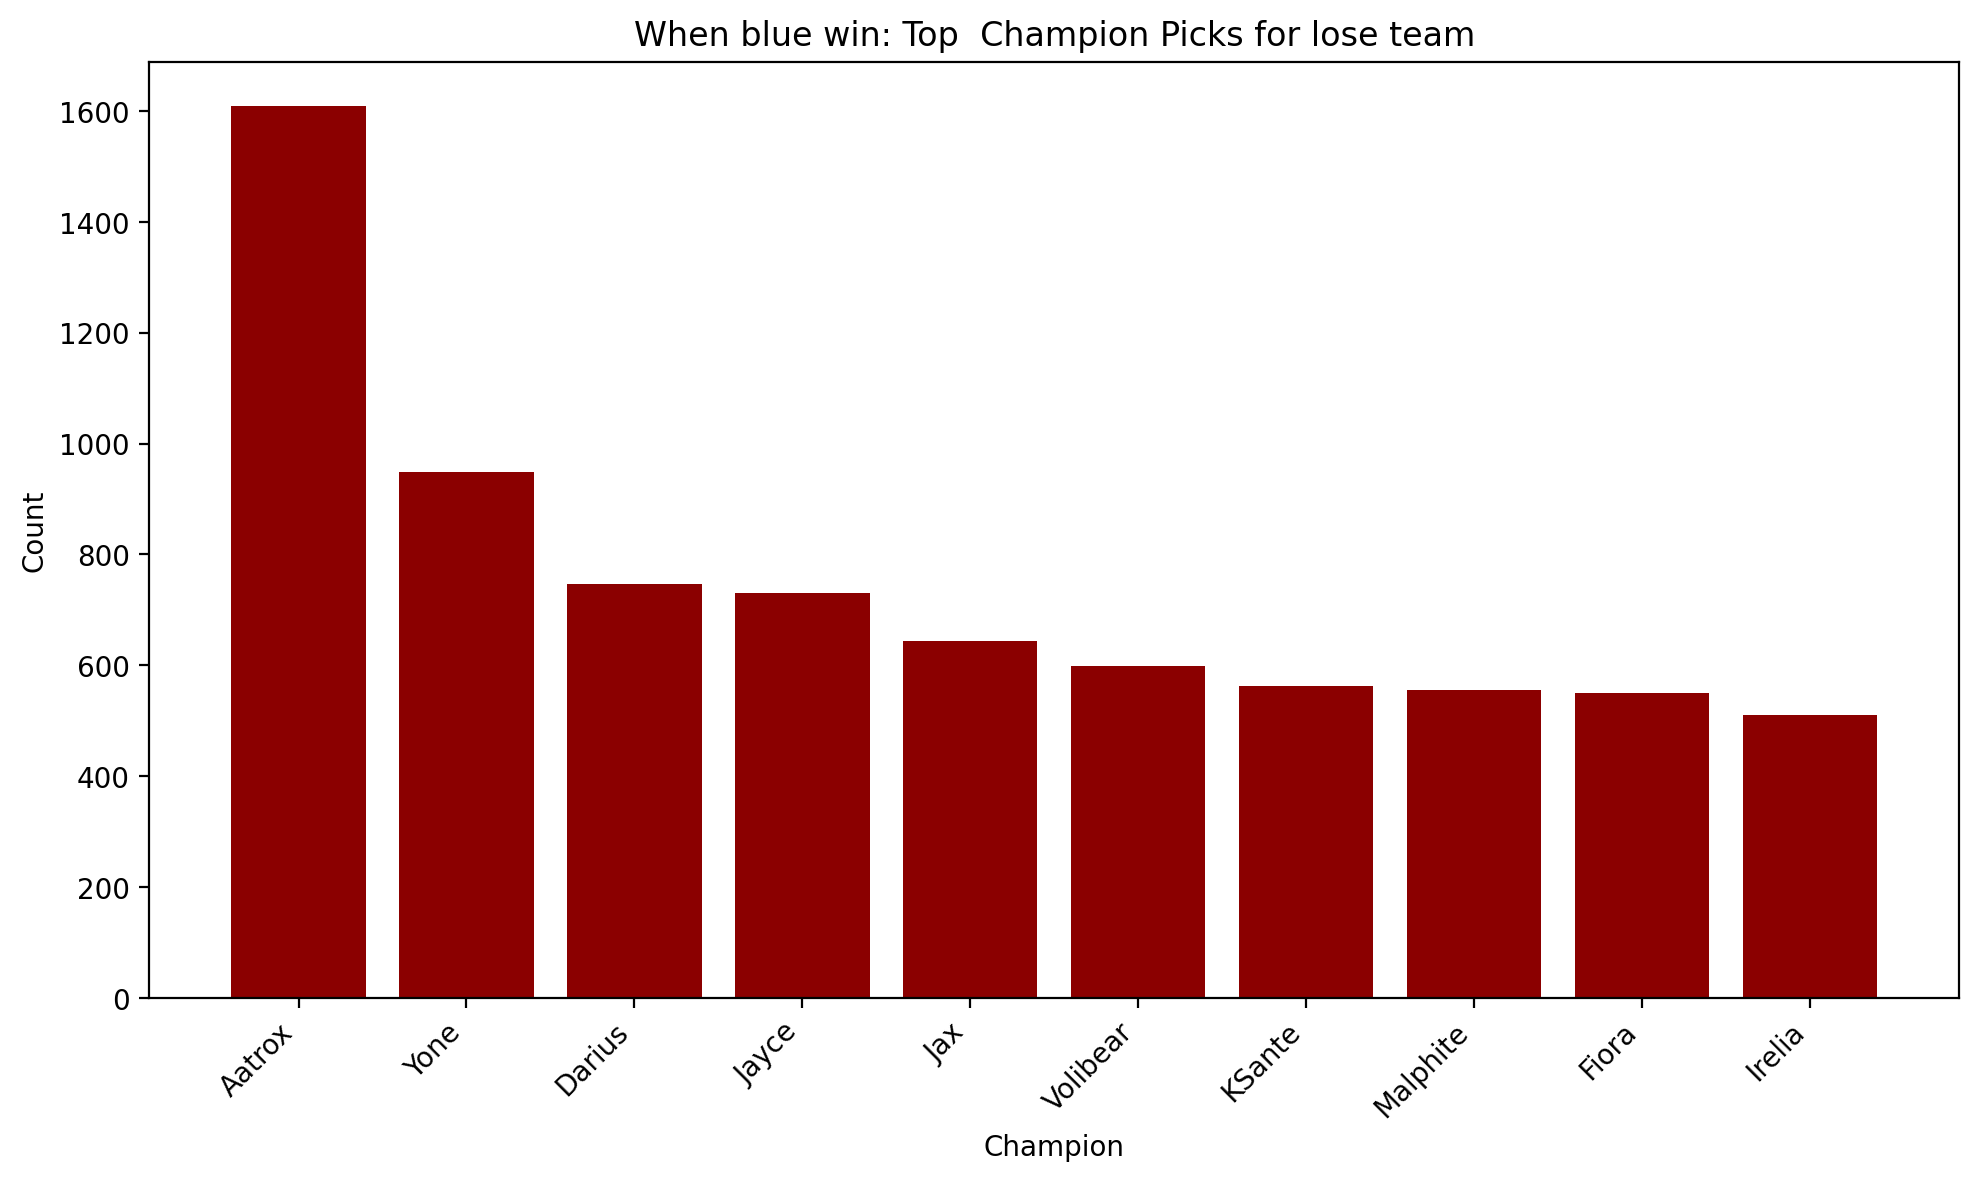

In [213]:
# 이전에 설정한 max_rows를 되돌립니다.
pd.reset_option("display.max_rows")

# matchdata에서 'winteam'이 '[100]'인 경우의 'ChampionName_100_1' 값의 빈도수를 계산합니다.
data = matchdata[matchdata['winteam'] == '[100]']['ChampionName_200_6'].value_counts().head(10)

# 시각화를 위해 데이터프레임으로 변환합니다.
df = data.to_frame().reset_index()
df.columns = ['Champion', 'Count']

# 막대 그래프를 그립니다.
plt.figure(figsize=(10, 6))
plt.bar(df['Champion'], df['Count'], color='darkred')
plt.title('When blue win: Top  Champion Picks for lose team')
plt.xlabel('Champion')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


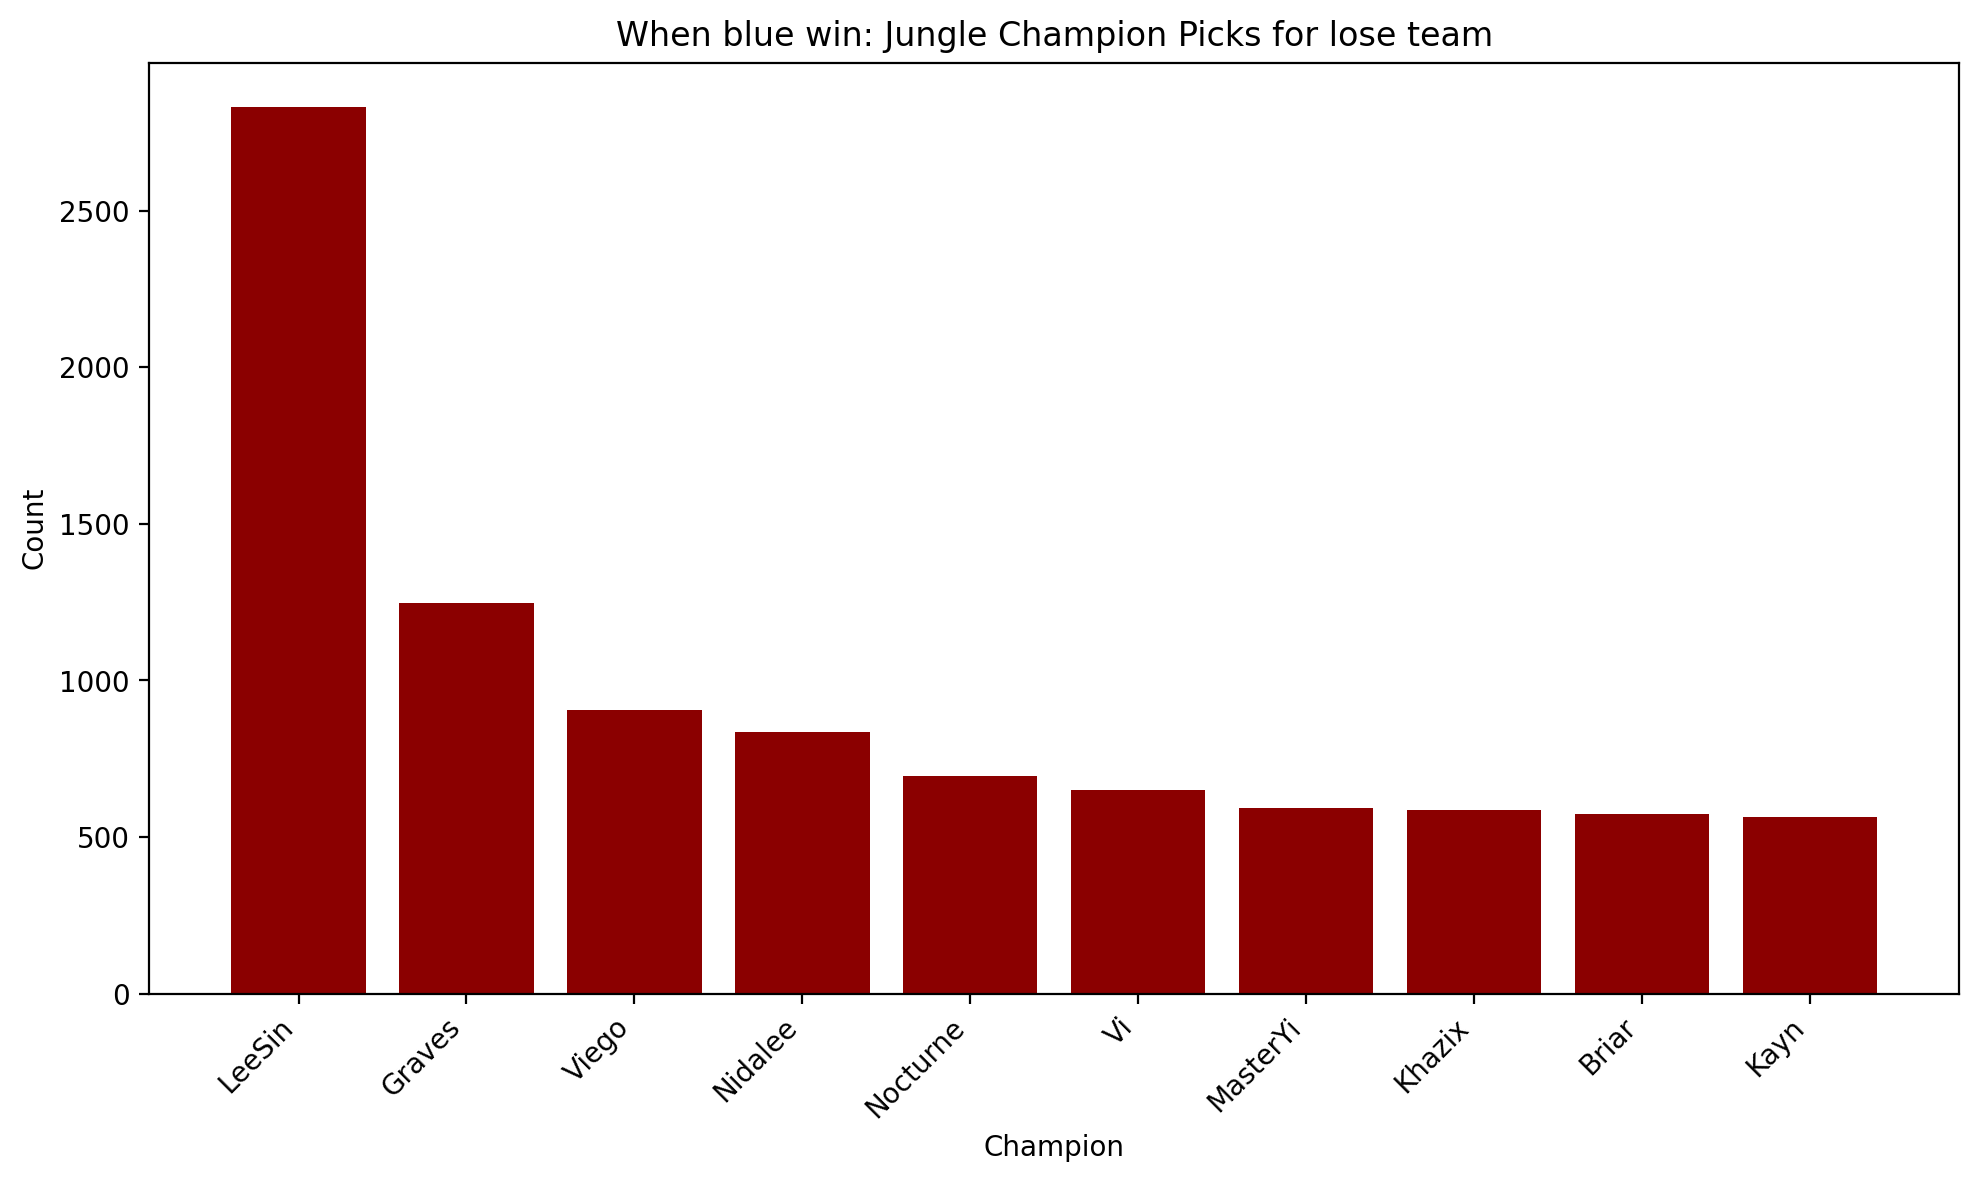

In [225]:
# 이전에 설정한 max_rows를 되돌립니다.
pd.reset_option("display.max_rows")

# matchdata에서 'winteam'이 '[100]'인 경우의 'ChampionName_100_1' 값의 빈도수를 계산합니다.
data = matchdata[matchdata['winteam'] == '[100]']['ChampionName_200_7'].value_counts().head(10)

# 시각화를 위해 데이터프레임으로 변환합니다.
df = data.to_frame().reset_index()
df.columns = ['Champion', 'Count']

# 막대 그래프를 그립니다.
plt.figure(figsize=(10, 6))
plt.bar(df['Champion'], df['Count'], color='darkred')
plt.title('When blue win: Jungle Champion Picks for lose team')
plt.xlabel('Champion')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


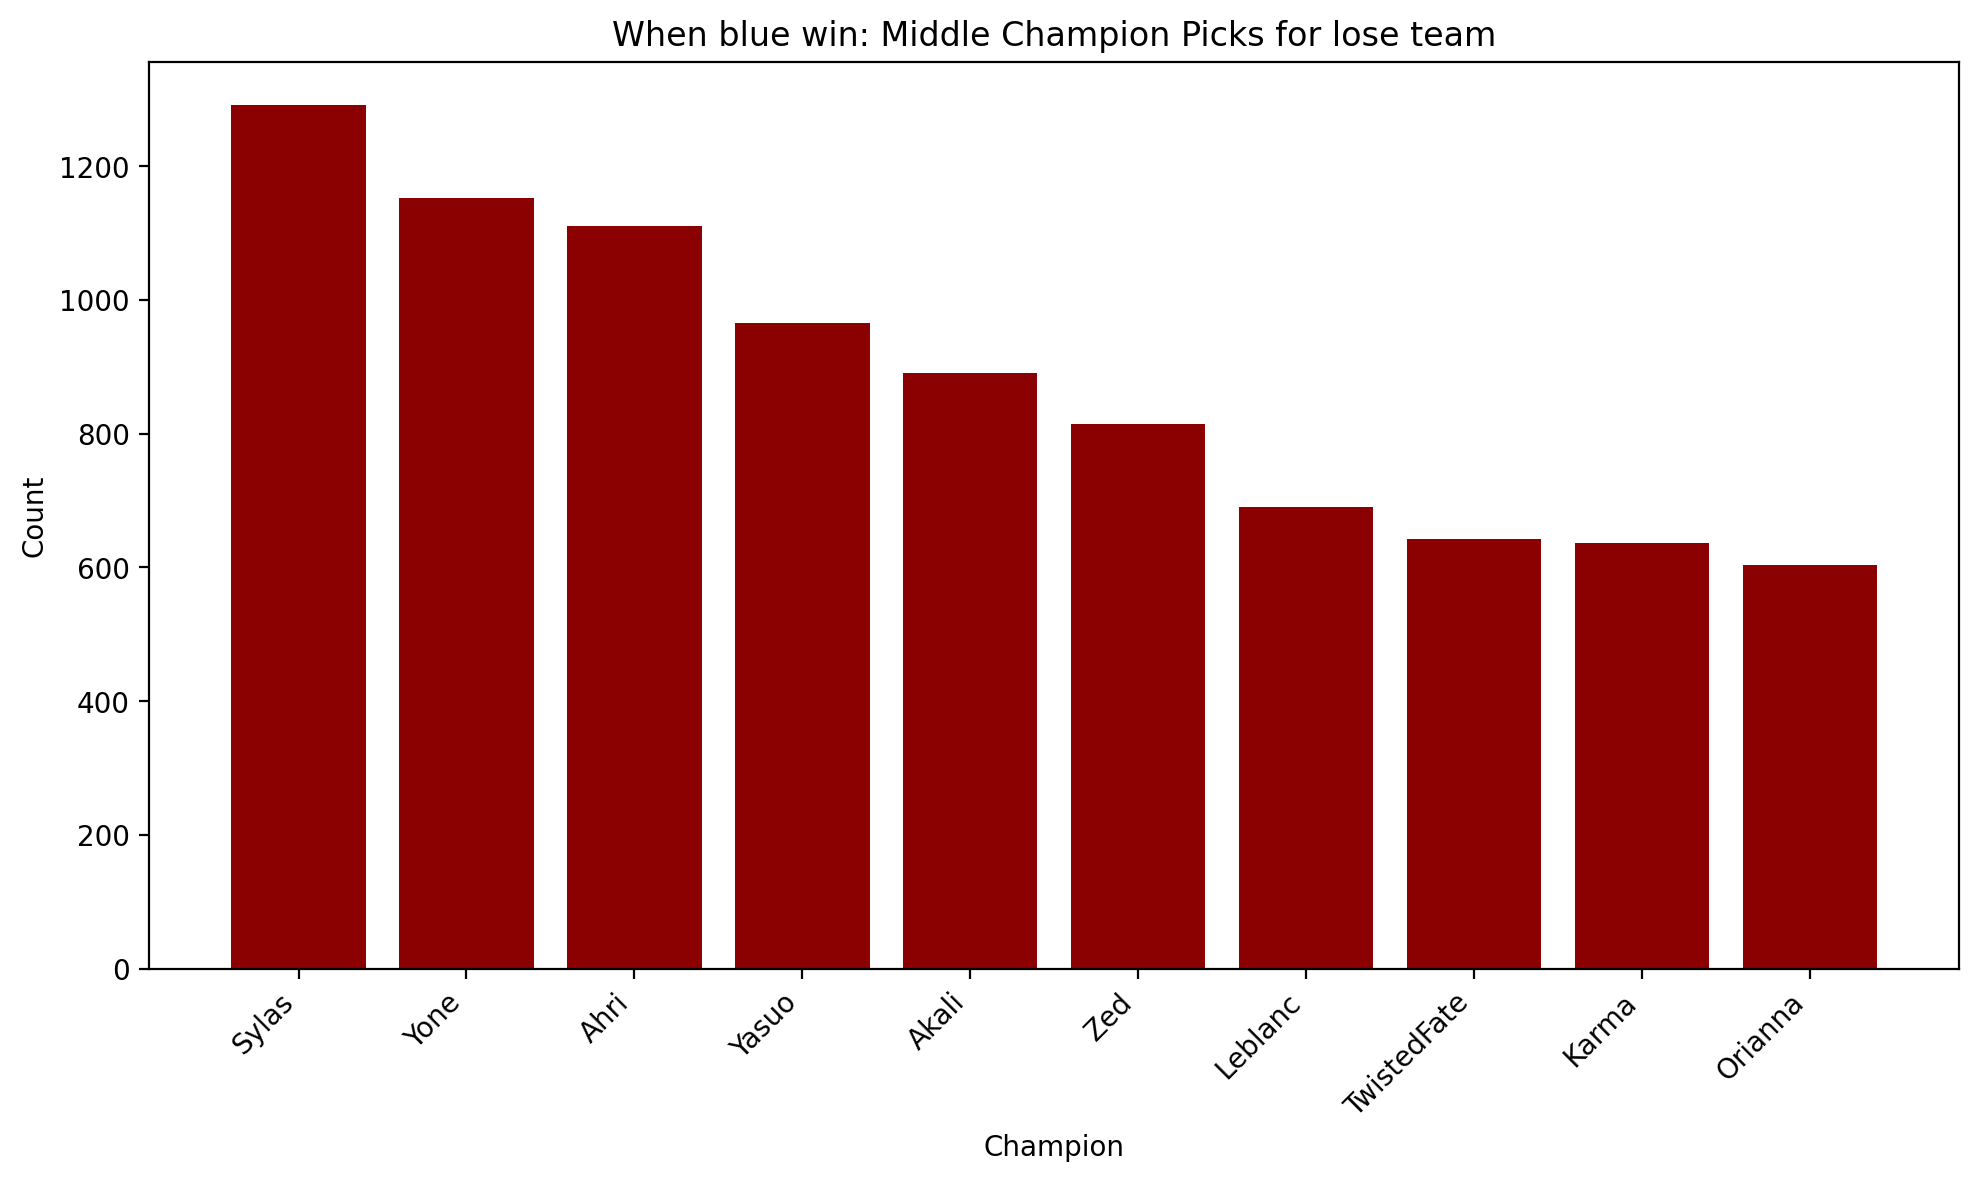

In [226]:
# 이전에 설정한 max_rows를 되돌립니다.
pd.reset_option("display.max_rows")

# matchdata에서 'winteam'이 '[100]'인 경우의 'ChampionName_100_1' 값의 빈도수를 계산합니다.
data = matchdata[matchdata['winteam'] == '[100]']['ChampionName_200_8'].value_counts().head(10)

# 시각화를 위해 데이터프레임으로 변환합니다.
df = data.to_frame().reset_index()
df.columns = ['Champion', 'Count']

# 막대 그래프를 그립니다.
plt.figure(figsize=(10, 6))
plt.bar(df['Champion'], df['Count'], color='darkred')
plt.title('When blue win: Middle Champion Picks for lose team')
plt.xlabel('Champion')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


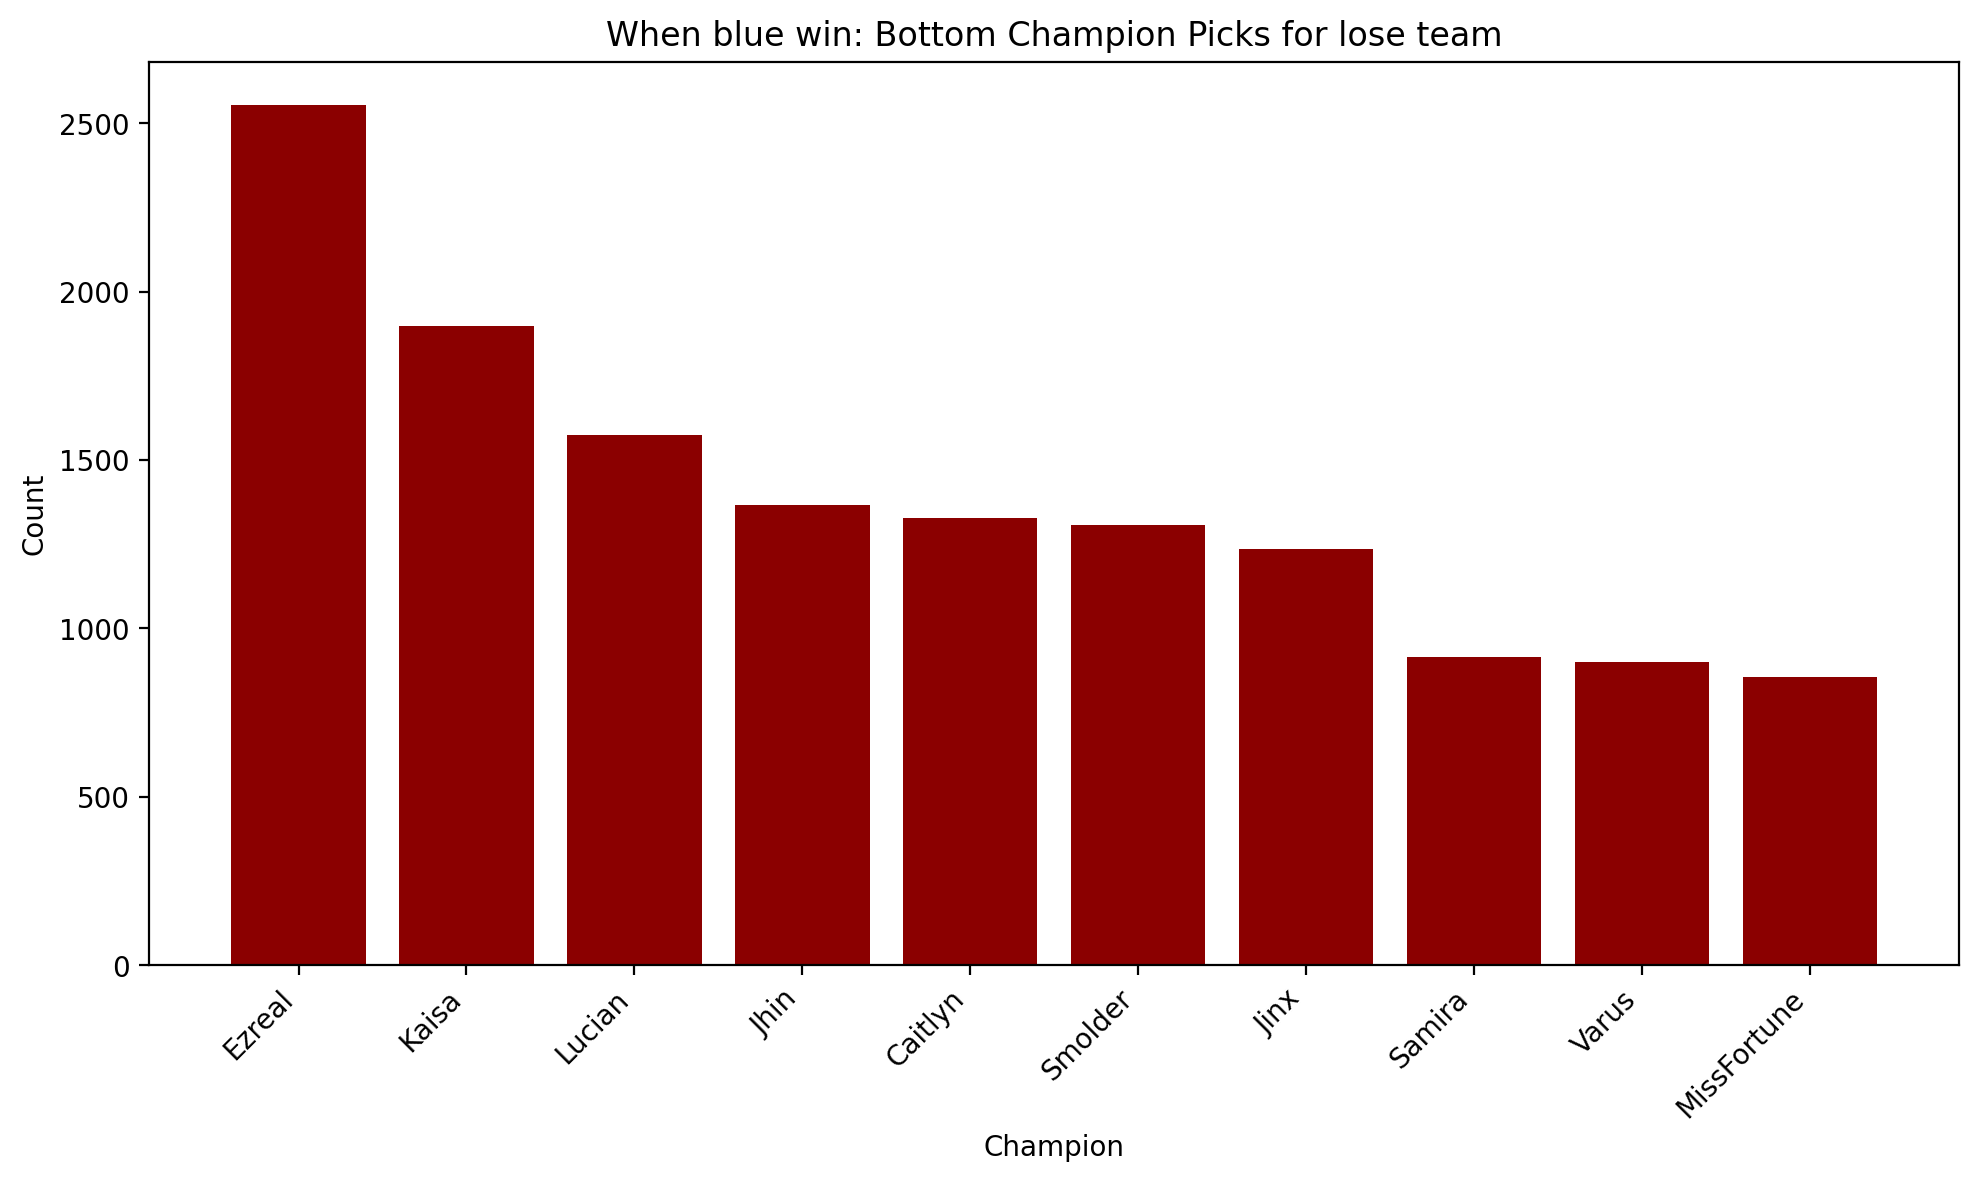

In [227]:
# 이전에 설정한 max_rows를 되돌립니다.
pd.reset_option("display.max_rows")

# matchdata에서 'winteam'이 '[100]'인 경우의 'ChampionName_100_1' 값의 빈도수를 계산합니다.
data = matchdata[matchdata['winteam'] == '[100]']['ChampionName_200_9'].value_counts().head(10)

# 시각화를 위해 데이터프레임으로 변환합니다.
df = data.to_frame().reset_index()
df.columns = ['Champion', 'Count']

# 막대 그래프를 그립니다.
plt.figure(figsize=(10, 6))
plt.bar(df['Champion'], df['Count'], color='darkred')
plt.title('When blue win: Bottom Champion Picks for lose team')
plt.xlabel('Champion')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

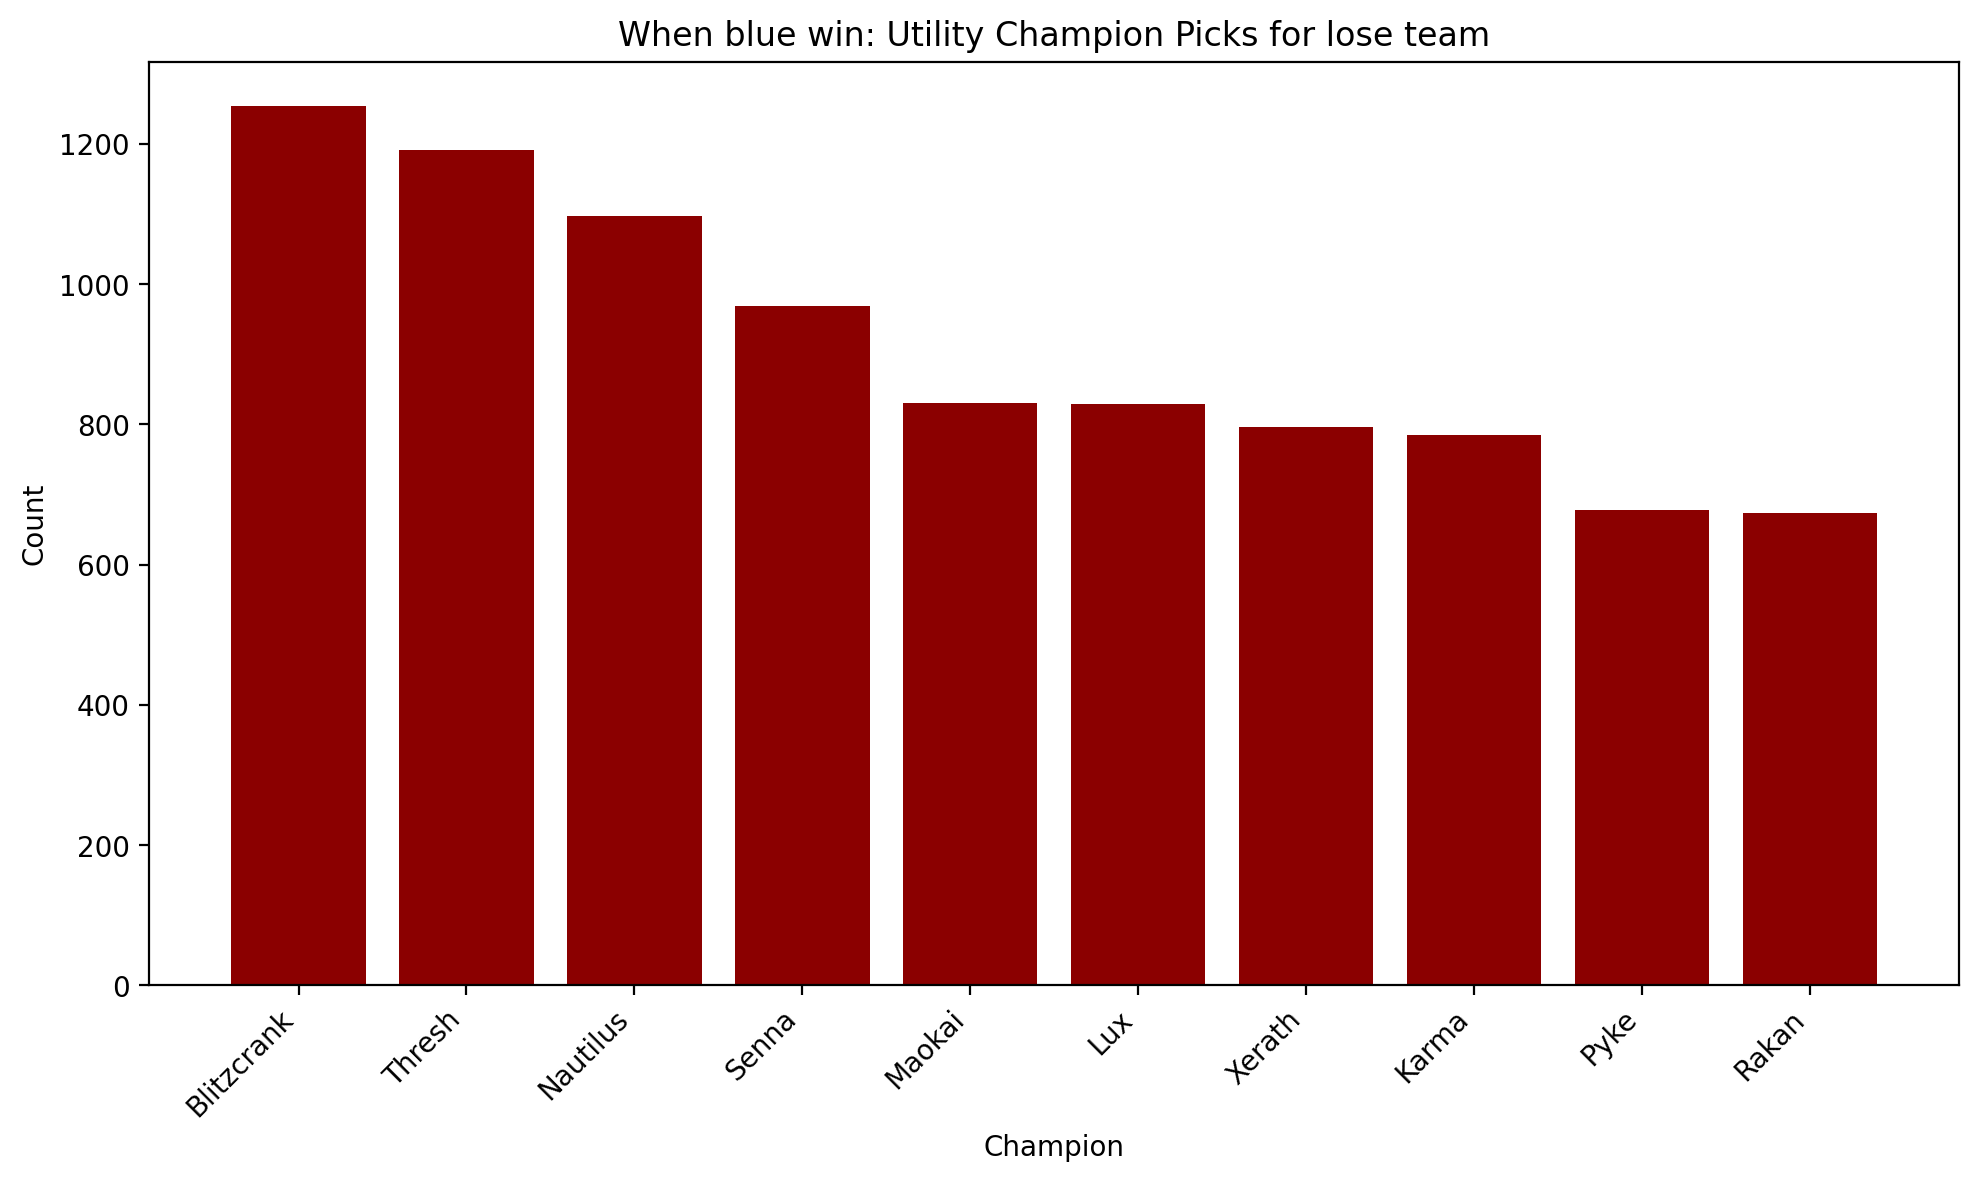

In [228]:
# 이전에 설정한 max_rows를 되돌립니다.
pd.reset_option("display.max_rows")

# matchdata에서 'winteam'이 '[100]'인 경우의 'ChampionName_100_1' 값의 빈도수를 계산합니다.
data = matchdata[matchdata['winteam'] == '[100]']['ChampionName_200_10'].value_counts().head(10)

# 시각화를 위해 데이터프레임으로 변환합니다.
df = data.to_frame().reset_index()
df.columns = ['Champion', 'Count']

# 막대 그래프를 그립니다.
plt.figure(figsize=(10, 6))
plt.bar(df['Champion'], df['Count'], color='darkred')
plt.title('When blue win: Utility Champion Picks for lose team')
plt.xlabel('Champion')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

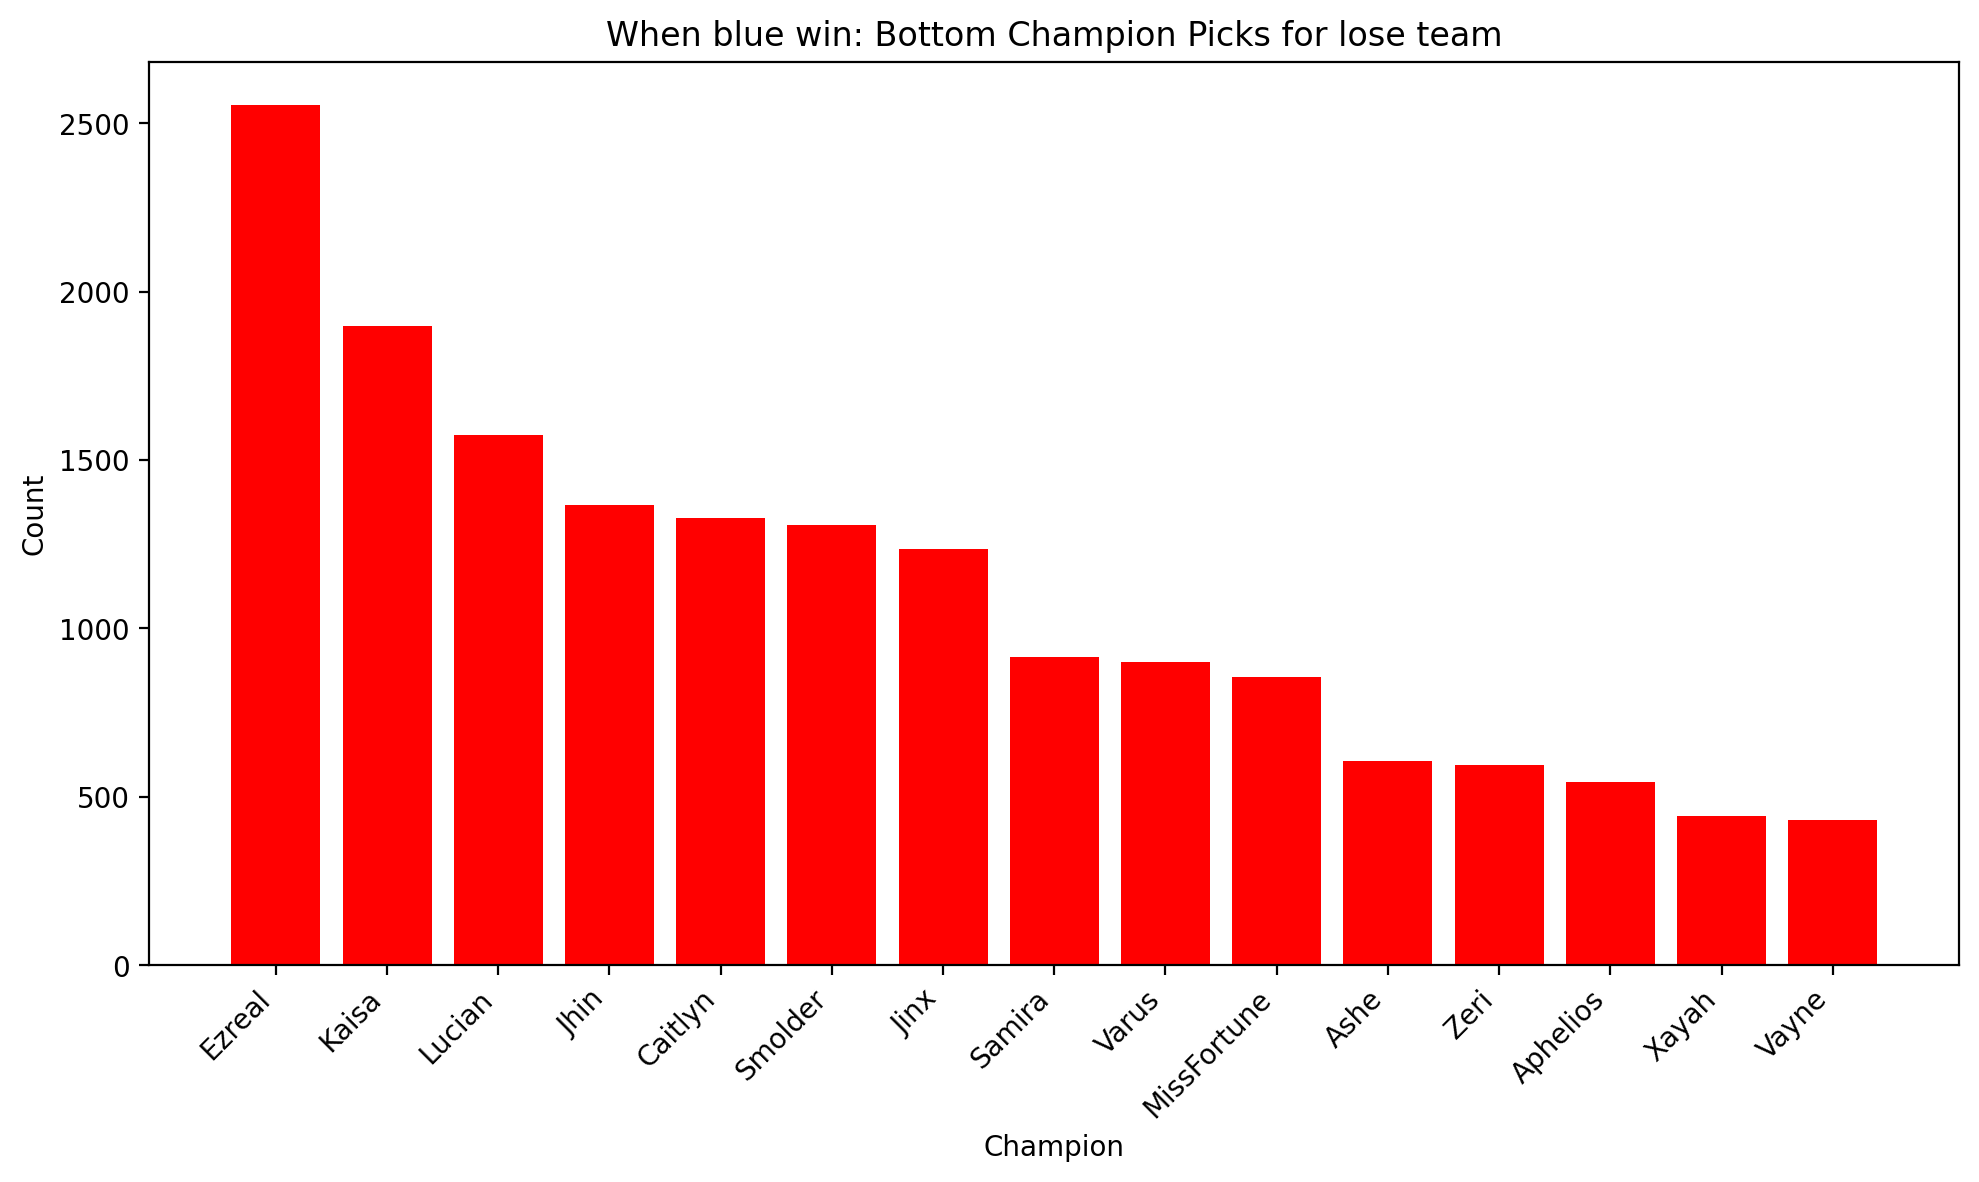

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

# 이전에 설정한 max_rows를 되돌립니다.
pd.reset_option("display.max_rows")

# matchdata에서 'winteam'이 '[100]'인 경우의 'ChampionName_100_1' 값의 빈도수를 계산합니다.
data = matchdata[matchdata['winteam'] == '[100]']['ChampionName_200_9'].value_counts().head(15)

# 시각화를 위해 데이터프레임으로 변환합니다.
df = data.to_frame().reset_index()
df.columns = ['Champion', 'Count']

# 막대 그래프를 그립니다.
plt.figure(figsize=(10, 6))
plt.bar(df['Champion'], df['Count'], color='red')
plt.title('When blue win: Bottom Champion Picks for lose team')
plt.xlabel('Champion')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [90]:
pd.options.display.max_rows = 0
matchdata[matchdata['winteam']=='[100]'].value_counts("ChampionName_200_6").head(15)

ChampionName_200_6
Aatrox         1608
Yone            948
Darius          747
Jayce           730
Jax             643
Volibear        598
KSante          562
Malphite        555
Fiora           550
Irelia          510
Renekton        448
Trundle         437
Garen           423
Mordekaiser     406
Teemo           391
dtype: int64

In [ ]:
(
    so.Plot(matchdata[matchdata['winteam']=='[100]'], x="displ", y="hwy", color="class")
    .add(so.Dot())
)

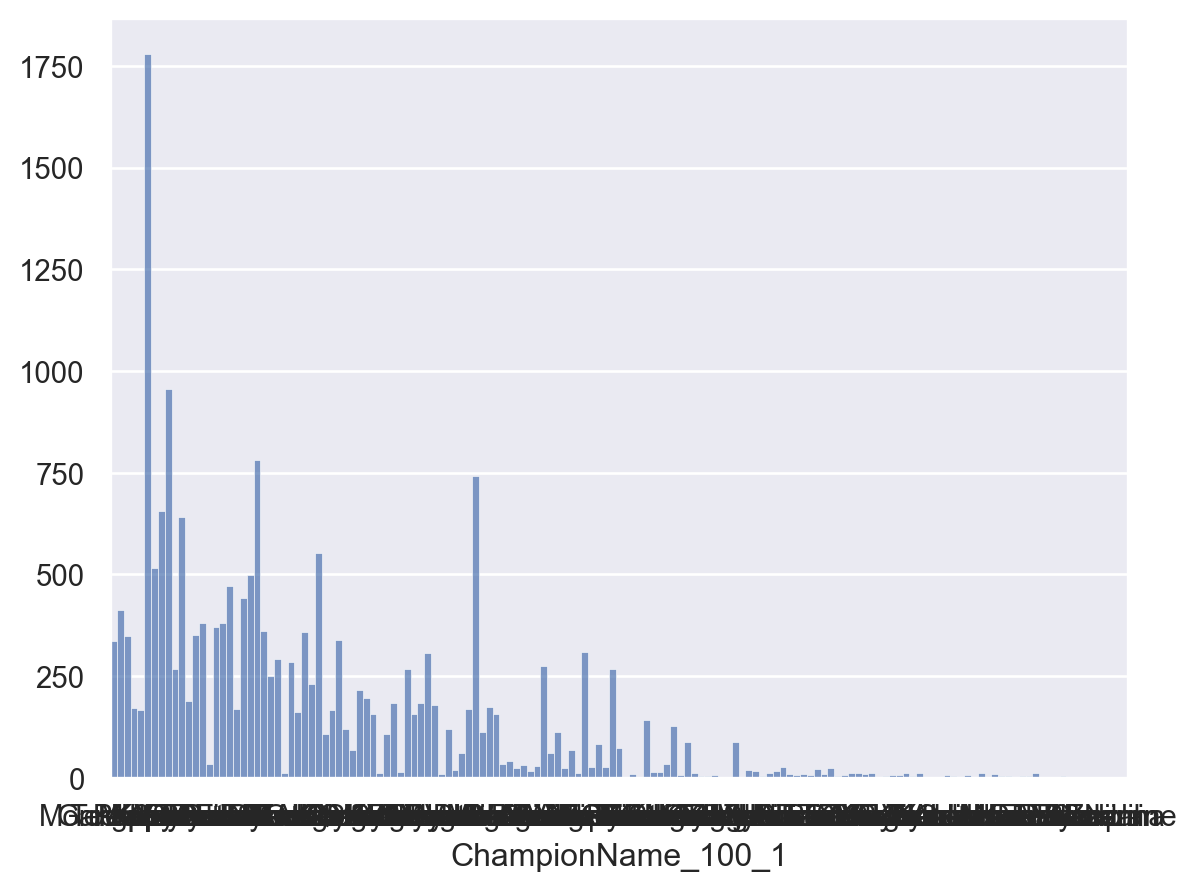

In [73]:

(
    so.Plot(matchdata[matchdata['winteam']=='[100]'], x="ChampionName_100_1")
    .add(so.Bars(), so.Hist(binwidth=50))
)

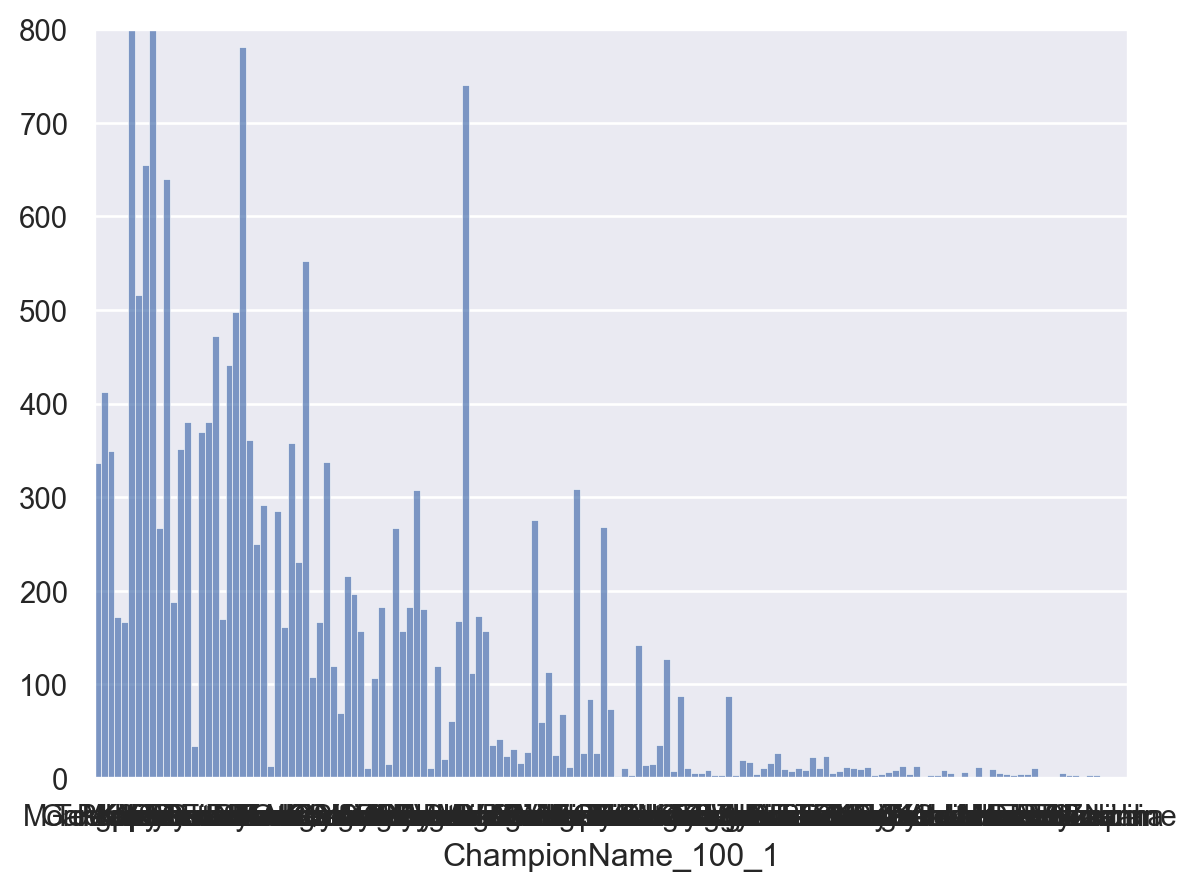

In [81]:
# Zoom-in
(
    so.Plot(matchdata[matchdata['winteam']=='[100]'], x="ChampionName_100_1")
    .add(so.Bars(), so.Hist(binwidth=0.0000001))
    .limit(y=(0, 800))
    
)

## 챔피언 별 총 골드 

In [9]:
matchdata.iloc[:,21:31]

totalGold_100_1  totalGold_100_2  totalGold_100_3  totalGold_100_4  \
0              4303.00          4372.00          5386.00          7340.00   
1              6348.00          4363.00          7401.00          5494.00   
2              4667.00          5903.00          5073.00          5506.00   
...                ...              ...              ...              ...   
37877          5525.00          5775.00          6069.00          6626.00   
37878          5971.00          7730.00          5909.00          5033.00   
37879          5677.00          5995.00          5784.00          7468.00   

       totalGold_100_5  totalGold_200_6  totalGold_200_7  totalGold_200_8  \
0              4647.00          6945.00          7446.00          6859.00   
1              4191.00          4358.00          6521.00          4947.00   
2              4790.00          5334.00          5651.00          7160.00   
...                ...              ...              ...              ...   
37877          5414.00          8327.00          6183.00          6419.00   
37878          4566.00          5614.00          6051.00          3807.00   
37879          4427.00          5073.00          5038.00          6625.00   

       totalGold_200_9  totalGold_200_10  
0              6065.00           5036.00  
1              6469.00           7056.00  
2              5787.00           5640.00  
...                ...               ...  
37877          6372.00           4259.00  
37878          6284.00           4620.00  
37879          4946.00           4521.00  

[37880 rows x 10 columns]

In [14]:
##  승리와 골드 비교하기 
## 카테고리: 승리한 팀이 블루일 때 total _Gold1-5 // total_Gold6-10 비교하기 
winblue=matchdata[matchdata['winteam']=='[100]']
winred=matchdata[matchdata['winteam']=='[200]']

In [94]:
winblue.iloc[:,21:31]

totalGold_100_1  totalGold_100_2  totalGold_100_3  totalGold_100_4  \
0              4303.00          4372.00          5386.00          7340.00   
1              6348.00          4363.00          7401.00          5494.00   
3              5934.00          5236.00          7277.00          5958.00   
5              5642.00          6146.00          6667.00          7493.00   
6              5025.00          5083.00          5046.00          5177.00   
9              3983.00          6710.00          5539.00          6861.00   
12             6219.00          7394.00          8596.00          5720.00   
13             5586.00          4981.00          5480.00          7969.00   
14             4702.00          5892.00          6647.00          4270.00   
15             4511.00          5012.00          5091.00          7587.00   
18             5121.00          3359.00          5198.00          7232.00   
19             4635.00          6801.00          6342.00          5356.00   
...                ...              ...              ...              ...   
37859          6835.00          5738.00          6157.00          6666.00   
37860          4781.00          5015.00          6096.00          6116.00   
37861          6763.00          6981.00          6051.00          4786.00   
37866          4494.00          7587.00          5978.00          6910.00   
37867          6361.00          6276.00          5878.00          6253.00   
37868          5551.00          6782.00          5565.00          5275.00   
37869          6328.00          5332.00          7198.00          5192.00   
37870          5521.00          4772.00          7456.00          4608.00   
37872          4855.00          5680.00          5864.00          6200.00   
37875          6341.00          5112.00          6704.00          5441.00   
37876          6484.00          6972.00          5851.00          5887.00   
37879          5677.00          5995.00          5784.00          7468.00   

       totalGold_100_5  totalGold_200_6  totalGold_200_7  totalGold_200_8  \
0              4647.00          6945.00          7446.00          6859.00   
1              4191.00          4358.00          6521.00          4947.00   
3              3877.00          5882.00          4906.00          4495.00   
5              5630.00          5807.00          4195.00          4540.00   
6              4624.00          4452.00          4924.00          6623.00   
9              5255.00          5616.00          5758.00          5474.00   
12             4565.00          5225.00          4944.00          4509.00   
13             6012.00          5014.00          5638.00          5255.00   
14             4155.00          5075.00          4472.00          5114.00   
15             5497.00          6671.00          4950.00          5936.00   
18             5326.00          4940.00          5383.00          5436.00   
19             5469.00          5723.00          5666.00          5983.00   
...                ...              ...              ...              ...   
37859          4816.00          4441.00          5887.00          4929.00   
37860          4463.00          6039.00          4803.00          4879.00   
37861          3948.00          4858.00          4349.00          4040.00   
37866          4916.00          6482.00          5502.00          6938.00   
37867          4560.00          4242.00          3772.00          4839.00   
37868          4873.00          4400.00          4477.00          5776.00   
37869          4799.00          4537.00          5835.00          7293.00   
37870          4291.00          5077.00          4987.00          5958.00   
37872          5004.00          5324.00          4996.00          5441.00   
37875          4150.00          4550.00          4988.00          4691.00   
37876          4492.00          5631.00          6736.00          6148.00   
37879          4427.00          5073.00          5038.00          6625.00   

 

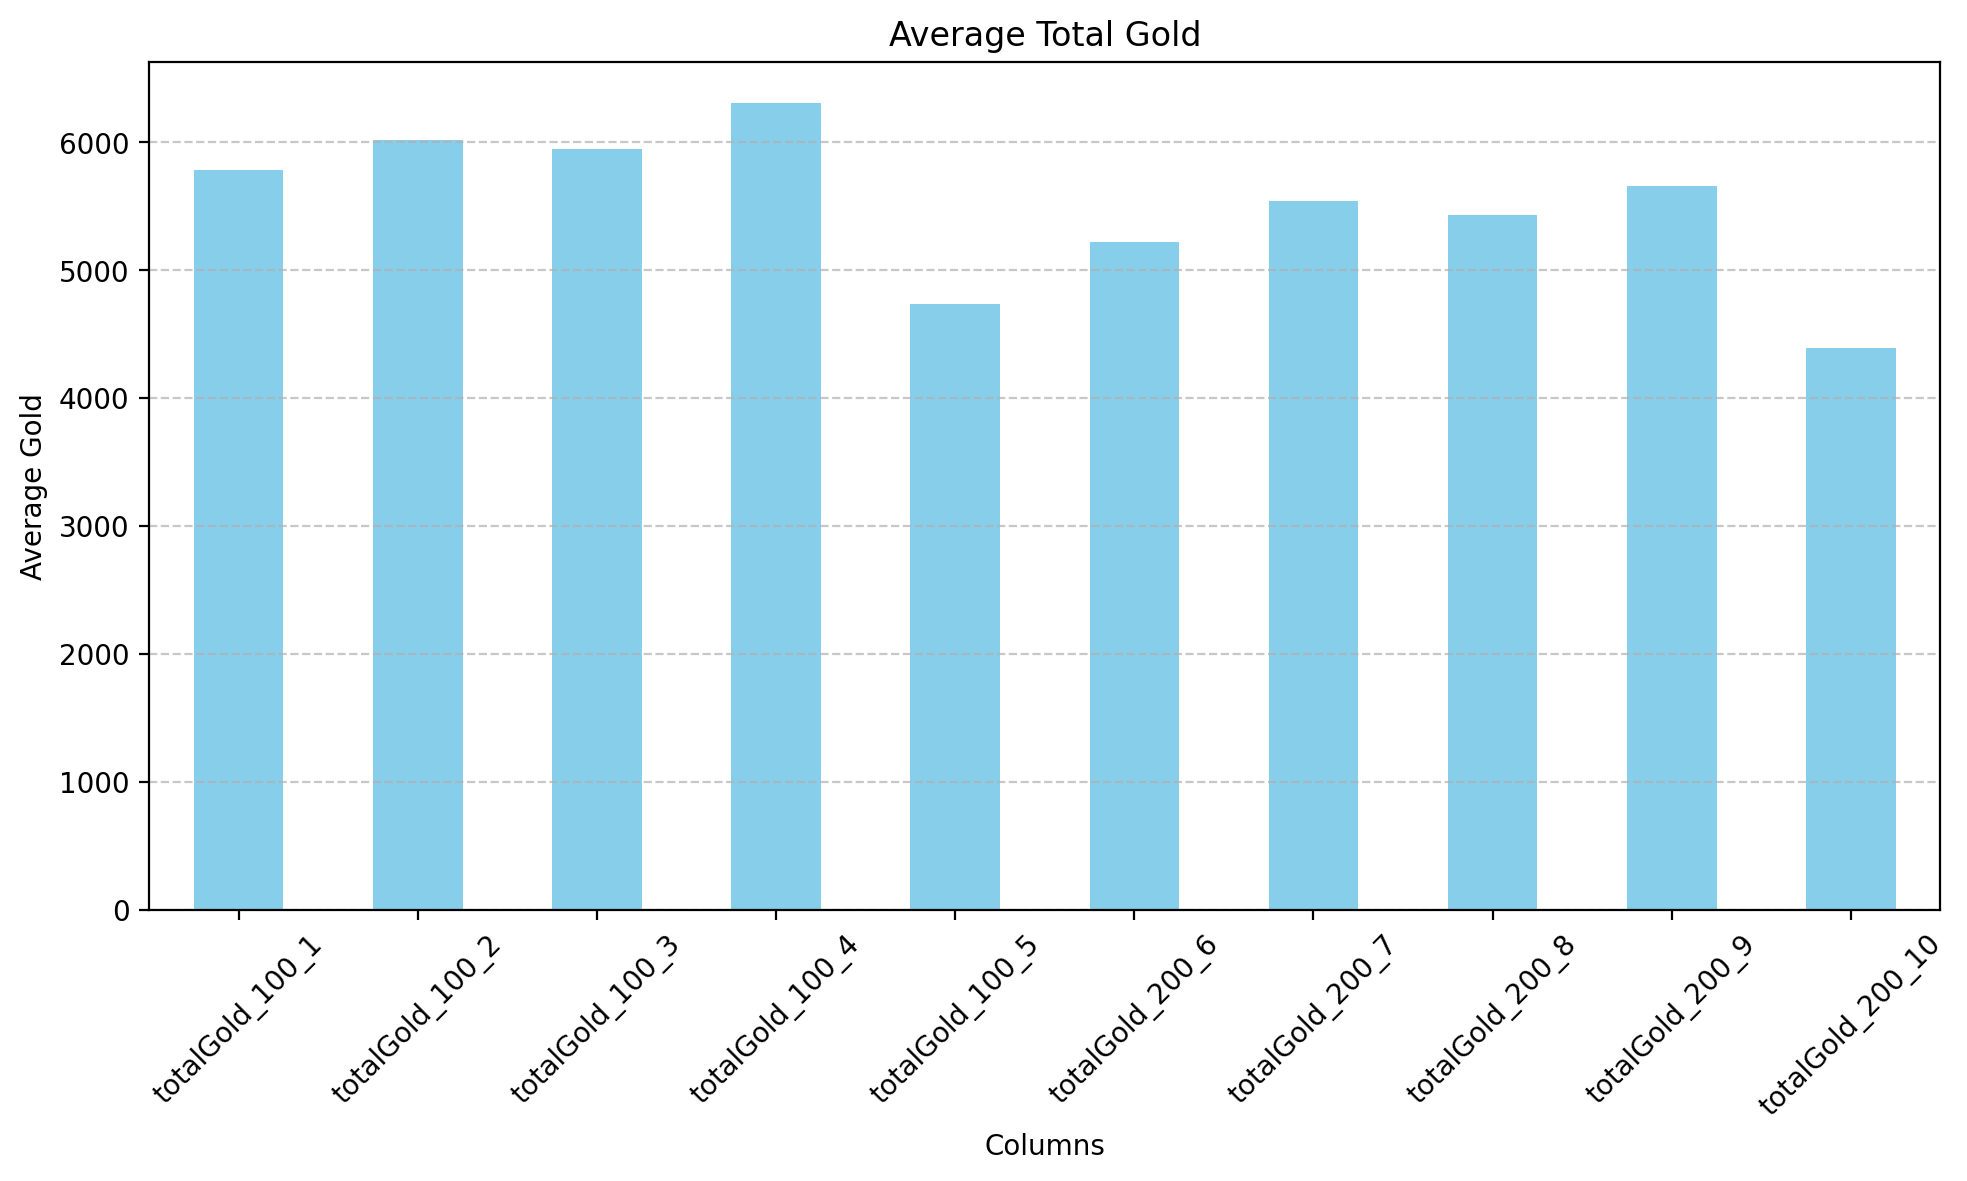

In [95]:
plt.figure(figsize=(10, 6))
winblue.iloc[:,21:31].mean().plot(kind='bar', color='skyblue')
plt.title('Average Total Gold')
plt.xlabel('Columns')
plt.ylabel('Average Gold')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

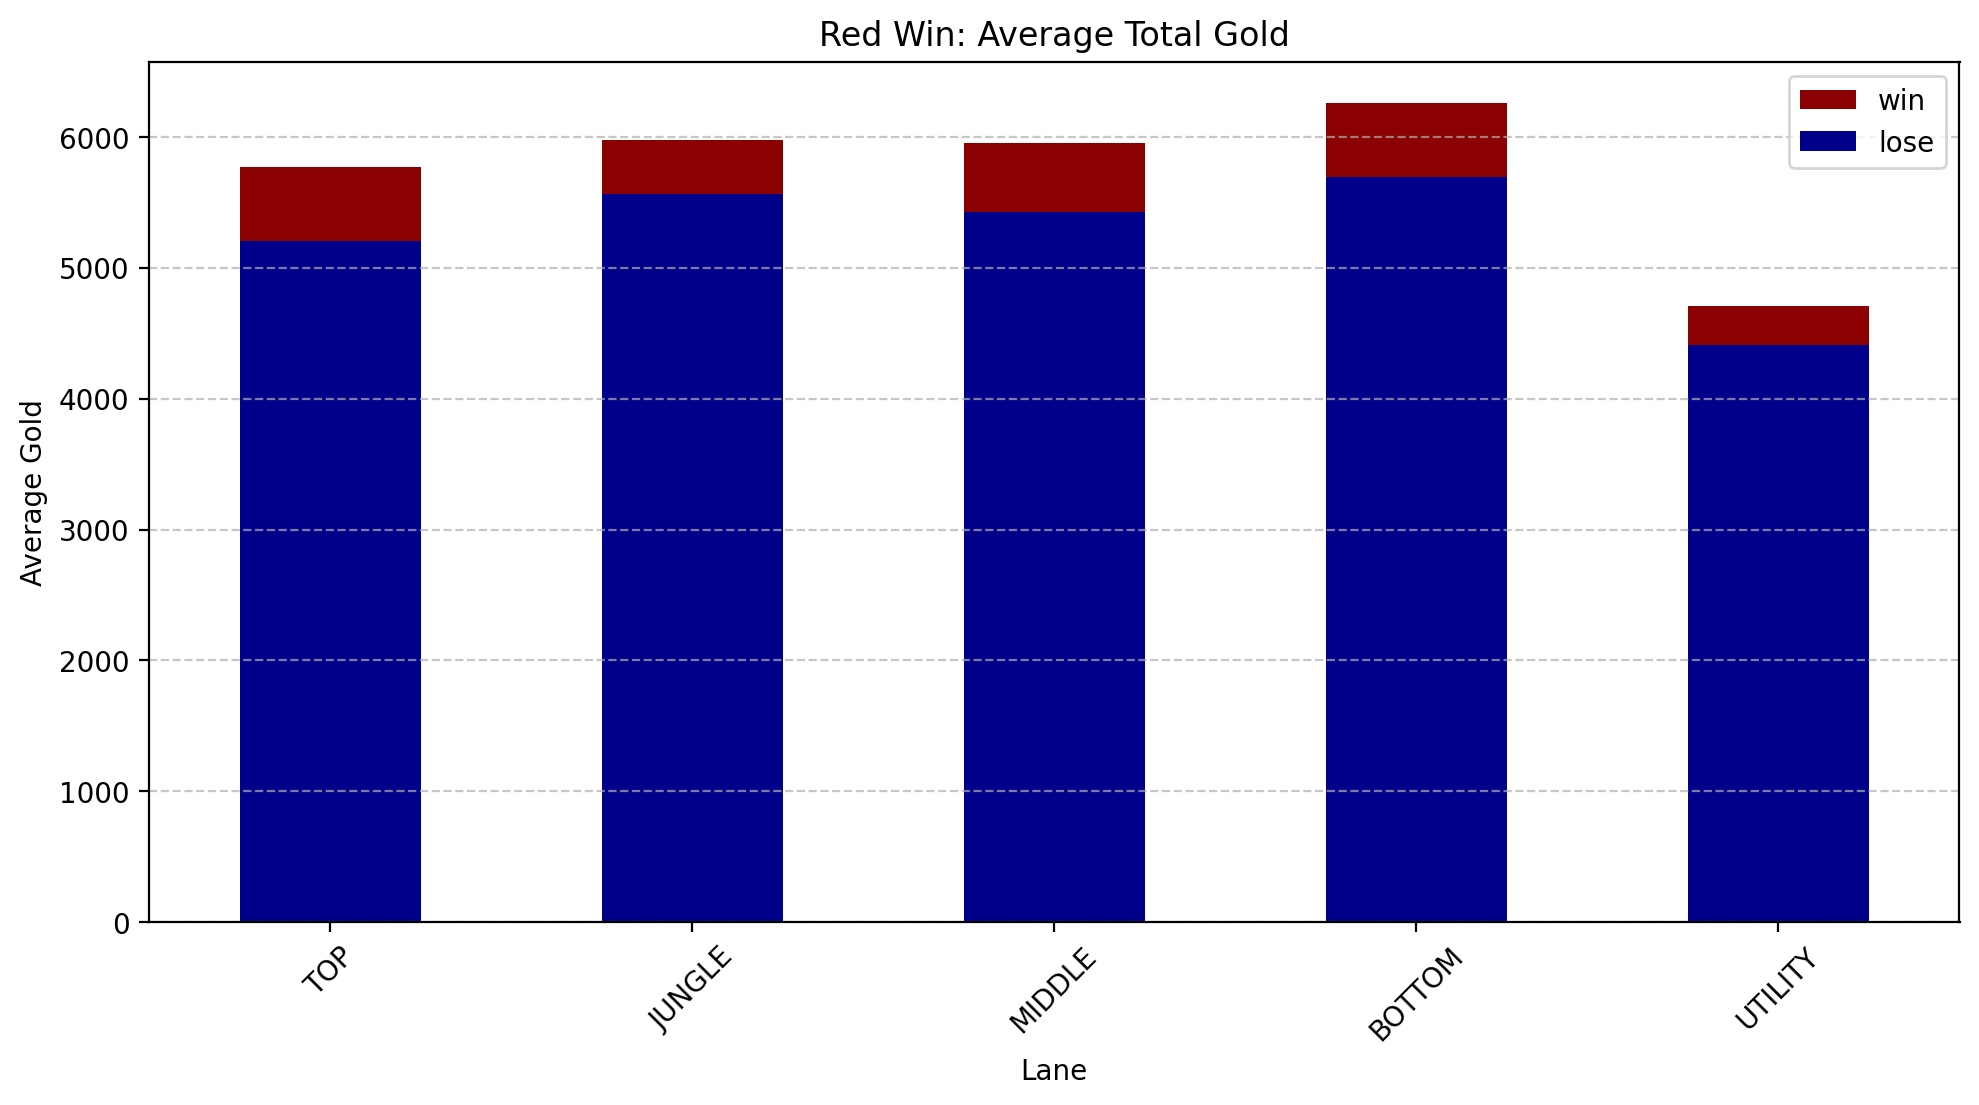

In [201]:
import matplotlib.pyplot as plt

# 그래프 크기 설정
plt.figure(figsize=(10, 6))


# 두 번째 그래프 그리기 (6에서 10까지의 열)
winred.iloc[:, 26:31].mean().plot(kind='bar', color='darkred', label='win', alpha=1)

# 첫 번째 그래프 그리기 (1에서 5까지의 열)
winred.iloc[:, 21:26].mean().plot(kind='bar', color='darkblue', label='lose', alpha=1)

# 그래프 제목, 라벨, 축 범례 등 추가 설정
plt.title('Red Win: Average Total Gold')
plt.xlabel('Lane')
plt.ylabel('Average Gold')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()

# 새로운 레이블 설정
new_labels = ['TOP', 'JUNGLE', 'MIDDLE', 'BOTTOM', 'UTILITY']
plt.xticks(ticks=range(5), labels=new_labels)

# 그래프 표시
plt.show()


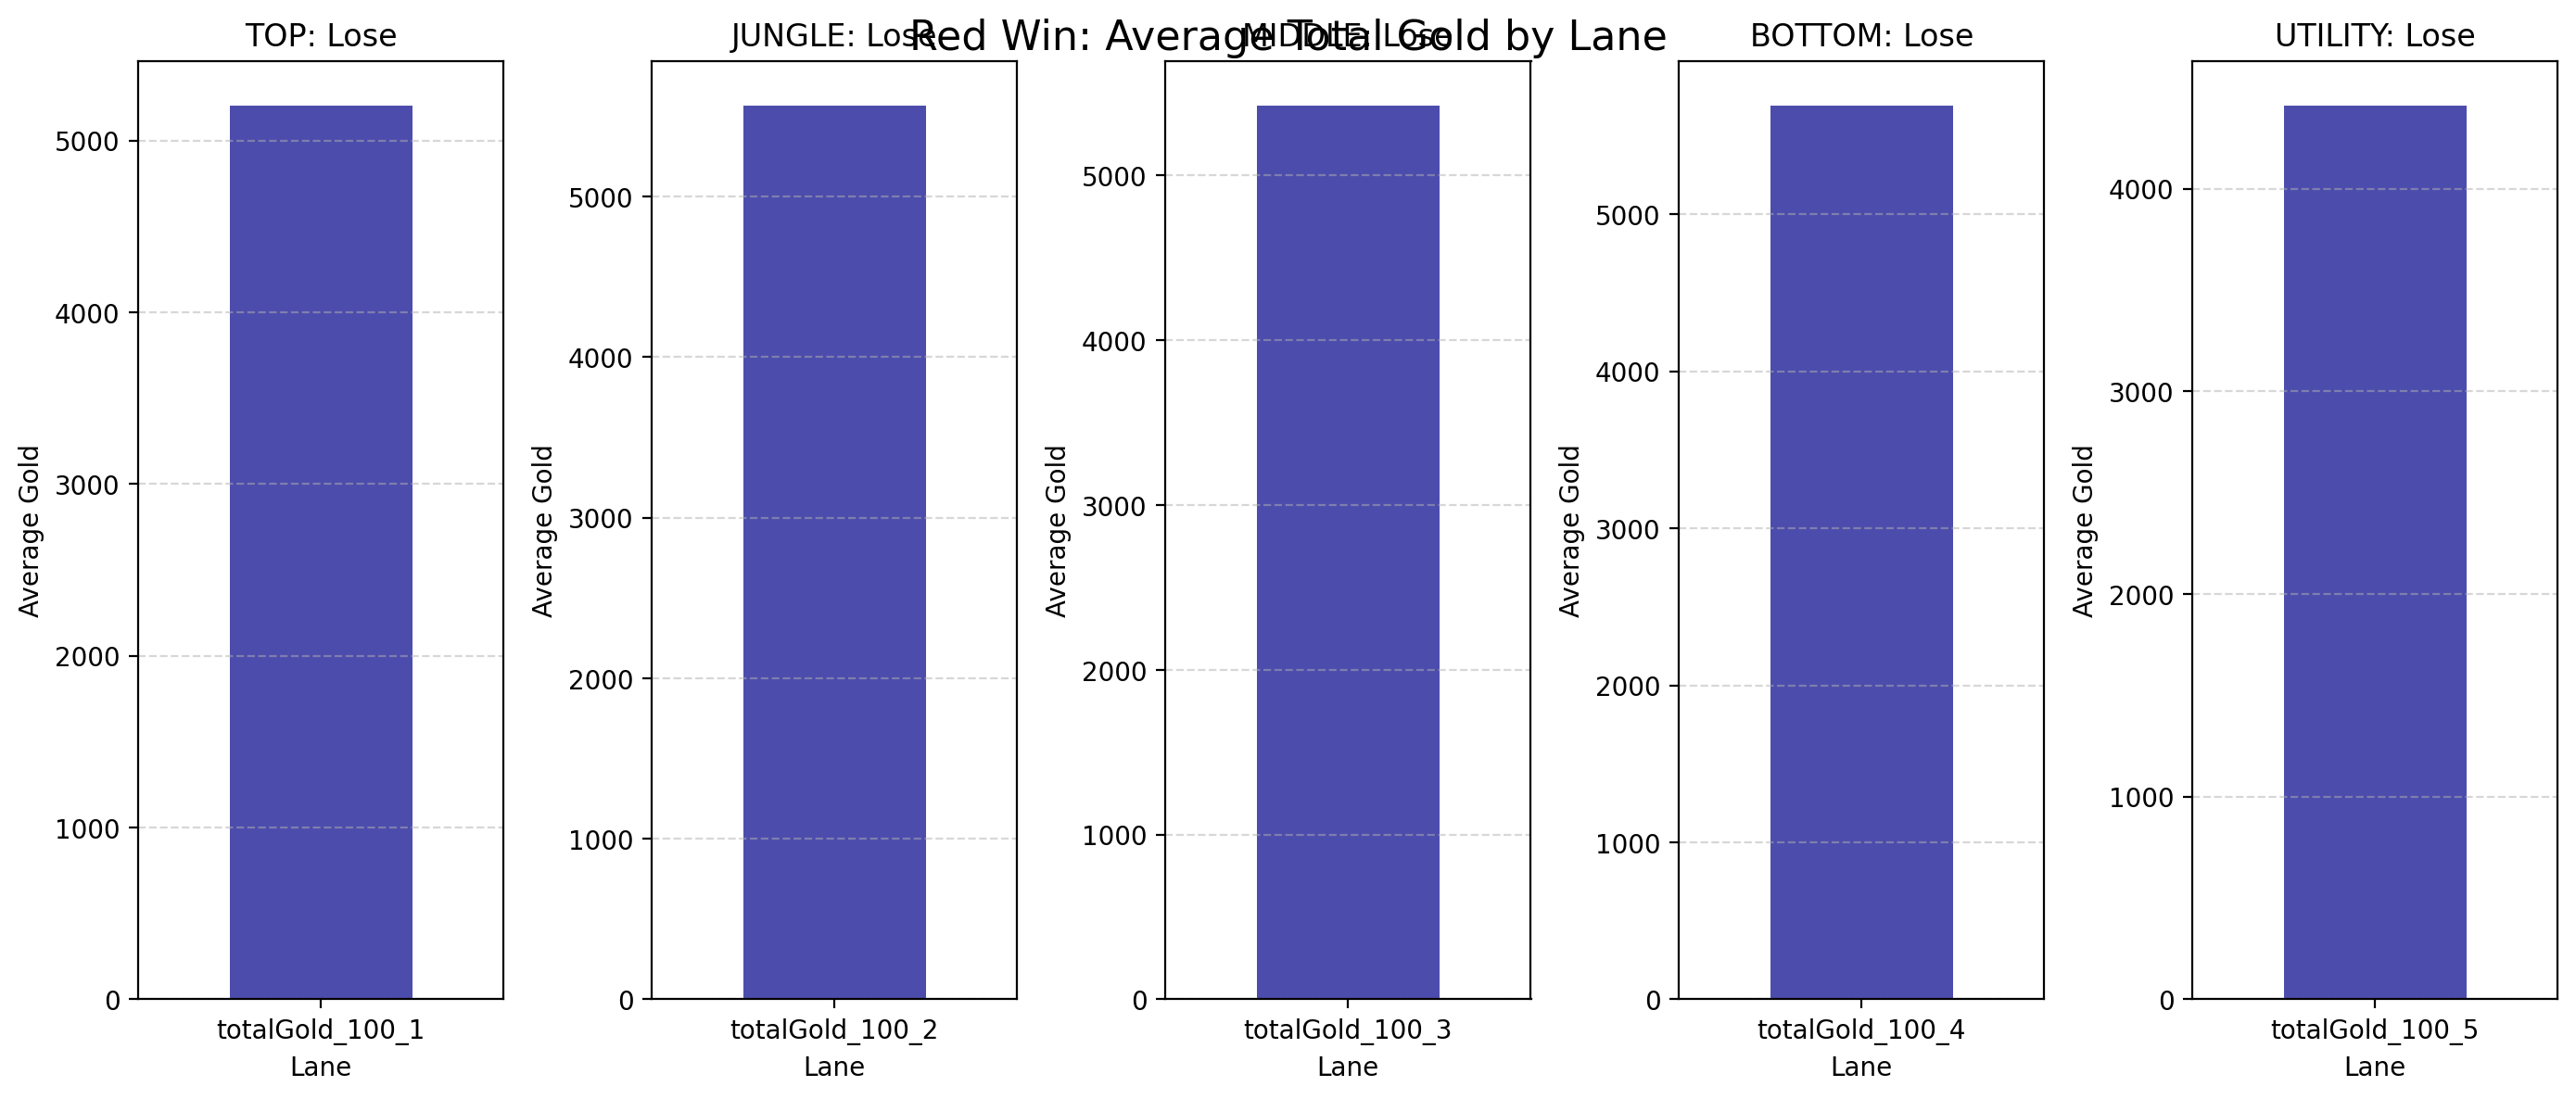

In [202]:
import matplotlib.pyplot as plt

# 그래프 크기 설정
plt.figure(figsize=(14, 6))

# 새로운 레이블 설정
new_labels = ['TOP', 'JUNGLE', 'MIDDLE', 'BOTTOM', 'UTILITY']

# 각 라인에 해당하는 데이터 추출
for i in range(5):
    plt.subplot(1, 5, i+1)
    # 해당 라인의 데이터 추출 및 그래프 그리기
    winred.iloc[:, 21+i:22+i].mean().plot(kind='bar', color='darkblue', alpha=0.7)
    plt.title(f'{new_labels[i]}: Lose')
    plt.xlabel('Lane')
    plt.ylabel('Average Gold')
    plt.xticks(rotation=0)
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()

# 전체 그래프 제목
plt.suptitle('Red Win: Average Total Gold by Lane', fontsize=16)
plt.show()


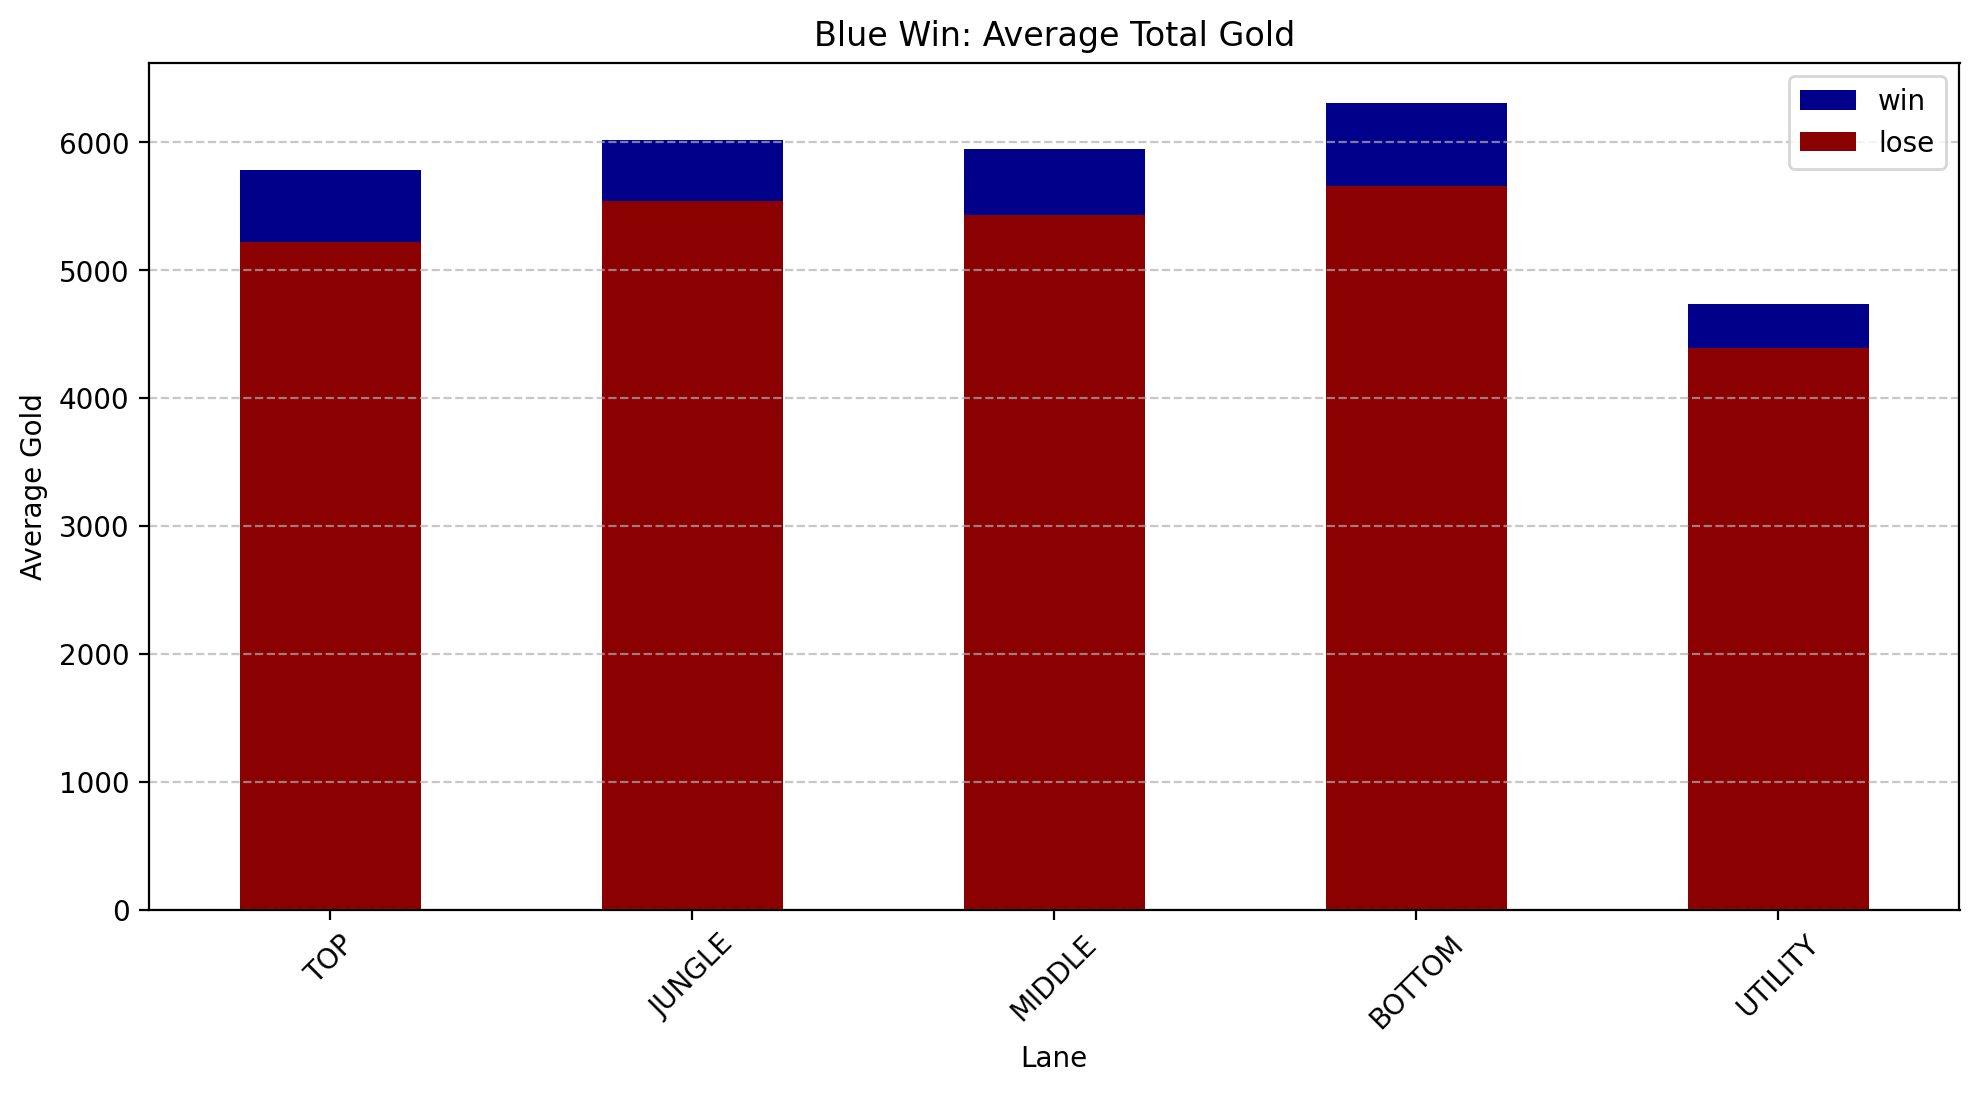

In [197]:
import matplotlib.pyplot as plt

# 그래프 크기 설정
plt.figure(figsize=(10, 6))

# 첫 번째 그래프 그리기 (1에서 5까지의 열)
winblue.iloc[:, 21:26].mean().plot(kind='bar', color='darkblue', label='win',alpha=1)

# 두 번째 그래프 그리기 (6에서 10까지의 열)
winblue.iloc[:, 26:31].mean().plot(kind='bar', color='darkred', label='lose',alpha=1)

# 그래프 제목, 라벨, 축 범례 등 추가 설정
plt.title('Blue Win: Average Total Gold')
plt.xlabel('Lane')
plt.ylabel('Average Gold')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
new_labels = ['TOP', 'JUNGLE', 'MIDDLE', 'BOTTOM', 'UTILITY']
plt.xticks(ticks=range(5), labels=new_labels)

# 그래프 표시
plt.show()

In [ ]:
p = so.Plot(winblue, x="island", color="species")
p.add(so.Bar(), so.Count()).show()  # Bar() mark + Count() transformation

## 챔피언 별 레벨 

In [10]:
matchdata.iloc[:,31:41]

level_100_1  level_100_2  level_100_3  level_100_4  level_100_5  \
0             9.00         9.00        10.00         9.00         9.00   
1            11.00         8.00        11.00         9.00         7.00   
2            10.00         9.00        10.00         9.00         8.00   
...            ...          ...          ...          ...          ...   
37877        10.00         8.00        11.00         9.00         8.00   
37878        11.00         9.00        12.00         8.00         8.00   
37879        10.00         9.00         9.00         9.00         7.00   

       level_200_6  level_200_7  level_200_8  level_200_9  level_200_10  
0            11.00         9.00        12.00         9.00          8.00  
1            11.00         9.00        10.00         9.00          9.00  
2            10.00         9.00        11.00         9.00          8.00  
...            ...          ...          ...          ...           ...  
37877        11.00        10.00        11.00         8.00          7.00  
37878        11.00         9.00        10.00         9.00          8.00  
37879        10.00         8.00        10.00         8.00          7.00  

[37880 rows x 10 columns]

## 챔피언 별 미니언 킬

In [ ]:
winblue['minionsKilled_100_5']

In [11]:
matchdata.iloc[:,41:51]

minionsKilled_100_1  minionsKilled_100_2  minionsKilled_100_3  \
0                    62.00                 2.00               115.00   
1                   102.00                 3.00               118.00   
2                    79.00                 7.00               109.00   
...                    ...                  ...                  ...   
37877                66.00                 8.00                96.00   
37878               116.00                 3.00               136.00   
37879                83.00                 3.00                88.00   

       minionsKilled_100_4  minionsKilled_100_5  minionsKilled_200_6  \
0                   114.00                42.00               122.00   
1                    96.00                22.00                86.00   
2                   122.00                21.00               100.00   
...                    ...                  ...                  ...   
37877               115.00                20.00               119.00   
37878                92.00                30.00               107.00   
37879               110.00                 9.00               111.00   

       minionsKilled_200_7  minionsKilled_200_8  minionsKilled_200_9  \
0                     3.00               133.00               125.00   
1                     6.00                79.00               109.00   
2                     3.00               123.00               102.00   
...                    ...                  ...                  ...   
37877                 7.00               129.00                99.00   
37878                19.00                82.00               120.00   
37879                 3.00               103.00               112.00   

       minionsKilled_200_10  
0                     27.00  
1                     24.00  
2                     16.00  
...                     ...  
37877                 15.00  
37878                 17.00  
37879                 18.00  

[37880 rows x 10 columns]

In [36]:
# 서폿의 미니언 킬과 승률의 관계
winblue['minionsKilled_100_5']

0       42.00
1       22.00
3       26.00
5       24.00
6       28.00
         ... 
37870    6.00
37872   19.00
37875   27.00
37876   28.00
37879    9.00
Name: minionsKilled_100_5, Length: 19636, dtype: float64

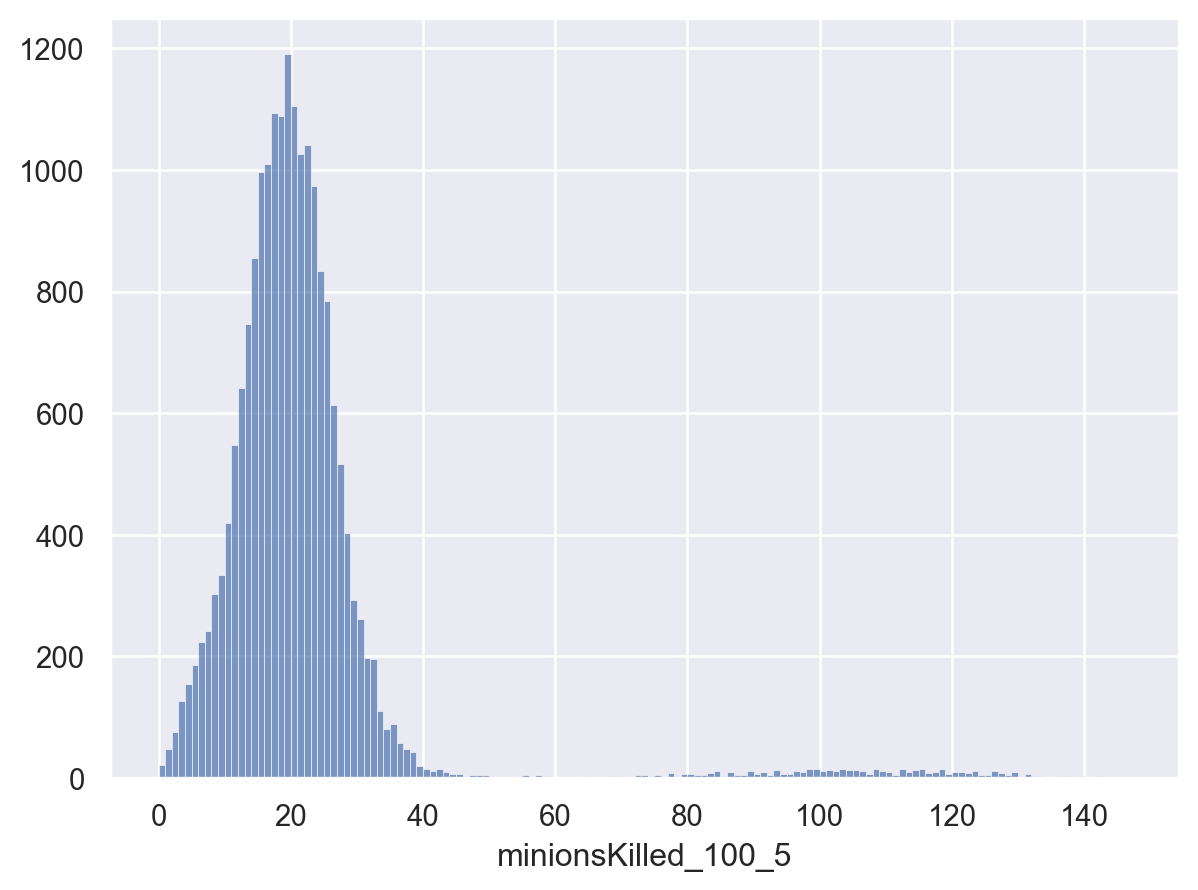

In [38]:

(
    so.Plot(winblue, x="minionsKilled_100_5")
    .add(so.Bars(), so.Hist(binwidth=1))
)

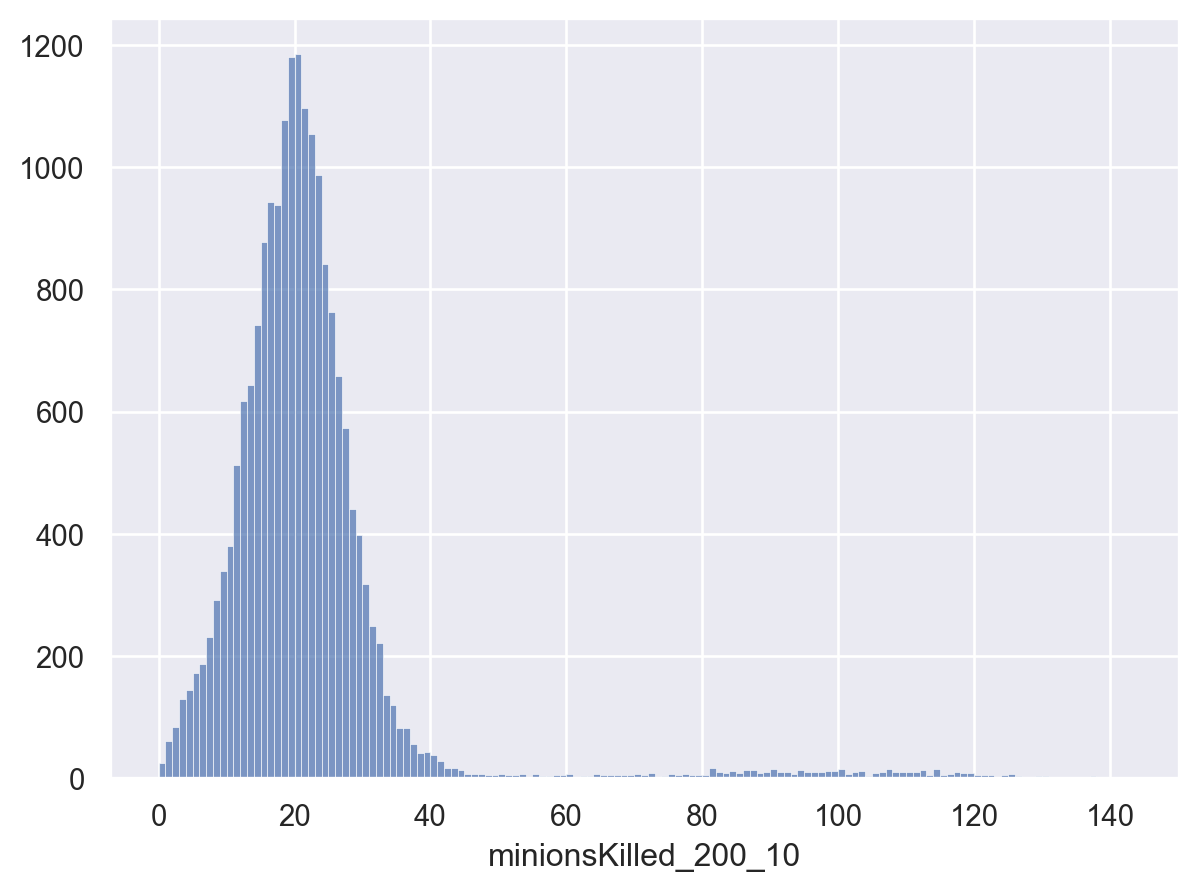

In [39]:
(
    so.Plot(winblue, x="minionsKilled_200_10")
    .add(so.Bars(), so.Hist(binwidth=1))
)

## 정글미니언 킬 

In [12]:
matchdata.iloc[:,51:61]

jungleMinionsKilled_100_1  jungleMinionsKilled_100_2  \
0                           2.00                      92.00   
1                           0.00                      76.00   
2                           0.00                      76.00   
...                          ...                        ...   
37877                       0.00                      58.00   
37878                       2.00                      90.00   
37879                       0.00                      58.00   

       jungleMinionsKilled_100_3  jungleMinionsKilled_100_4  \
0                           0.00                       0.00   
1                           0.00                       0.00   
2                           0.00                       0.00   
...                          ...                        ...   
37877                       0.00                       0.00   
37878                       0.00                       0.00   
37879                       0.00                       0.00   

       jungleMinionsKilled_100_5  jungleMinionsKilled_200_6  \
0                           0.00                       4.00   
1                           0.00                       0.00   
2                           0.00                       0.00   
...                          ...                        ...   
37877                       0.00                       4.00   
37878                       0.00                       0.00   
37879                       0.00                       0.00   

       jungleMinionsKilled_200_7  jungleMinionsKilled_200_8  \
0                          70.00                       0.00   
1                          84.00                       0.00   
2                          80.00                       0.00   
...                          ...                        ...   
37877                      97.00                       0.00   
37878                      92.00                       0.00   
37879                      69.00                       0.00   

       jungleMinionsKilled_200_9  jungleMinionsKilled_200_10  
0                           0.00                        0.00  
1                           0.00                        0.00  
2                           0.00                        0.00  
...                          ...                         ...  
37877                       0.00                        0.00  
37878                       0.00                        0.00  
37879                       0.00                        0.00  

[37880 rows x 10 columns]

## 블루팀과 레드팀 오브젝트 

In [16]:
matchdata.iloc[:,61:69]

blue_dragon  blue_firstdragon  blue_HORDE  red_dragon  red_firstdragon  \
0             0.00              0.00        3.00        2.00             1.00   
1             1.00              1.00        6.00        1.00             0.00   
2             0.00              0.00        3.00        1.00             1.00   
...            ...               ...         ...         ...              ...   
37877         1.00              1.00        3.00        1.00             0.00   
37878         1.00              0.00        6.00        1.00             1.00   
37879         1.00              1.00        0.00        0.00             0.00   

       red_HORDE  blue_firstkill  red_firstkill  
0           3.00            1.00           0.00  
1           0.00            1.00           0.00  
2           3.00            0.00           1.00  
...          ...             ...            ...  
37877       0.00            0.00           1.00  
37878       0.00            1.00           0.00  
37879       6.00            0.00           1.00  

[37880 rows x 8 columns]

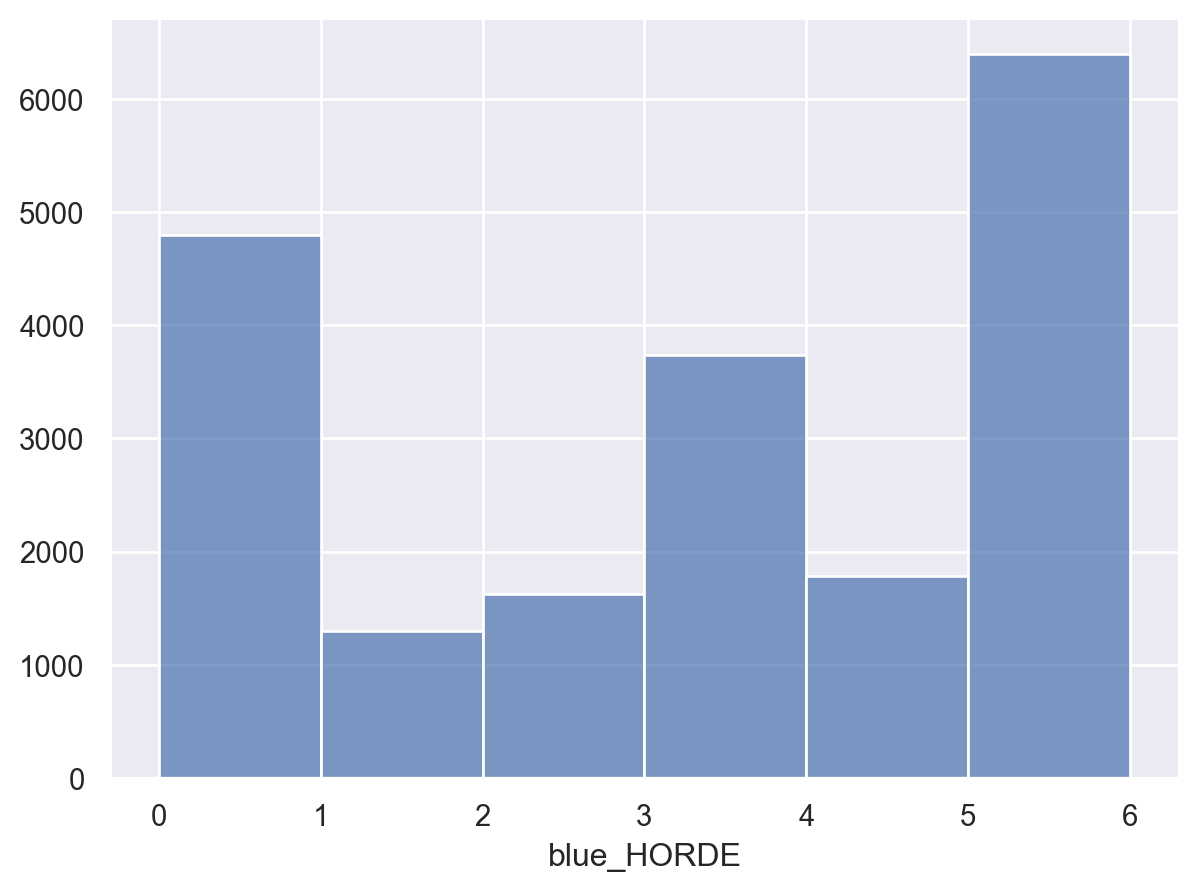

In [140]:
# 이긴 팀의 유충 개수 
(
    so.Plot(winblue, x="blue_HORDE")
    .add(so.Bars(), so.Hist(binwidth=1))
    
)

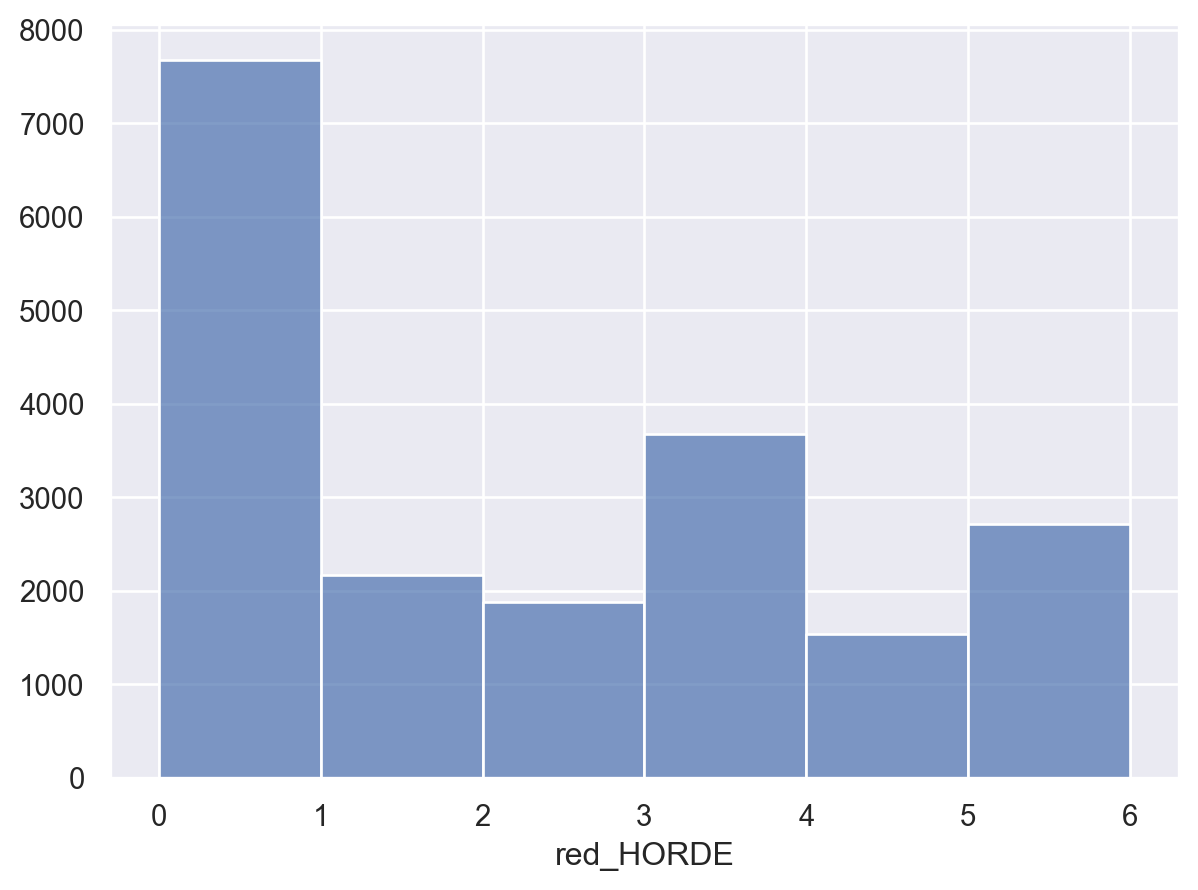

In [145]:
# 진 팀의 유충 개수 
(
    so.Plot(winblue, x="red_HORDE")
    .add(so.Bars(), so.Hist(binwidth=1))
    
)


In [ ]:
winblue['blue_HORDE'].plot(kind='bar', color='blue', alpha=0.5, label='Blue HORDE')


## 플레이어별 KDA 

In [22]:
matchdata.iloc[:,69:99]

player1kills  player1assists  player1deaths  player2kills  \
0              1.00            0.00           5.00          0.00   
1              3.00            0.00           3.00          0.00   
2              1.00            1.00           4.00          3.00   
...             ...             ...            ...           ...   
37877          4.00            3.00           4.00          4.00   
37878          2.00            1.00           2.00          9.00   
37879          4.00            7.00           2.00          4.00   

       player2assists  player2deaths  player3kills  player3assists  \
0                0.00           4.00          0.00            0.00   
1                0.00           4.00          7.00            8.00   
2                4.00           4.00          2.00            3.00   
...               ...            ...           ...             ...   
37877            4.00           7.00          3.00            0.00   
37878           10.00           1.00          2.00            1.00   
37879            5.00           4.00          5.00            7.00   

       player3deaths  player4kills  ...  player7deaths  player8kills  \
0               3.00          6.00  ...           1.00          2.00   
1               4.00          3.00  ...           2.00          1.00   
2               1.00          1.00  ...           1.00          7.00   
...              ...           ...  ...            ...           ...   
37877           2.00          3.00  ...           4.00          4.00   
37878           0.00          1.00  ...           3.00          0.00   
37879           3.00          7.00  ...           5.00          4.00   

       player8assists  player8deaths  player9kills  player9assists  \
0                1.00           0.00          4.00            7.00   
1                0.00           3.00          5.00            7.00   
2               13.00           0.00          3.00            4.00   
...               ...            ...           ...             ...   
37877            2.00           3.00          3.00            3.00   
37878            0.00           3.00          4.00            4.00   
37879            3.00           4.00          1.00            1.00   

       player9deaths  player10kills  player10assists  player10deaths  
0               2.00           1.00             0.00            4.00  
1               4.00           8.00            13.00            1.00  
2               2.00           2.00             2.00            4.00  
...              ...            ...              ...             ...  
37877           3.00           1.00             1.00            4.00  
37878           3.00           1.00             0.00            3.00  
37879           4.00           2.00             2.00            4.00  

[37880 rows x 30 columns]

## 팀 별 오브젝트 

In [28]:
matchdata.iloc[:,99:105]

team100buildingkill  team200buildingkill  team100wardplaced  \
0                     0.00                 1.00              33.00   
1                     1.00                 0.00              35.00   
2                     0.00                 0.00              38.00   
...                    ...                  ...                ...   
37877                 1.00                 2.00              35.00   
37878                 0.00                 0.00              26.00   
37879                 0.00                 0.00              18.00   

       team200wardplaced  team100wardkill  team200wardkill  
0                  45.00            14.00             7.00  
1                  26.00             8.00             5.00  
2                  29.00             8.00            19.00  
...                  ...              ...              ...  
37877              47.00             5.00             6.00  
37878              30.00            12.00             9.00  
37879              22.00             4.00             3.00  

[37880 rows x 6 columns]

In [124]:
winblue['team100wardplaced'].describe()

count   19636.00
mean       43.85
std        47.48
min         7.00
25%        26.00
50%        30.00
75%        38.00
max       720.00
Name: team100wardplaced, dtype: float64

In [125]:
winblue['team200wardplaced'].describe()

count   19636.00
mean       45.04
std        46.76
min        10.00
25%        27.00
50%        31.00
75%        39.00
max       570.00
Name: team200wardplaced, dtype: float64

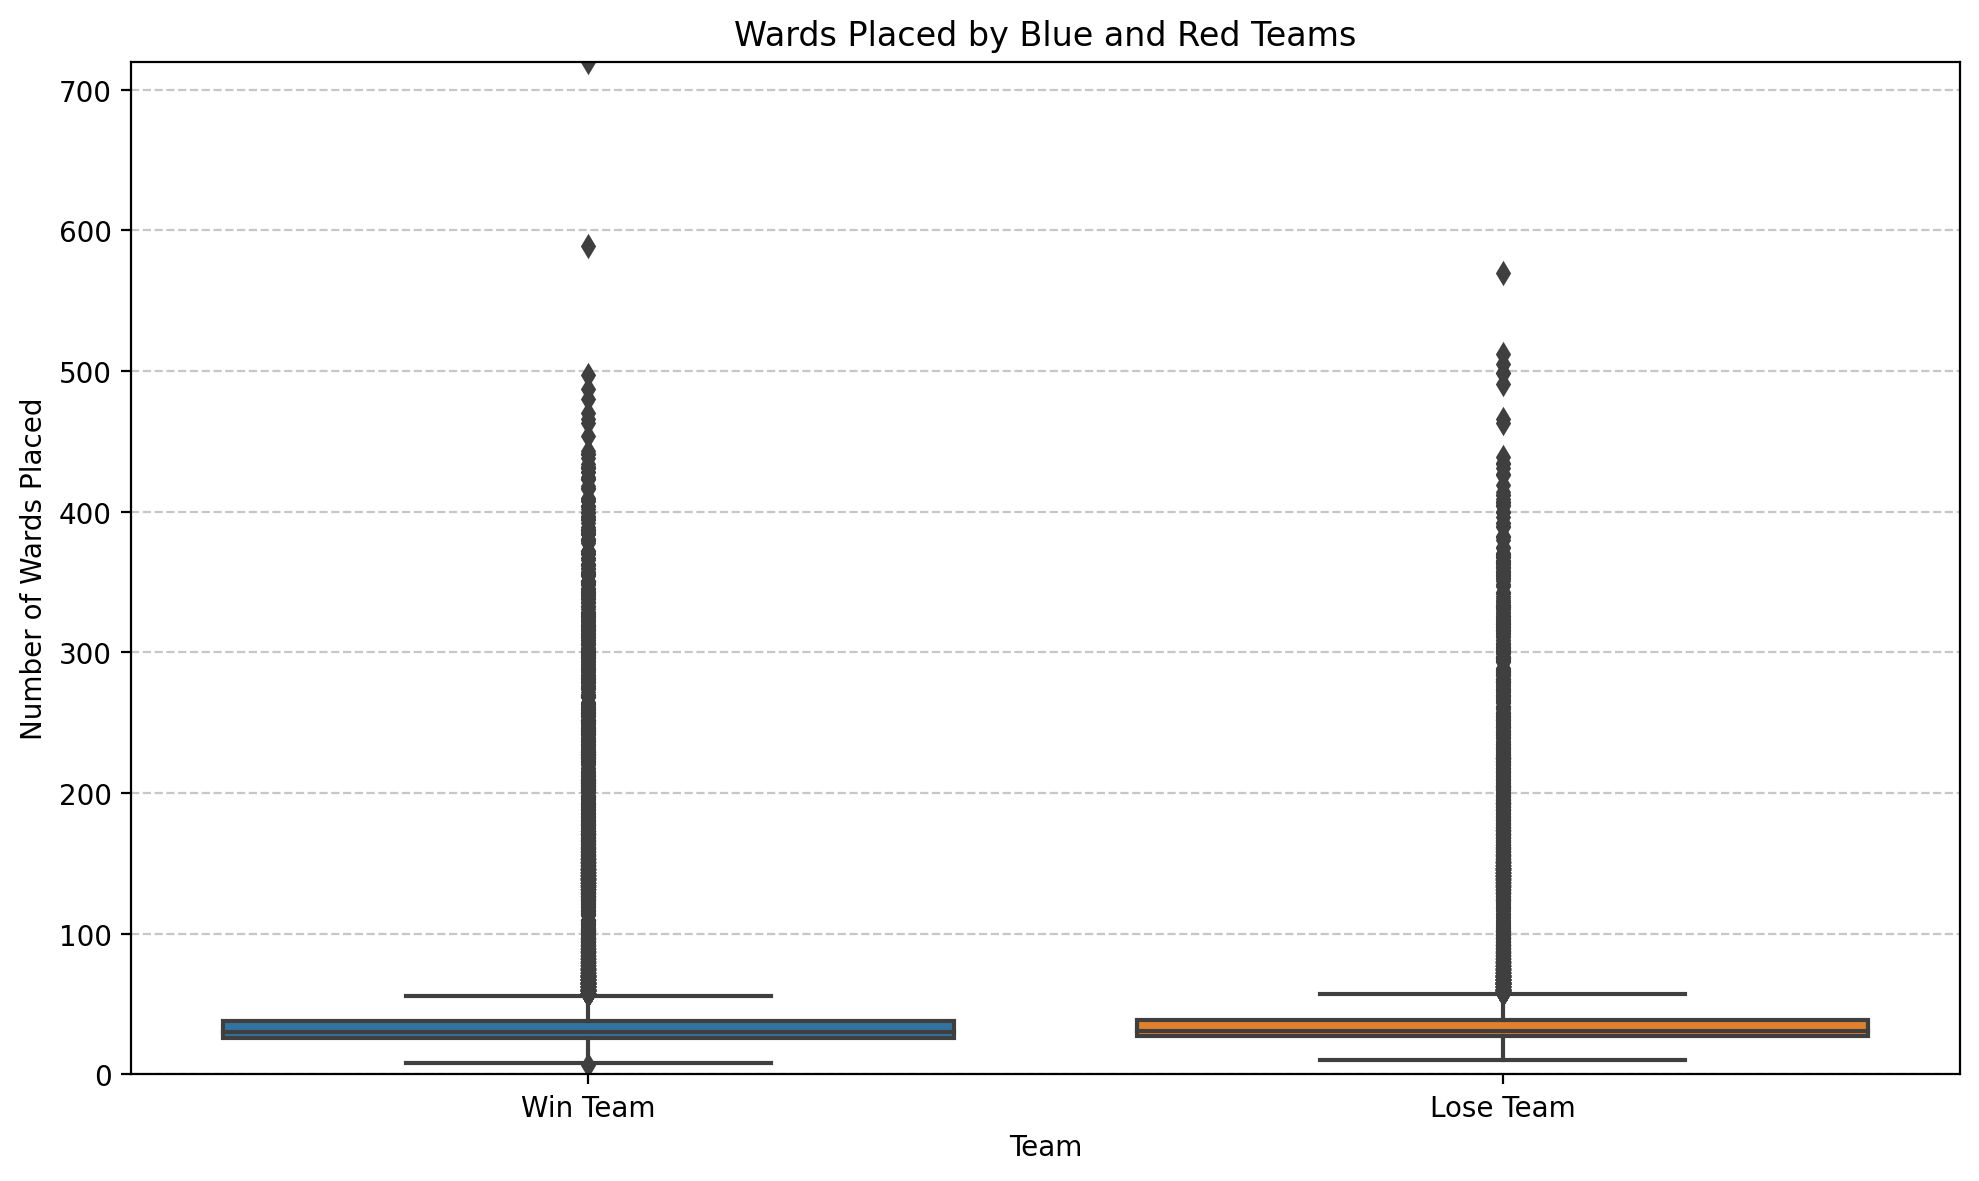

In [136]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=winblue[['team100wardplaced', 'team200wardplaced']])
plt.title('Wards Placed by Blue and Red Teams')
plt.xlabel('Team')
plt.ylabel('Number of Wards Placed')
plt.xticks(ticks=[0, 1], labels=['Win Team', 'Lose Team'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.ylim(0, 720)  # 수정 가능한 값

plt.tight_layout()
plt.show()

In [ ]:
# 이긴 팀의 와드 박힌 개수 
(
    so.Plot(winblue, x="team100wardplaced")
    .add(so.Bars(), so.Hist(binwidth=10))
    
)

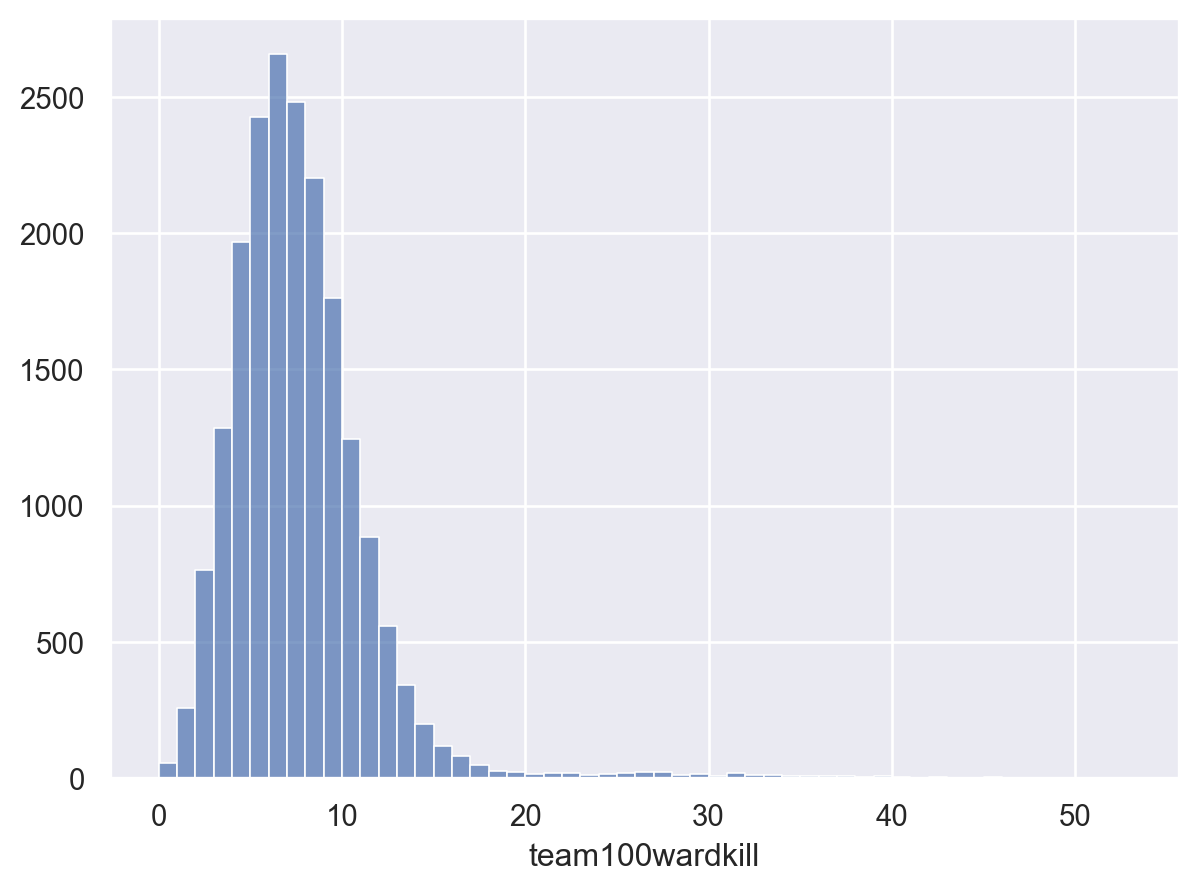

In [189]:
# 이긴 팀의 와드 삭제 개수 
(
    so.Plot(winblue, x="team100wardkill")
    .add(so.Bars(), so.Hist(binwidth=1))
    
)

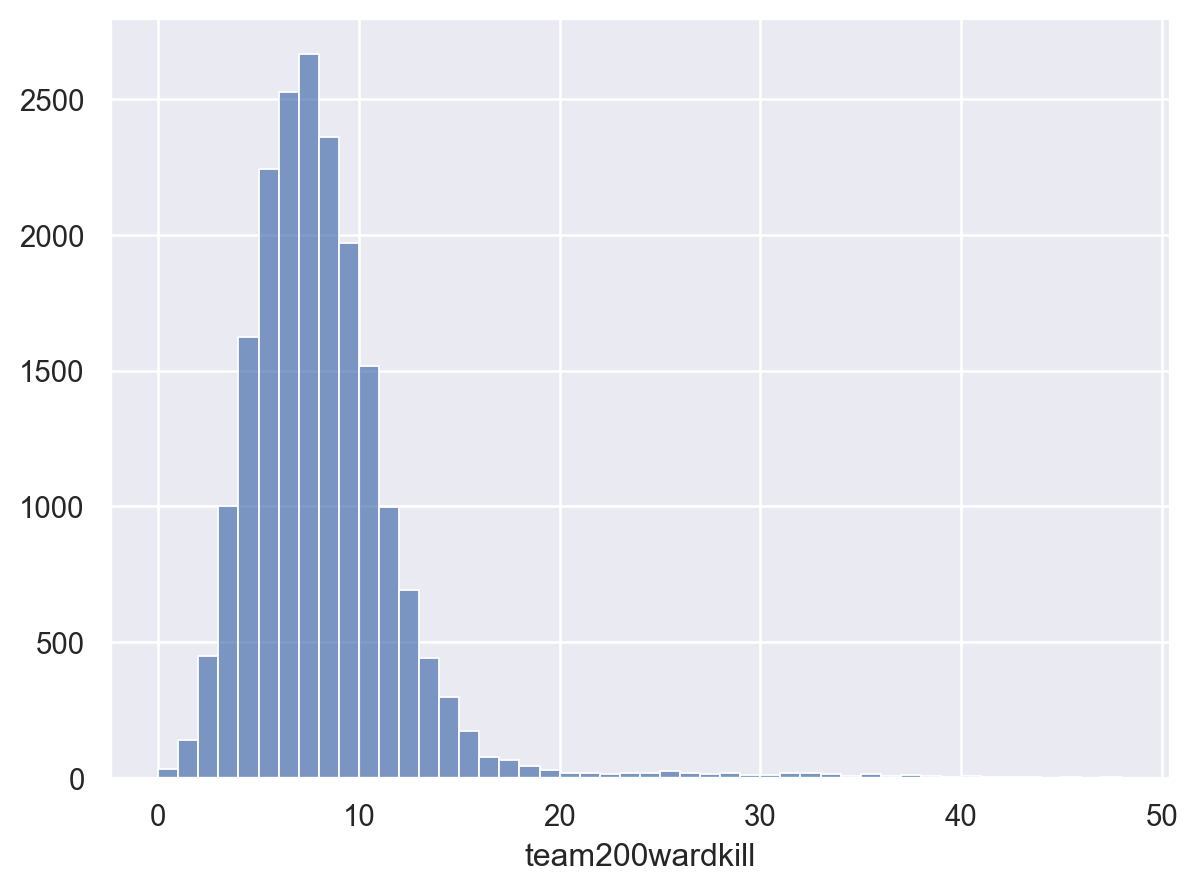

In [171]:
# 이긴 팀의 와드 삭제 개수 
(
    so.Plot(winblue, x="team200wardkill")
    .add(so.Bars(), so.Hist(binwidth=1))
    
)

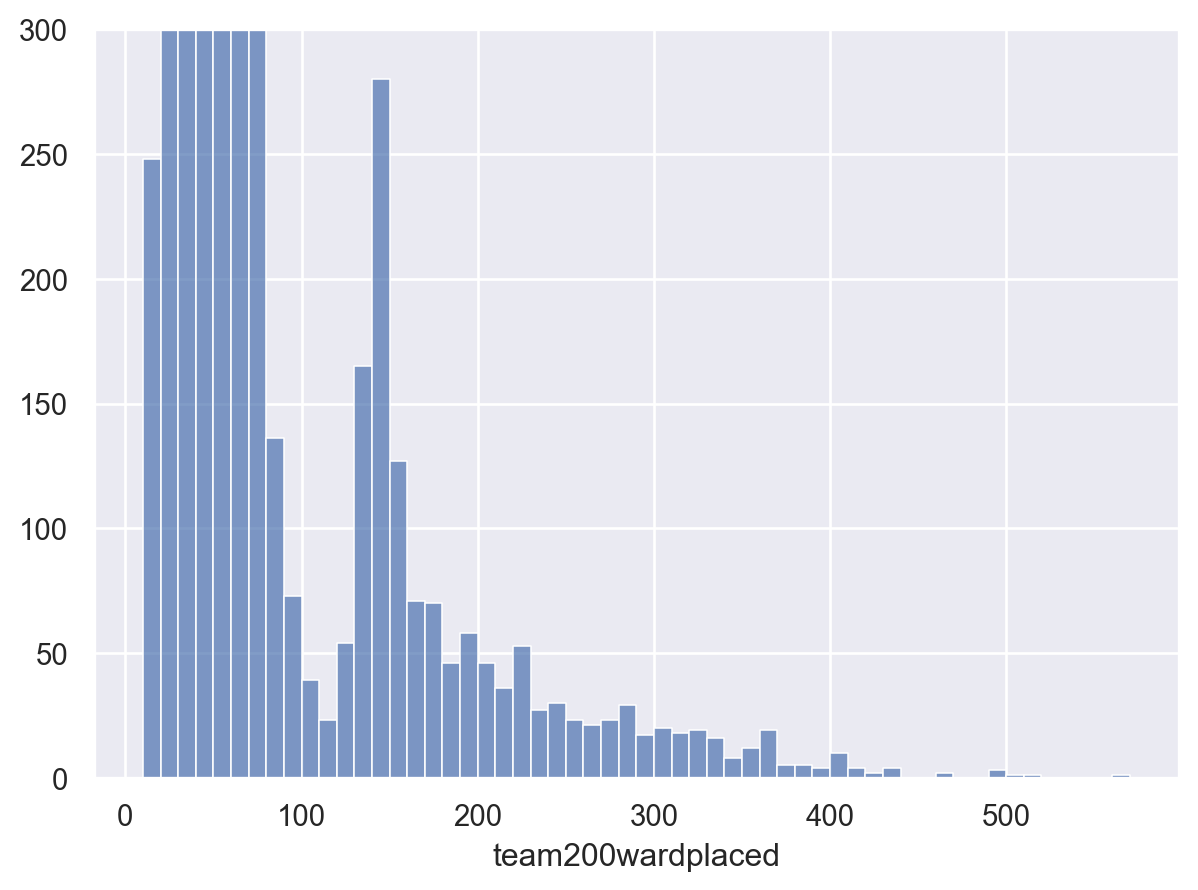

In [117]:
# 진 팀의 와드 박힌 개수 
(
    so.Plot(winblue, x="team200wardplaced")
    .add(so.Bars(), so.Hist(binwidth=10))
    .limit(y=(0, 300))
)

In [180]:
sum(winblue['team200wardplaced']>57)

2590

In [182]:
sum(winblue['team100wardplaced']>56)

2499

In [179]:
lower = winblue['team200wardplaced'].quantile(0.25)-1.5*(winblue['team200wardplaced'].quantile(0.75)-winblue['team200wardplaced'].quantile(0.25)) # 하한선 
upper = winblue['team200wardplaced'].quantile(0.75)+1.5*(winblue['team200wardplaced'].quantile(0.75)-winblue['team200wardplaced'].quantile(0.25)) # 상한선
print(lower)
print(upper)
print(((winblue['team200wardplaced'] < lower) | (winblue['team200wardplaced'] > upper)).sum()) # 열별 이상치 개수 

9.0
57.0
2590


In [181]:
lower = winblue['team100wardplaced'].quantile(0.25)-1.5*(winblue['team100wardplaced'].quantile(0.75)-winblue['team100wardplaced'].quantile(0.25)) # 하한선 
upper = winblue['team100wardplaced'].quantile(0.75)+1.5*(winblue['team100wardplaced'].quantile(0.75)-winblue['team100wardplaced'].quantile(0.25)) # 상한선
print(lower)
print(upper)
print(((winblue['team100wardplaced'] < lower) | (winblue['team100wardplaced'] > upper)).sum()) # 열별 이상치 개수 

8.0
56.0
2500


In [119]:
matchdata['team100wardpoint'] = matchdata['team100wardkill'] + matchdata['team100wardplaced']
matchdata['team200wardpoint'] = matchdata['team200wardkill'] + matchdata['team200wardplaced']

## 플레이어별 토탈 데미지 

In [30]:
matchdata.iloc[:,105:115]

player1totaldamage  player2totaldamage  player3totaldamage  \
0                10506.00             3884.00             1954.00   
1                12436.00             3030.00            12012.00   
2                 7347.00             5234.00             6597.00   
...                   ...                 ...                 ...   
37877             4764.00             5568.00             9436.00   
37878             8182.00             7621.00             8634.00   
37879            11579.00             7946.00             8102.00   

       player4totaldamage  player5totaldamage  player6totaldamage  \
0                 7519.00             4468.00             8367.00   
1                 7307.00             5338.00             6291.00   
2                 7997.00             4614.00             5083.00   
...                   ...                 ...                 ...   
37877             9471.00             8846.00            15532.00   
37878             4055.00             5897.00            11834.00   
37879            11820.00             3096.00             6610.00   

       player7totaldamage  player8totaldamage  player9totaldamage  \
0                 9573.00             5281.00             6451.00   
1                 6113.00             4854.00            10300.00   
2                 4081.00             6059.00             8810.00   
...                   ...                 ...                 ...   
37877             7043.00             9056.00             7641.00   
37878             7725.00             4060.00             6276.00   
37879             6539.00             7591.00             5921.00   

       player10totaldamage  
0                  6047.00  
1                  9562.00  
2                  8911.00  
...                    ...  
37877              3880.00  
37878              6621.00  
37879              7194.00  

[37880 rows x 10 columns]

## 플레이어별 물리 데미지 

In [31]:
matchdata.iloc[:,115:125]

player1physicaldamage  player2physicaldamage  player3physicaldamage  \
0                    2357.00                 703.00                1464.00   
1                    1774.00                2786.00               10062.00   
2                    6611.00                3420.00                 992.00   
...                      ...                    ...                    ...   
37877                 718.00                4867.00                6177.00   
37878                7320.00                 751.00                 459.00   
37879                9961.00                 413.00                7063.00   

       player4physicaldamage  player5physicaldamage  player6physicaldamage  \
0                    7501.00                 919.00                 350.00   
1                    6584.00                 558.00                3743.00   
2                    6853.00                1321.00                2188.00   
...                      ...                    ...                    ...   
37877                8972.00                 916.00               14007.00   
37878                3135.00                 946.00               10065.00   
37879               11133.00                 527.00                1812.00   

       player7physicaldamage  player8physicaldamage  player9physicaldamage  \
0                    7773.00                 590.00                4998.00   
1                    1024.00                 270.00                7410.00   
2                    3709.00                 142.00                8231.00   
...                      ...                    ...                    ...   
37877                 424.00                 940.00                7641.00   
37878                 360.00                2547.00                4363.00   
37879                4791.00                7257.00                4636.00   

       player10physicaldamage  
0                      803.00  
1                     1853.00  
2                     7552.00  
...                       ...  
37877                 1311.00  
37878                 1081.00  
37879                 6870.00  

[37880 rows x 10 columns]

## 플레이어별 마법 데미지 

In [32]:
matchdata.iloc[:,125:135]

player1magicdamage  player2magicdamage  player3magicdamage  \
0                 7875.00             2855.00              489.00   
1                10662.00                0.00             1950.00   
2                  598.00             1518.00             4227.00   
...                   ...                 ...                 ...   
37877             4046.00              306.00             1693.00   
37878              793.00             4949.00             8175.00   
37879             1618.00             7291.00              588.00   

       player4magicdamage  player5magicdamage  player6magicdamage  \
0                    0.00             3382.00             8017.00   
1                  723.00             4491.00             2548.00   
2                 1143.00             3292.00             2894.00   
...                   ...                 ...                 ...   
37877              338.00             7929.00              991.00   
37878              920.00             4374.00             1729.00   
37879              351.00             2568.00             3573.00   

       player7magicdamage  player8magicdamage  player9magicdamage  \
0                 1577.00             4515.00             1453.00   
1                 4958.00             4583.00             2889.00   
2                  219.00             5690.00              579.00   
...                   ...                 ...                 ...   
37877             6184.00             8008.00                0.00   
37878             6822.00             1325.00             1847.00   
37879             1420.00                0.00             1225.00   

       player10magicdamage  
0                  4965.00  
1                  6351.00  
2                   278.00  
...                    ...  
37877              2187.00  
37878              5279.00  
37879                 0.00  

[37880 rows x 10 columns]

## 승리 팀 : 타겟 변수 

In [37]:
matchdata.iloc[:,135]

0        [100]
1        [100]
2        [200]
         ...  
37877    [200]
37878    [200]
37879    [100]
Name: winteam, Length: 37880, dtype: object

C:\Users\jys72\AppData\Local\Temp\ipykernel_7088\714080401.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(matchdata.corr()[(abs(matchdata.corr())>=0.5) & (abs(matchdata.corr())<0.7)], annot=True)


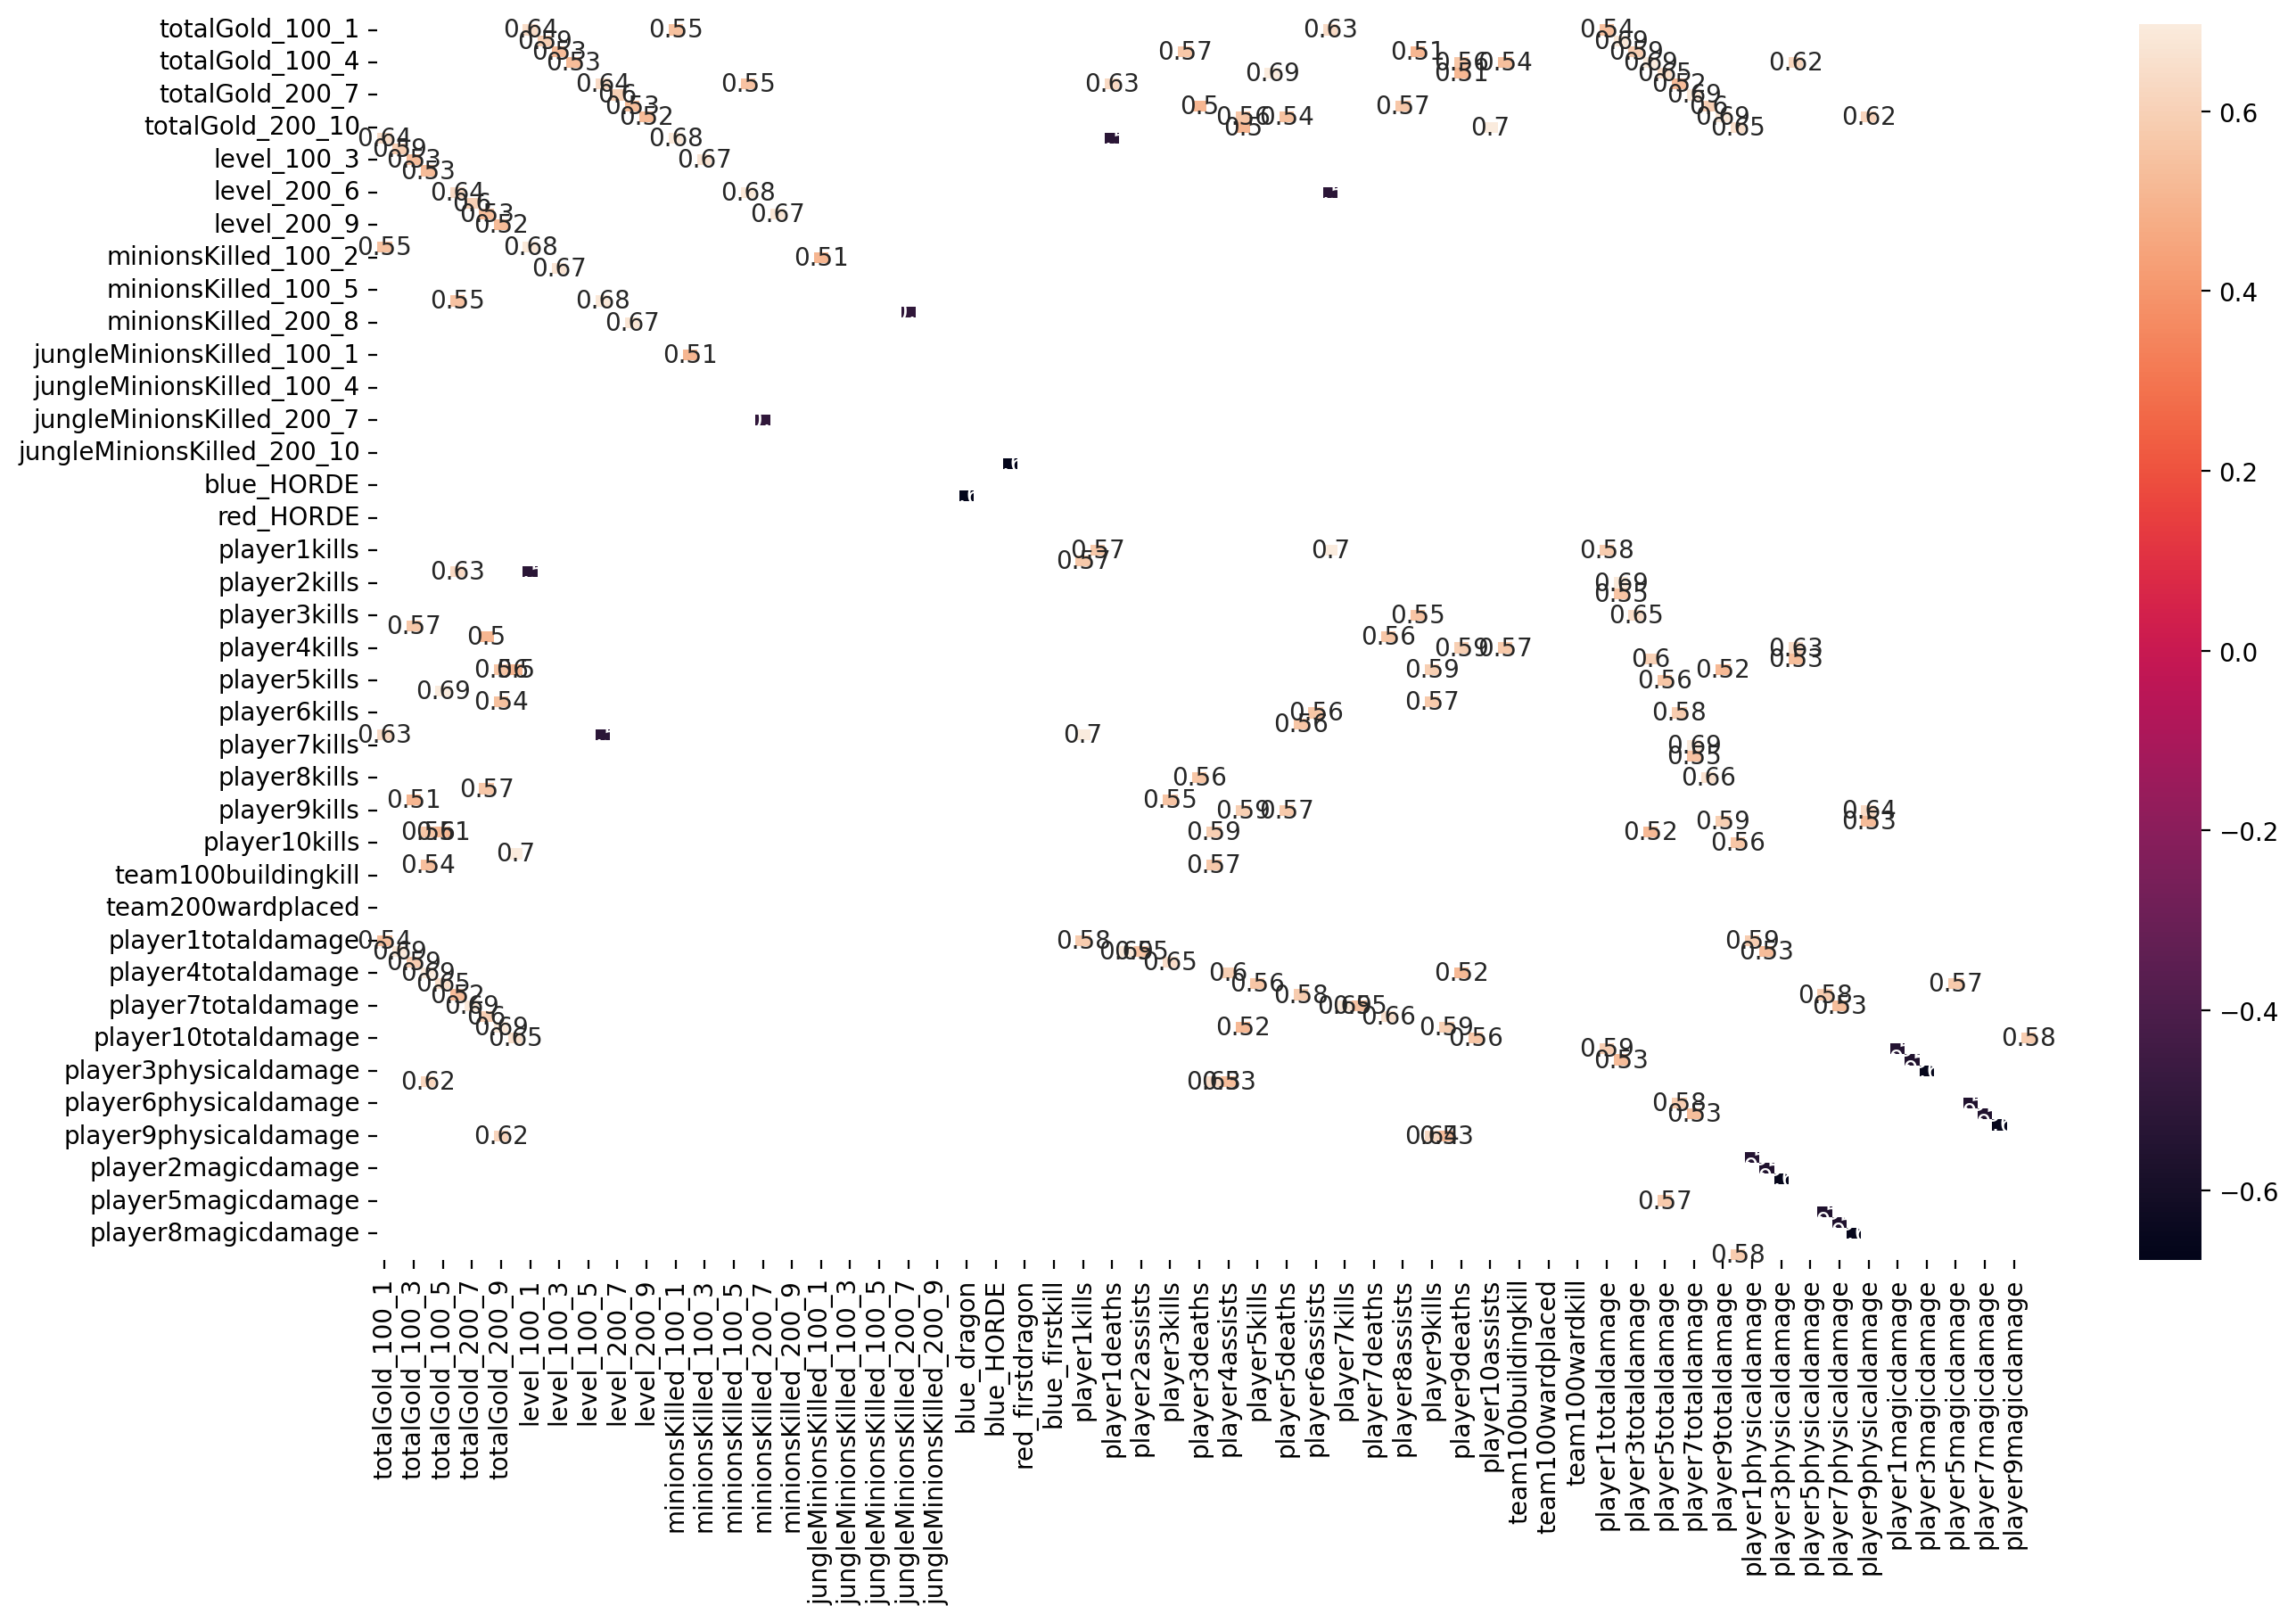

In [4]:
# #변수별 상관관계 살펴보기 
# # 0.7이하, 0.5이상의 상관관계
# plt.figure(figsize=(15, 9))
# sns.heatmap(matchdata.corr()[(abs(matchdata.corr())>=0.5) & (abs(matchdata.corr())<0.7)], annot=True)
# plt.show()

## 종속변수 확인하기: 이긴팀의 비율 확인하기 

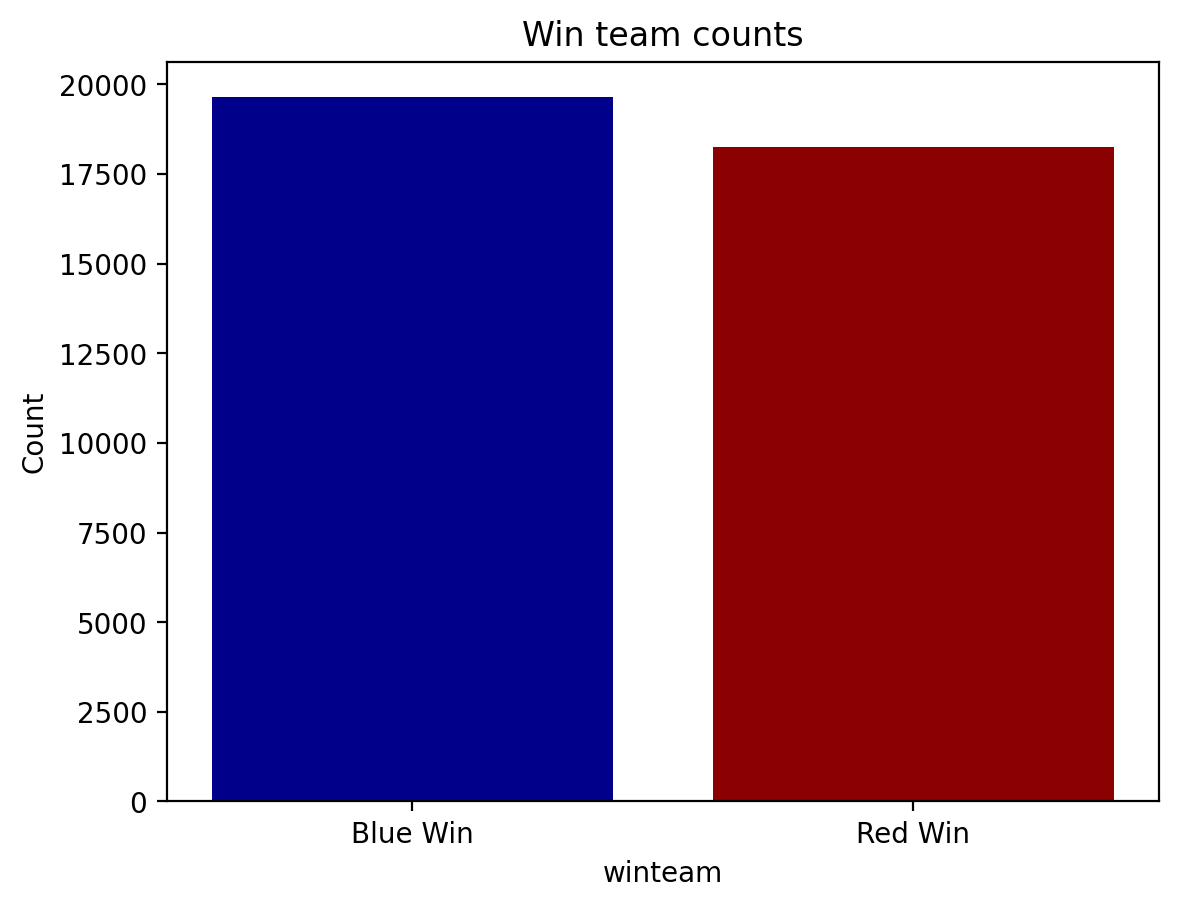

In [229]:
# 종속변수 확인하기 
colors = ['darkblue','darkred']
count = matchdata['winteam'].value_counts()
plt.bar(count.index, count.values, color=colors)
plt.xlabel('winteam')
plt.ylabel('Count')
plt.title('Win team counts')
new_labels = ['Blue Win', 'Red Win']
plt.xticks(ticks=range(2), labels=new_labels)

plt.show()

## 팀이 승리 시의 팀 별 골드량 

In [5]:
#이긴팀이 블루팀일때 
matchdata_blue=matchdata[matchdata['winteam']=='[100]']
matchdata_blue['totalGold_100']=matchdata_blue['totalGold_100_1']+matchdata_blue['totalGold_100_2']+matchdata_blue['totalGold_100_3']+matchdata_blue['totalGold_100_4']+matchdata_blue['totalGold_100_5']
matchdata_blue['totalGold_200']=matchdata_blue['totalGold_200_6']+matchdata_blue['totalGold_200_7']+matchdata_blue['totalGold_200_8']+matchdata_blue['totalGold_200_9']+matchdata_blue['totalGold_200_10']
matchdata_blue

C:\Users\jys72\AppData\Local\Temp\ipykernel_7992\1365412318.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matchdata_blue['totalGold_100']=matchdata_blue['totalGold_100_1']+matchdata_blue['totalGold_100_2']+matchdata_blue['totalGold_100_3']+matchdata_blue['totalGold_100_4']+matchdata_blue['totalGold_100_5']
C:\Users\jys72\AppData\Local\Temp\ipykernel_7992\1365412318.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matchdata_blue['totalGold_200']=matchdata_blue['totalGold_200_6']+matchdata_blue['tota

matchid championName_100_1 championName_100_2 championName_100_3  \
0      KR_6965278983              Teemo               Ekko           Tristana   
1      KR_6961163006        Mordekaiser                 Vi             Irelia   
3      KR_6987828402          Gangplank            Nidalee           Tristana   
5      KR_6948539783              Poppy                 Vi           Malphite   
6      KR_6973961121               Kled                Jax           Kassadin   
...              ...                ...                ...                ...   
37870  KR_6970839806              Kayle            Shyvana               Ekko   
37872  KR_6903747095             Rumble             LeeSin             Anivia   
37875  KR_6879214617             Illaoi              Ivern             Syndra   
37876  KR_6972979983            Karthus             Singed             Aatrox   
37879  KR_6961832296               Gnar              Sylas                Zed   

      championName_100_4 championName_100_5 championName_200_6  \
0                  Nilah             Maokai               Ryze   
1                Smolder                Lux           Volibear   
3                  Varus               Lulu              Karma   
5                 Twitch               Pyke              Kayle   
6                Caitlyn                Lux              Teemo   
...                  ...                ...                ...   
37870              Xayah         Blitzcrank             Darius   
37872             Lucian              Sylas             Kennen   
37875               Jinx               Sett             Darius   
37876           Tristana           Nautilus               Sett   
37879        MissFortune             Soraka               Gwen   

      championName_200_7 championName_200_8 championName_200_9  \
0                 LeeSin        TwistedFate             Ezreal   
1                   Ekko              Galio             Ezreal   
3             MonkeyKing              Brand               Jinx   
5                 Khazix              Akali           Aphelios   
6               JarvanIV             Xerath             Ezreal   
...                  ...                ...                ...   
37870             LeeSin                Lux            Smolder   
37872             Graves               Azir            Caitlyn   
37875             Graves              Neeko               Ashe   
37876             Khazix            Taliyah              Xayah   
37879              Viego              Talon             Ezreal   

      championName_200_10 teamPosition_100_1 teamPosition_100_2  \
0                   Karma                TOP             JUNGLE   
1                     Zoe                TOP             JUNGLE   
3                  Maokai                TOP             JUNGLE   
5                Nautilus                TOP             JUNGLE   
6                  Thresh                TOP             JUNGLE   
...                   ...                ...                ...   
37870               Senna                TOP             JUNGLE   
37872          Blitzcrank                TOP             JUNGLE   
37875              Thresh                TOP             JUNGLE   
37876               Leona                TOP             JUNGLE   
37879               Senna                TOP             JUNGLE   

      teamPosition_100_3 teamPosition_100_4 teamPosition_100_5  \
0                 MIDDLE             BOTTOM            UTILITY   
1                 MIDDLE             BOTTOM            UTILITY   
3                 MIDDLE             BOTTOM            UTILITY   
5                 MIDDLE             BOTTOM            UTILITY   
6                 MIDDLE             BOTTOM            UTILITY   
...                  ...                ...                ...   
37870             MIDDLE             BOTTOM            UTILITY   
37872             MIDDLE             BOTTOM            UTILITY   
37875             MIDDLE             BOTTOM            

In [6]:
matchdata_blue['winteam']='100'
matchdata_blue

C:\Users\jys72\AppData\Local\Temp\ipykernel_7992\3198417692.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matchdata_blue['winteam']='100'


matchid championName_100_1 championName_100_2 championName_100_3  \
0      KR_6965278983              Teemo               Ekko           Tristana   
1      KR_6961163006        Mordekaiser                 Vi             Irelia   
3      KR_6987828402          Gangplank            Nidalee           Tristana   
5      KR_6948539783              Poppy                 Vi           Malphite   
6      KR_6973961121               Kled                Jax           Kassadin   
...              ...                ...                ...                ...   
37870  KR_6970839806              Kayle            Shyvana               Ekko   
37872  KR_6903747095             Rumble             LeeSin             Anivia   
37875  KR_6879214617             Illaoi              Ivern             Syndra   
37876  KR_6972979983            Karthus             Singed             Aatrox   
37879  KR_6961832296               Gnar              Sylas                Zed   

      championName_100_4 championName_100_5 championName_200_6  \
0                  Nilah             Maokai               Ryze   
1                Smolder                Lux           Volibear   
3                  Varus               Lulu              Karma   
5                 Twitch               Pyke              Kayle   
6                Caitlyn                Lux              Teemo   
...                  ...                ...                ...   
37870              Xayah         Blitzcrank             Darius   
37872             Lucian              Sylas             Kennen   
37875               Jinx               Sett             Darius   
37876           Tristana           Nautilus               Sett   
37879        MissFortune             Soraka               Gwen   

      championName_200_7 championName_200_8 championName_200_9  \
0                 LeeSin        TwistedFate             Ezreal   
1                   Ekko              Galio             Ezreal   
3             MonkeyKing              Brand               Jinx   
5                 Khazix              Akali           Aphelios   
6               JarvanIV             Xerath             Ezreal   
...                  ...                ...                ...   
37870             LeeSin                Lux            Smolder   
37872             Graves               Azir            Caitlyn   
37875             Graves              Neeko               Ashe   
37876             Khazix            Taliyah              Xayah   
37879              Viego              Talon             Ezreal   

      championName_200_10 teamPosition_100_1 teamPosition_100_2  \
0                   Karma                TOP             JUNGLE   
1                     Zoe                TOP             JUNGLE   
3                  Maokai                TOP             JUNGLE   
5                Nautilus                TOP             JUNGLE   
6                  Thresh                TOP             JUNGLE   
...                   ...                ...                ...   
37870               Senna                TOP             JUNGLE   
37872          Blitzcrank                TOP             JUNGLE   
37875              Thresh                TOP             JUNGLE   
37876               Leona                TOP             JUNGLE   
37879               Senna                TOP             JUNGLE   

      teamPosition_100_3 teamPosition_100_4 teamPosition_100_5  \
0                 MIDDLE             BOTTOM            UTILITY   
1                 MIDDLE             BOTTOM            UTILITY   
3                 MIDDLE             BOTTOM            UTILITY   
5                 MIDDLE             BOTTOM            UTILITY   
6                 MIDDLE             BOTTOM            UTILITY   
...                  ...                ...                ...   
37870             MIDDLE             BOTTOM            UTILITY   
37872             MIDDLE             BOTTOM            UTILITY   
37875             MIDDLE             BOTTOM            

C:\Users\jys72\AppData\Local\Temp\ipykernel_8368\3444898644.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot( data=matchdata_blue['totalGold_100'],shade=True,label='total_100')
C:\Users\jys72\AppData\Local\Temp\ipykernel_8368\3444898644.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot( data=matchdata_blue['totalGold_200'],shade=True,label='total_200')


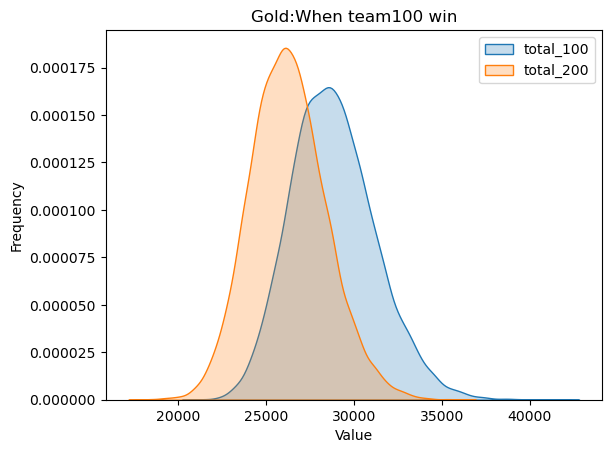

In [108]:
sns.kdeplot( data=matchdata_blue['totalGold_100'],shade=True,label='total_100')
sns.kdeplot( data=matchdata_blue['totalGold_200'],shade=True,label='total_200')
plt.legend()
plt.title('Gold:When team100 win')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()


# 역전에 관한 파생변수 확인해보기

In [7]:
#이긴 팀보다 (블루팀) 보다 진 팀(레드팀)의 총골드량이 많은 경우 
matchdata_blueGold=matchdata_blue[matchdata_blue['totalGold_100']<matchdata_blue['totalGold_200']]
matchdata_blueGold

matchid championName_100_1 championName_100_2 championName_100_3  \
0      KR_6965278983              Teemo               Ekko           Tristana   
1      KR_6961163006        Mordekaiser                 Vi             Irelia   
6      KR_6973961121               Kled                Jax           Kassadin   
18     KR_6749874938              Vayne            Morgana               Azir   
19     KR_6949084426                Jax              Briar               Yone   
...              ...                ...                ...                ...   
37793  KR_6977545105            Camille           MasterYi                Vex   
37814  KR_6923727382           MasterYi              Shaco         Cassiopeia   
37842  KR_6941190304             Irelia                 Vi               Yone   
37857  KR_6985534853              Karma             LeeSin                Zed   
37870  KR_6970839806              Kayle            Shyvana               Ekko   

      championName_100_4 championName_100_5 championName_200_6  \
0                  Nilah             Maokai               Ryze   
1                Smolder                Lux           Volibear   
6                Caitlyn                Lux              Teemo   
18                Ezreal               Bard              Fiora   
19           MissFortune           Pantheon             Darius   
...                  ...                ...                ...   
37793             Lucian               Nami               Sett   
37814            Caitlyn              Senna          Gangplank   
37842        TwistedFate           Nautilus               Sett   
37857             Ezreal              Amumu              Jayce   
37870              Xayah         Blitzcrank             Darius   

      championName_200_7 championName_200_8 championName_200_9  \
0                 LeeSin        TwistedFate             Ezreal   
1                   Ekko              Galio             Ezreal   
6               JarvanIV             Xerath             Ezreal   
18              Pantheon             Xerath               Jhin   
19                LeeSin               Fizz              Varus   
...                  ...                ...                ...   
37793             Rammus               Ahri        MissFortune   
37814            Evelynn              Talon              Varus   
37842             LeeSin              Corki              Yasuo   
37857              Ivern              Yasuo              Vayne   
37870             LeeSin                Lux            Smolder   

      championName_200_10 teamPosition_100_1 teamPosition_100_2  \
0                   Karma                TOP             JUNGLE   
1                     Zoe                TOP             JUNGLE   
6                  Thresh                TOP             JUNGLE   
18                 LeeSin                TOP             JUNGLE   
19                  Sylas                TOP             JUNGLE   
...                   ...                ...                ...   
37793               Shaco                TOP             JUNGLE   
37814                Hwei                TOP             JUNGLE   
37842             Morgana                TOP             JUNGLE   
37857               Yuumi                TOP             JUNGLE   
37870               Senna                TOP             JUNGLE   

      teamPosition_100_3 teamPosition_100_4 teamPosition_100_5  \
0                 MIDDLE             BOTTOM            UTILITY   
1                 MIDDLE             BOTTOM            UTILITY   
6                 MIDDLE             BOTTOM            UTILITY   
18                MIDDLE             BOTTOM            UTILITY   
19                MIDDLE             BOTTOM            UTILITY   
...                  ...                ...                ...   
37793             MIDDLE             BOTTOM            UTILITY   
37814             MIDDLE             BOTTOM            UTILITY   
37842             MIDDLE             BOTTOM            

In [ ]:
matchdata_blueGold

In [111]:
match_total

matchid  gameDuration  team100_baron  team100_champion  \
0      KR_6965278983        1927.0            2.0              32.0   
1      KR_6961163006        1524.0            1.0              34.0   
2      KR_6990258458         925.0            0.0              10.0   
3      KR_6991192961        1764.0            1.0              31.0   
4      KR_6987828402        1852.0            1.0              30.0   
...              ...           ...            ...               ...   
44526  KR_6994298817         103.0            0.0               0.0   
44527  KR_6972979983        1837.0            2.0              47.0   
44528  KR_6975916818        1513.0            0.0              28.0   
44529  KR_6968177944        1974.0            0.0              23.0   
44530  KR_6961832296        1326.0            0.0              36.0   

       team100_dragon  team100_horde  team100_inhibitor  team100_tower  \
0                 3.0            3.0                2.0           11.0   
1                 3.0            6.0                2.0           10.0   
2                 0.0            3.0                0.0            0.0   
3                 4.0            2.0                2.0           10.0   
4                 5.0            4.0                4.0           11.0   
...               ...            ...                ...            ...   
44526             0.0            0.0                0.0            0.0   
44527             2.0            6.0                3.0           11.0   
44528             1.0            3.0                0.0            1.0   
44529             1.0            6.0                0.0            4.0   
44530             2.0            0.0                0.0            5.0   

       team200_baron  team200_champion  team200_dragon  team200_horde  \
0                0.0              33.0             2.0            3.0   
1                0.0              25.0             1.0            0.0   
2                0.0              19.0             1.0            3.0   
3                0.0               9.0             0.0            3.0   
4                1.0              21.0             0.0            2.0   
...              ...               ...             ...            ...   
44526            0.0               0.0             0.0            0.0   
44527            0.0              36.0             2.0            0.0   
44528            0.0              44.0             3.0            0.0   
44529            2.0              35.0             4.0            0.0   
44530            0.0              15.0             0.0            3.0   

       team200_inhibitor  team200_tower  player0visionScore  \
0                    1.0            7.0                31.0   
1                    0.0            2.0                14.0   
2                    0.0            0.0                 9.0   
3                    0.0            2.0                 9.0   
4                    0.0            1.0                21.0   
...                  ...            ...                 ...   
44526                0.0            0.0                 0.0   
44527                0.0            5.0                19.0   
44528                2.0           10.0                13.0   
44529                0.0            6.0                21.0   
44530                0.0            0.0                17.0   

       player0wardsKilled  player0wardsPlaced  player0champLevel  \
0                     8.0                 8.0               18.0   
1                     0.0                 9.0               15.0   
2                     0.0                 6.0               10.0   
3                     0.0                 6.0               16.0   
4                     2.0                11.0               16.0   
...                   ...                 ...                ...   
44526                 0.0                 1.0                1.0   
44527                 1.0                10.0               17.0   
44528                 1.0

In [122]:
merged_df2=pd.merge(match_total,matchdata_blueGold, on='matchid', how='inner')
merged_df2

matchid  gameDuration  team100_baron  team100_champion  \
0     KR_6965278983        1927.0            2.0              32.0   
1     KR_6961163006        1524.0            1.0              34.0   
2     KR_6973961121        1814.0            1.0              25.0   
3     KR_6749874938        1857.0            0.0              46.0   
4     KR_6949084426        1841.0            2.0              45.0   
...             ...           ...            ...               ...   
4538  KR_6977545105        2034.0            0.0              41.0   
4539  KR_6923727382        2727.0            1.0              58.0   
4540  KR_6941190304        1829.0            2.0              42.0   
4541  KR_6985534853        1880.0            0.0              46.0   
4542  KR_6970839806        2163.0            3.0              33.0   

      team100_dragon  team100_horde  team100_inhibitor  team100_tower  \
0                3.0            3.0                2.0           11.0   
1                3.0            6.0                2.0           10.0   
2                4.0            6.0                3.0           10.0   
3                1.0            0.0                2.0            8.0   
4                2.0            1.0                3.0           10.0   
...              ...            ...                ...            ...   
4538             2.0            0.0                2.0           10.0   
4539             1.0            0.0                2.0            7.0   
4540             2.0            5.0                2.0            8.0   
4541             4.0            3.0                1.0            8.0   
4542             1.0            2.0                3.0           11.0   

      team200_baron  team200_champion  team200_dragon  team200_horde  \
0               0.0              33.0             2.0            3.0   
1               0.0              25.0             1.0            0.0   
2               0.0              29.0             1.0            0.0   
3               1.0              39.0             1.0            0.0   
4               0.0              32.0             2.0            5.0   
...             ...               ...             ...            ...   
4538            1.0              46.0             3.0            6.0   
4539            0.0              73.0             4.0            6.0   
4540            0.0              29.0             2.0            1.0   
4541            2.0              32.0             1.0            3.0   
4542            0.0              49.0             4.0            1.0   

      team200_inhibitor  team200_tower  player0visionScore  \
0                   1.0            7.0                31.0   
1                   0.0            2.0                14.0   
2                   0.0            2.0                22.0   
3                   0.0            3.0                26.0   
4                   0.0            2.0                24.0   
...                 ...            ...                 ...   
4538                0.0            6.0                27.0   
4539                1.0            7.0                41.0   
4540                2.0            9.0                15.0   
4541                1.0            8.0                29.0   
4542                1.0            6.0                30.0   

      player0wardsKilled  player0wardsPlaced  player0champLevel  \
0                    8.0                 8.0               18.0   
1                    0.0                 9.0               15.0   
2                    3.0                 8.0               15.0   
3                    5.0                 9.0               17.0   
4                    5.0                10.0               18.0   
...                  ...                 ...                ...   
4538                 5.0                10.0               18.0   
4539                10.0                 8.0               18.0   
4540                 1.0                 8.0               18.0   
4541          

In [117]:
merged_df2['gameDuration'].describe() 
# 최대 55분 최소 15분 평균 33분 

count    4352.000000
mean     1935.216682
std       318.404748
min       922.000000
25%      1717.750000
50%      1911.000000
75%      2140.000000
max      3361.000000
Name: gameDuration, dtype: float64

(array([  27.,  117.,  651., 1304., 1172.,  737.,  249.,   72.,   18.,
           5.]),
 array([ 922. , 1165.9, 1409.8, 1653.7, 1897.6, 2141.5, 2385.4, 2629.3,
        2873.2, 3117.1, 3361. ]),
 <BarContainer object of 10 artists>)

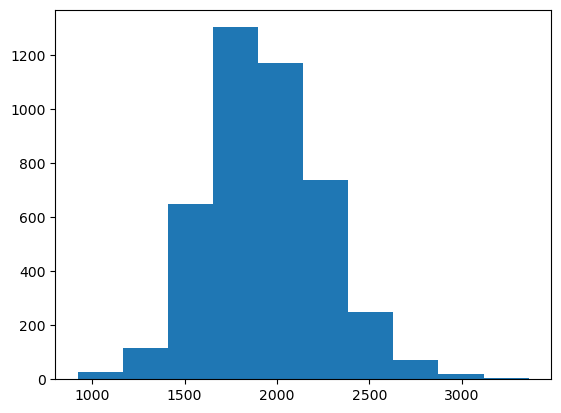

In [121]:
plt.hist(x='gameDuration',data=merged_df2)

# 4543개

In [86]:
#이긴팀이 레드팀일때 
matchdata_red=matchdata[matchdata['winteam']=='[200]']
matchdata_red['totalGold_100']=matchdata_red['totalGold_100_1']+matchdata_red['totalGold_100_2']+matchdata_red['totalGold_100_3']+matchdata_red['totalGold_100_4']+matchdata_red['totalGold_100_5']
matchdata_red['totalGold_200']=matchdata_red['totalGold_200_6']+matchdata_red['totalGold_200_7']+matchdata_red['totalGold_200_8']+matchdata_red['totalGold_200_9']+matchdata_red['totalGold_200_10']
matchdata_red

C:\Users\jys72\AppData\Local\Temp\ipykernel_8368\1247551345.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matchdata_red['totalGold_100']=matchdata_red['totalGold_100_1']+matchdata_red['totalGold_100_2']+matchdata_red['totalGold_100_3']+matchdata_red['totalGold_100_4']+matchdata_red['totalGold_100_5']
C:\Users\jys72\AppData\Local\Temp\ipykernel_8368\1247551345.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matchdata_red['totalGold_200']=matchdata_red['totalGold_200_6']+matchdata_red['totalGold_200

matchid championName_100_1 championName_100_2 championName_100_3  \
2      KR_6990258458            XinZhao           Volibear               Ahri   
4      KR_6985798489             Darius              Shaco               Ahri   
7      KR_6957839106            Kalista              Brand              Yasuo   
8      KR_6829343287               Sion             LeeSin               Yone   
10     KR_6932045276           MasterYi             LeeSin              Yasuo   
...              ...                ...                ...                ...   
37871  KR_6877908806           Malphite             LeeSin          Lissandra   
37873  KR_6989534492              Vayne            Hecarim              Sylas   
37874  KR_6980984824            Smolder             LeeSin              Yasuo   
37877  KR_6975916818             Gragas             Graves               Yone   
37878  KR_6968177944           Renekton             Lillia              Akali   

      championName_100_4 championName_100_5 championName_200_6  \
2                Smolder              Braum              Kayle   
4                   Jinx               Bard              Garen   
7                Smolder               Ashe               Ornn   
8                  Kaisa             Thresh               Shen   
10                Ezreal               Zyra            Chogath   
...                  ...                ...                ...   
37871            Caitlyn              Leona              Akali   
37873               Jinx               Rell              Senna   
37874              Vayne            Morgana                Jax   
37877               Jhin             Xerath              Yasuo   
37878             Ezreal              Swain             Aatrox   

      championName_200_7 championName_200_8 championName_200_9  \
2               Nocturne        AurelionSol               Jinx   
4                     Vi               Hwei             KogMaw   
7                 LeeSin               Azir           Tristana   
8                  Talon              Neeko             Ezreal   
10                  Gwen               Yone            Smolder   
...                  ...                ...                ...   
37871               Kayn               Yone              Xayah   
37873           Volibear             Akshan            Smolder   
37874              Elise                Vex               Zeri   
37877              Brand               Hwei             Draven   
37878              Brand               Yone               Zeri   

      championName_200_10 teamPosition_100_1 teamPosition_100_2  \
2                 Camille                TOP             JUNGLE   
4                    Lulu                TOP             JUNGLE   
7                    Hwei                TOP             JUNGLE   
8              Blitzcrank                TOP             JUNGLE   
10                 Maokai                TOP             JUNGLE   
...                   ...                ...                ...   
37871                Pyke                TOP             JUNGLE   
37873               Janna                TOP             JUNGLE   
37874                Lulu                TOP             JUNGLE   
37877          Blitzcrank                TOP             JUNGLE   
37878                Lulu                TOP             JUNGLE   

      teamPosition_100_3 teamPosition_100_4 teamPosition_100_5  \
2                 MIDDLE             BOTTOM            UTILITY   
4                 MIDDLE             BOTTOM            UTILITY   
7                 MIDDLE             BOTTOM            UTILITY   
8                 MIDDLE             BOTTOM            UTILITY   
10                MIDDLE             BOTTOM            UTILITY   
...                  ...                ...                ...   
37871             MIDDLE             BOTTOM            UTILITY   
37873             MIDDLE             BOTTOM            UTILITY   
37874             MIDDLE             BOTTOM            

C:\Users\jys72\AppData\Local\Temp\ipykernel_8368\1407314263.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot( data=matchdata_red['totalGold_100'],shade=True,label='total_100')
C:\Users\jys72\AppData\Local\Temp\ipykernel_8368\1407314263.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot( data=matchdata_red['totalGold_200'],shade=True,label='total_200')


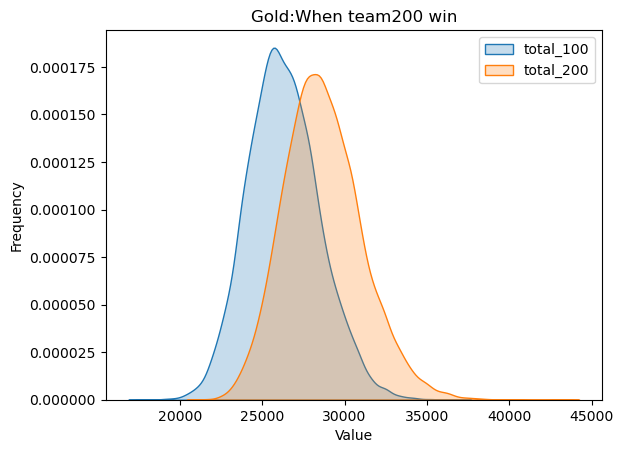

In [87]:
sns.kdeplot( data=matchdata_red['totalGold_100'],shade=True,label='total_100')
sns.kdeplot( data=matchdata_red['totalGold_200'],shade=True,label='total_200')
plt.legend()
plt.title('Gold:When team200 win')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

In [92]:
# 이긴팀보다 진팀의 총골드량이 많은 경우 
matchdata_red[matchdata_red['totalGold_200']<matchdata_red['totalGold_100']]

matchid championName_100_1 championName_100_2 championName_100_3  \
8      KR_6829343287               Sion             LeeSin               Yone   
11     KR_6989800398           Renekton              Talon            Taliyah   
25     KR_6945579261         Tryndamere                Zac             Viktor   
29     KR_6820800743             Aatrox             LeeSin               Nunu   
33     KR_6935584432             KSante              Briar              Diana   
...              ...                ...                ...                ...   
37850  KR_6895932823        Mordekaiser              Viego               Ekko   
37854  KR_6987908965            DrMundo               Ekko             Irelia   
37858  KR_6989016981             Illaoi            Taliyah               Yone   
37863  KR_6989855553             KSante              Talon           Malphite   
37878  KR_6968177944           Renekton             Lillia              Akali   

      championName_100_4 championName_100_5 championName_200_6  \
8                  Kaisa             Thresh               Shen   
11                Ezreal             Xerath             RekSai   
25                Ezreal           Nautilus             Irelia   
29                 Vayne               Lulu            DrMundo   
33                Ezreal              Shaco                Zac   
...                  ...                ...                ...   
37850             Lucian              Karma             Viktor   
37854              Xayah               Zyra             KSante   
37858               Jinx            Alistar              Fiora   
37863             KogMaw             Thresh                Zac   
37878             Ezreal              Swain             Aatrox   

      championName_200_7 championName_200_8 championName_200_9  \
8                  Talon              Neeko             Ezreal   
11                Khazix               Ahri             Lucian   
25                Lillia                Zed               Jhin   
29                 Briar               Fizz        MissFortune   
33            MonkeyKing              Talon            Smolder   
...                  ...                ...                ...   
37850             Graves          Lissandra              Sivir   
37854           MasterYi                Vex              Varus   
37858             Khazix             Viktor              Kaisa   
37863             LeeSin              Sylas               Jhin   
37878              Brand               Yone               Zeri   

      championName_200_10 teamPosition_100_1 teamPosition_100_2  \
8              Blitzcrank                TOP             JUNGLE   
11                  Annie                TOP             JUNGLE   
25                   Rell                TOP             JUNGLE   
29                 Rammus                TOP             JUNGLE   
33                  Yuumi                TOP             JUNGLE   
...                   ...                ...                ...   
37850                Lulu                TOP             JUNGLE   
37854                Ashe                TOP             JUNGLE   
37858               Milio                TOP             JUNGLE   
37863                Ashe                TOP             JUNGLE   
37878                Lulu                TOP             JUNGLE   

      teamPosition_100_3 teamPosition_100_4 teamPosition_100_5  \
8                 MIDDLE             BOTTOM            UTILITY   
11                MIDDLE             BOTTOM            UTILITY   
25                MIDDLE             BOTTOM            UTILITY   
29                MIDDLE             BOTTOM            UTILITY   
33                MIDDLE             BOTTOM            UTILITY   
...                  ...                ...                ...   
37850             MIDDLE             BOTTOM            UTILITY   
37854             MIDDLE             BOTTOM            UTILITY   
37858             MIDDLE             BOTTOM            

# 4513개 

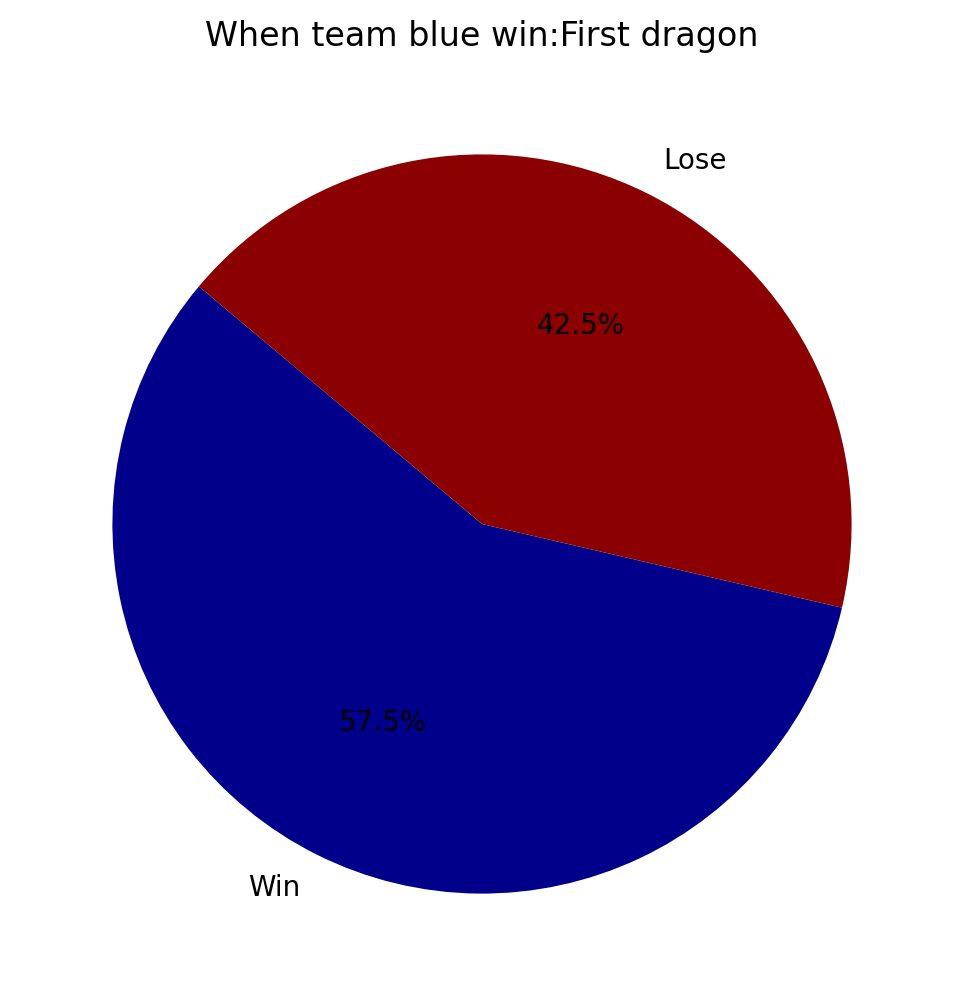

In [214]:
#이긴팀이 블루팀일 경우에 승률 
ratio=[sum(winblue['blue_firstdragon']),19636-11550]
labels=['Win','Lose']
colors = ['darkblue','darkred']
plt.figure(figsize=(6, 6))  # 차트의 크기 설정 (가로, 세로)
plt.pie(ratio,labels=labels,colors=colors ,autopct='%1.1f%%', startangle=140)
plt.title('When team blue win:First dragon')
plt.show()

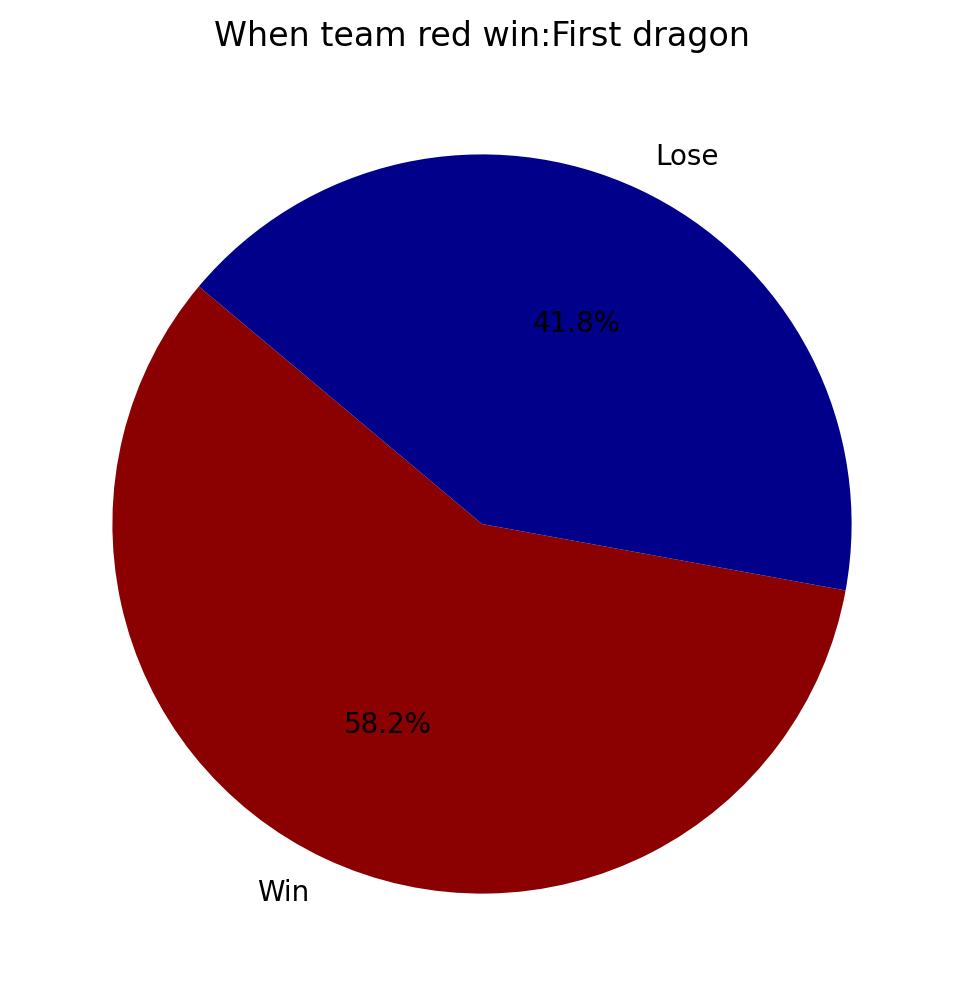

In [215]:
#이긴팀이 레드팀일 경우에 승률 
ratio=[sum(winred['red_firstkill']),18244-sum(winred['red_firstkill'])]
labels=['Win','Lose']
colors = ['darkred','darkblue']
plt.figure(figsize=(6, 6))  # 차트의 크기 설정 (가로, 세로)
plt.pie(ratio,labels=labels, colors=colors,autopct='%1.1f%%', startangle=140)
plt.title('When team red win:First dragon')
plt.show()

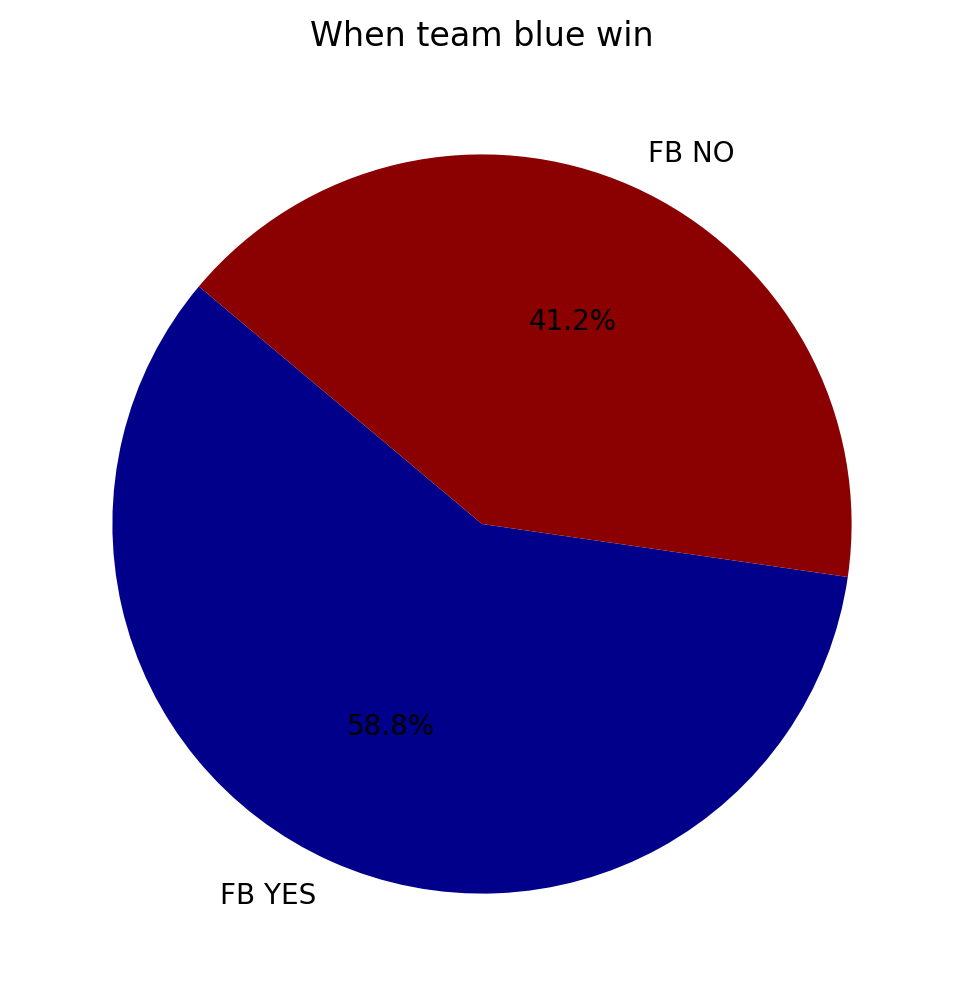

In [220]:
#이긴팀이 블루팀일 경우에 승률 
ratio=[sum(winblue['blue_firstkill']),19636-11550]
labels=['FB YES','FB NO']
colors = ['darkblue','darkred']
plt.figure(figsize=(6, 6))  # 차트의 크기 설정 (가로, 세로)
plt.pie(ratio,labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('When team blue win')
plt.show()

## 퍼스트 블러드 기록시 승률 

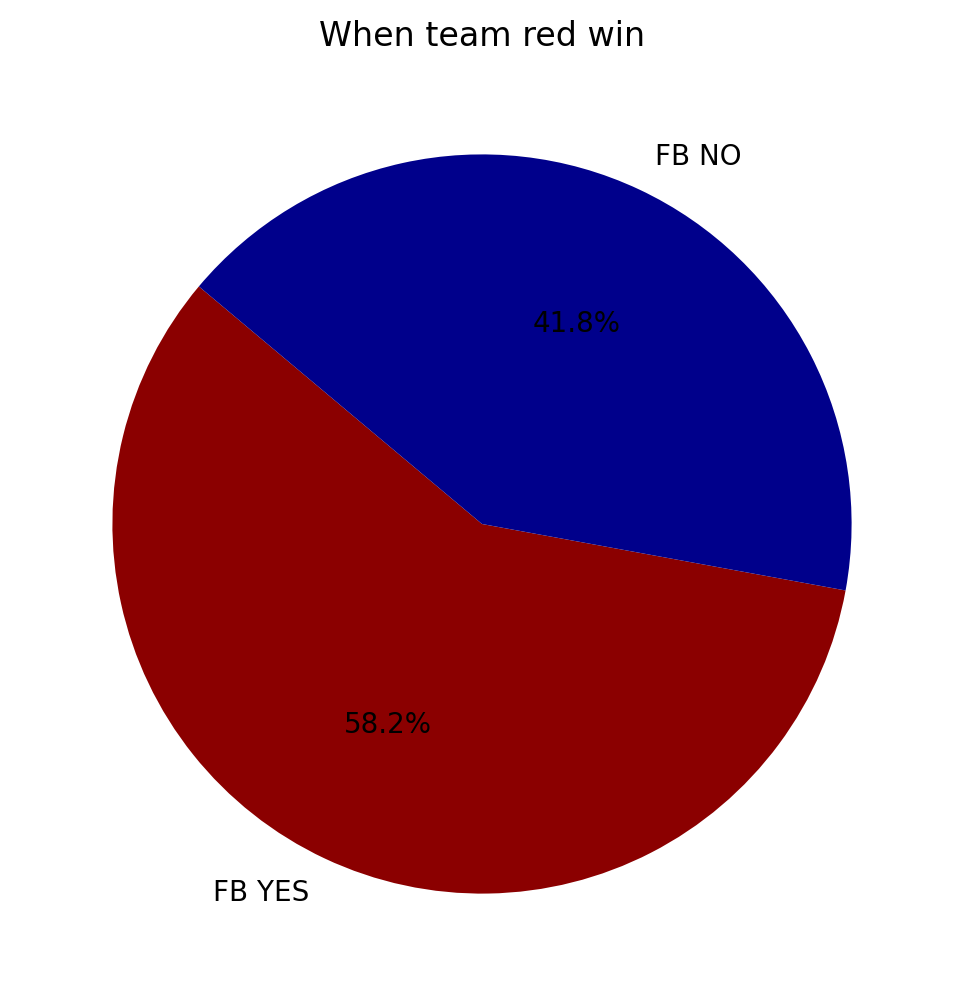

In [221]:
#이긴팀이 레드팀일 경우에 승률 
ratio=[sum(winred['red_firstkill']),18244-sum(winred['red_firstkill'])]
labels=['FB YES','FB NO']
colors = ['darkred','darkblue']
plt.figure(figsize=(6, 6))  # 차트의 크기 설정 (가로, 세로)
plt.pie(ratio,labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('When team red win')
plt.show()

In [22]:
matchdata_blue

matchid championName_100_1 championName_100_2 championName_100_3  \
0      KR_6965278983              Teemo               Ekko           Tristana   
1      KR_6961163006        Mordekaiser                 Vi             Irelia   
3      KR_6987828402          Gangplank            Nidalee           Tristana   
5      KR_6948539783              Poppy                 Vi           Malphite   
6      KR_6973961121               Kled                Jax           Kassadin   
...              ...                ...                ...                ...   
37870  KR_6970839806              Kayle            Shyvana               Ekko   
37872  KR_6903747095             Rumble             LeeSin             Anivia   
37875  KR_6879214617             Illaoi              Ivern             Syndra   
37876  KR_6972979983            Karthus             Singed             Aatrox   
37879  KR_6961832296               Gnar              Sylas                Zed   

      championName_100_4 championName_100_5 championName_200_6  \
0                  Nilah             Maokai               Ryze   
1                Smolder                Lux           Volibear   
3                  Varus               Lulu              Karma   
5                 Twitch               Pyke              Kayle   
6                Caitlyn                Lux              Teemo   
...                  ...                ...                ...   
37870              Xayah         Blitzcrank             Darius   
37872             Lucian              Sylas             Kennen   
37875               Jinx               Sett             Darius   
37876           Tristana           Nautilus               Sett   
37879        MissFortune             Soraka               Gwen   

      championName_200_7 championName_200_8 championName_200_9  ...  \
0                 LeeSin        TwistedFate             Ezreal  ...   
1                   Ekko              Galio             Ezreal  ...   
3             MonkeyKing              Brand               Jinx  ...   
5                 Khazix              Akali           Aphelios  ...   
6               JarvanIV             Xerath             Ezreal  ...   
...                  ...                ...                ...  ...   
37870             LeeSin                Lux            Smolder  ...   
37872             Graves               Azir            Caitlyn  ...   
37875             Graves              Neeko               Ashe  ...   
37876             Khazix            Taliyah              Xayah  ...   
37879              Viego              Talon             Ezreal  ...   

      player4magicdamage player5magicdamage player6magicdamage  \
0                    0.0             3382.0             8017.0   
1                  723.0             4491.0             2548.0   
3                 1270.0             1326.0             5847.0   
5                    0.0                0.0             3071.0   
6                  467.0             4857.0             6670.0   
...                  ...                ...                ...   
37870              253.0             1013.0                0.0   
37872              995.0             7247.0             5581.0   
37875              300.0              276.0                0.0   
37876              802.0             1985.0                0.0   
37879              351.0             2568.0             3573.0   

      player7magicdamage player8magicdamage player9magicdamage  \
0                 1577.0             4515.0             1453.0   
1                 4958.0             4583.0             2889.0   
3                  562.0             6563.0              191.0   
5                  115.0             3773.0              497.0   
6                  238.0             9125.0             1928.0   
...                  ...                ...                ...   
37870             1206.0             9217.0             1519.0   
37872              340.0             5606.0              390.0   
37875  

## 파생변수 설정하기 : KDA (Kill+Death/ Assist) 
#### 팀별 KDA의 합으로 보여주기?

In [8]:
# Assuming matchdata is a pandas DataFrame
for j in range(0,37880):
    for i in range(1, 11):
        if (matchdata[f'player{i}deaths'] == 0).any():
            matchdata.loc[j, f'player{i}_KDA'] = (matchdata.loc[j, f'player{i}kills'] + matchdata.loc[j, f'player{i}assists'])*1.2
        else:
            matchdata.loc[j, f'player{i}_KDA'] = (matchdata.loc[j, f'player{i}kills'] + matchdata.loc[j, f'player{i}assists']) / matchdata.loc[j,f'player{i}deaths']


In [10]:
matchdata

matchid championName_100_1 championName_100_2 championName_100_3  \
0      KR_6965278983              Teemo               Ekko           Tristana   
1      KR_6961163006        Mordekaiser                 Vi             Irelia   
2      KR_6990258458            XinZhao           Volibear               Ahri   
3      KR_6987828402          Gangplank            Nidalee           Tristana   
4      KR_6985798489             Darius              Shaco               Ahri   
...              ...                ...                ...                ...   
37875  KR_6879214617             Illaoi              Ivern             Syndra   
37876  KR_6972979983            Karthus             Singed             Aatrox   
37877  KR_6975916818             Gragas             Graves               Yone   
37878  KR_6968177944           Renekton             Lillia              Akali   
37879  KR_6961832296               Gnar              Sylas                Zed   

      championName_100_4 championName_100_5 championName_200_6  \
0                  Nilah             Maokai               Ryze   
1                Smolder                Lux           Volibear   
2                Smolder              Braum              Kayle   
3                  Varus               Lulu              Karma   
4                   Jinx               Bard              Garen   
...                  ...                ...                ...   
37875               Jinx               Sett             Darius   
37876           Tristana           Nautilus               Sett   
37877               Jhin             Xerath              Yasuo   
37878             Ezreal              Swain             Aatrox   
37879        MissFortune             Soraka               Gwen   

      championName_200_7 championName_200_8 championName_200_9  \
0                 LeeSin        TwistedFate             Ezreal   
1                   Ekko              Galio             Ezreal   
2               Nocturne        AurelionSol               Jinx   
3             MonkeyKing              Brand               Jinx   
4                     Vi               Hwei             KogMaw   
...                  ...                ...                ...   
37875             Graves              Neeko               Ashe   
37876             Khazix            Taliyah              Xayah   
37877              Brand               Hwei             Draven   
37878              Brand               Yone               Zeri   
37879              Viego              Talon             Ezreal   

      championName_200_10 teamPosition_100_1 teamPosition_100_2  \
0                   Karma                TOP             JUNGLE   
1                     Zoe                TOP             JUNGLE   
2                 Camille                TOP             JUNGLE   
3                  Maokai                TOP             JUNGLE   
4                    Lulu                TOP             JUNGLE   
...                   ...                ...                ...   
37875              Thresh                TOP             JUNGLE   
37876               Leona                TOP             JUNGLE   
37877          Blitzcrank                TOP             JUNGLE   
37878                Lulu                TOP             JUNGLE   
37879               Senna                TOP             JUNGLE   

      teamPosition_100_3 teamPosition_100_4 teamPosition_100_5  \
0                 MIDDLE             BOTTOM            UTILITY   
1                 MIDDLE             BOTTOM            UTILITY   
2                 MIDDLE             BOTTOM            UTILITY   
3                 MIDDLE             BOTTOM            UTILITY   
4                 MIDDLE             BOTTOM            UTILITY   
...                  ...                ...                ...   
37875             MIDDLE             BOTTOM            UTILITY   
37876             MIDDLE             BOTTOM            UTILITY   
37877             MIDDLE             BOTTOM            

In [11]:
matchdata.to_csv('dataframe1.csv', index=False) 

In [72]:
matchdata_blue=matchdata[matchdata['winteam']=='[100]']
matchdata_blue

matchid championName_100_1 championName_100_2 championName_100_3  \
0      KR_6965278983              Teemo               Ekko           Tristana   
1      KR_6961163006        Mordekaiser                 Vi             Irelia   
3      KR_6987828402          Gangplank            Nidalee           Tristana   
5      KR_6948539783              Poppy                 Vi           Malphite   
6      KR_6973961121               Kled                Jax           Kassadin   
...              ...                ...                ...                ...   
37870  KR_6970839806              Kayle            Shyvana               Ekko   
37872  KR_6903747095             Rumble             LeeSin             Anivia   
37875  KR_6879214617             Illaoi              Ivern             Syndra   
37876  KR_6972979983            Karthus             Singed             Aatrox   
37879  KR_6961832296               Gnar              Sylas                Zed   

      championName_100_4 championName_100_5 championName_200_6  \
0                  Nilah             Maokai               Ryze   
1                Smolder                Lux           Volibear   
3                  Varus               Lulu              Karma   
5                 Twitch               Pyke              Kayle   
6                Caitlyn                Lux              Teemo   
...                  ...                ...                ...   
37870              Xayah         Blitzcrank             Darius   
37872             Lucian              Sylas             Kennen   
37875               Jinx               Sett             Darius   
37876           Tristana           Nautilus               Sett   
37879        MissFortune             Soraka               Gwen   

      championName_200_7 championName_200_8 championName_200_9  \
0                 LeeSin        TwistedFate             Ezreal   
1                   Ekko              Galio             Ezreal   
3             MonkeyKing              Brand               Jinx   
5                 Khazix              Akali           Aphelios   
6               JarvanIV             Xerath             Ezreal   
...                  ...                ...                ...   
37870             LeeSin                Lux            Smolder   
37872             Graves               Azir            Caitlyn   
37875             Graves              Neeko               Ashe   
37876             Khazix            Taliyah              Xayah   
37879              Viego              Talon             Ezreal   

      championName_200_10 teamPosition_100_1 teamPosition_100_2  \
0                   Karma                TOP             JUNGLE   
1                     Zoe                TOP             JUNGLE   
3                  Maokai                TOP             JUNGLE   
5                Nautilus                TOP             JUNGLE   
6                  Thresh                TOP             JUNGLE   
...                   ...                ...                ...   
37870               Senna                TOP             JUNGLE   
37872          Blitzcrank                TOP             JUNGLE   
37875              Thresh                TOP             JUNGLE   
37876               Leona                TOP             JUNGLE   
37879               Senna                TOP             JUNGLE   

      teamPosition_100_3 teamPosition_100_4 teamPosition_100_5  \
0                 MIDDLE             BOTTOM            UTILITY   
1                 MIDDLE             BOTTOM            UTILITY   
3                 MIDDLE             BOTTOM            UTILITY   
5                 MIDDLE             BOTTOM            UTILITY   
6                 MIDDLE             BOTTOM            UTILITY   
...                  ...                ...                ...   
37870             MIDDLE             BOTTOM            UTILITY   
37872             MIDDLE             BOTTOM            UTILITY   
37875             MIDDLE             BOTTOM            

In [96]:
matchdata_red=matchdata[matchdata['winteam']=='[200]']
matchdata_red
matchdata_red['total100_KDA']=matchdata_red['player1_KDA']+matchdata_red['player2_KDA']+matchdata_red['player3_KDA']+matchdata_red['player4_KDA']+matchdata_red['player5_KDA']
matchdata_red['total200_KDA']=matchdata_red['player7_KDA']+matchdata_red['player6_KDA']+matchdata_red['player8_KDA']+matchdata_red['player9_KDA']+matchdata_red['player10_KDA']
matchdata_red

C:\Users\jys72\AppData\Local\Temp\ipykernel_8368\1096081651.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matchdata_red['total100_KDA']=matchdata_red['player1_KDA']+matchdata_red['player2_KDA']+matchdata_red['player3_KDA']+matchdata_red['player4_KDA']+matchdata_red['player5_KDA']
C:\Users\jys72\AppData\Local\Temp\ipykernel_8368\1096081651.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matchdata_red['total200_KDA']=matchdata_red['player7_KDA']+matchdata_red['player6_KDA']+matchdata_red['player8_KD

matchid championName_100_1 championName_100_2 championName_100_3  \
2      KR_6990258458            XinZhao           Volibear               Ahri   
4      KR_6985798489             Darius              Shaco               Ahri   
7      KR_6957839106            Kalista              Brand              Yasuo   
8      KR_6829343287               Sion             LeeSin               Yone   
10     KR_6932045276           MasterYi             LeeSin              Yasuo   
...              ...                ...                ...                ...   
37871  KR_6877908806           Malphite             LeeSin          Lissandra   
37873  KR_6989534492              Vayne            Hecarim              Sylas   
37874  KR_6980984824            Smolder             LeeSin              Yasuo   
37877  KR_6975916818             Gragas             Graves               Yone   
37878  KR_6968177944           Renekton             Lillia              Akali   

      championName_100_4 championName_100_5 championName_200_6  \
2                Smolder              Braum              Kayle   
4                   Jinx               Bard              Garen   
7                Smolder               Ashe               Ornn   
8                  Kaisa             Thresh               Shen   
10                Ezreal               Zyra            Chogath   
...                  ...                ...                ...   
37871            Caitlyn              Leona              Akali   
37873               Jinx               Rell              Senna   
37874              Vayne            Morgana                Jax   
37877               Jhin             Xerath              Yasuo   
37878             Ezreal              Swain             Aatrox   

      championName_200_7 championName_200_8 championName_200_9  \
2               Nocturne        AurelionSol               Jinx   
4                     Vi               Hwei             KogMaw   
7                 LeeSin               Azir           Tristana   
8                  Talon              Neeko             Ezreal   
10                  Gwen               Yone            Smolder   
...                  ...                ...                ...   
37871               Kayn               Yone              Xayah   
37873           Volibear             Akshan            Smolder   
37874              Elise                Vex               Zeri   
37877              Brand               Hwei             Draven   
37878              Brand               Yone               Zeri   

      championName_200_10 teamPosition_100_1 teamPosition_100_2  \
2                 Camille                TOP             JUNGLE   
4                    Lulu                TOP             JUNGLE   
7                    Hwei                TOP             JUNGLE   
8              Blitzcrank                TOP             JUNGLE   
10                 Maokai                TOP             JUNGLE   
...                   ...                ...                ...   
37871                Pyke                TOP             JUNGLE   
37873               Janna                TOP             JUNGLE   
37874                Lulu                TOP             JUNGLE   
37877          Blitzcrank                TOP             JUNGLE   
37878                Lulu                TOP             JUNGLE   

      teamPosition_100_3 teamPosition_100_4 teamPosition_100_5  \
2                 MIDDLE             BOTTOM            UTILITY   
4                 MIDDLE             BOTTOM            UTILITY   
7                 MIDDLE             BOTTOM            UTILITY   
8                 MIDDLE             BOTTOM            UTILITY   
10                MIDDLE             BOTTOM            UTILITY   
...                  ...                ...                ...   
37871             MIDDLE             BOTTOM            UTILITY   
37873             MIDDLE             BOTTOM            UTILITY   
37874             MIDDLE             BOTTOM            

C:\Users\jys72\AppData\Local\Temp\ipykernel_8368\4118575604.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot( data=matchdata_red['total100_KDA'],shade=True,label='total_100')
C:\Users\jys72\AppData\Local\Temp\ipykernel_8368\4118575604.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot( data=matchdata_red['total200_KDA'],shade=True,label='total_200')


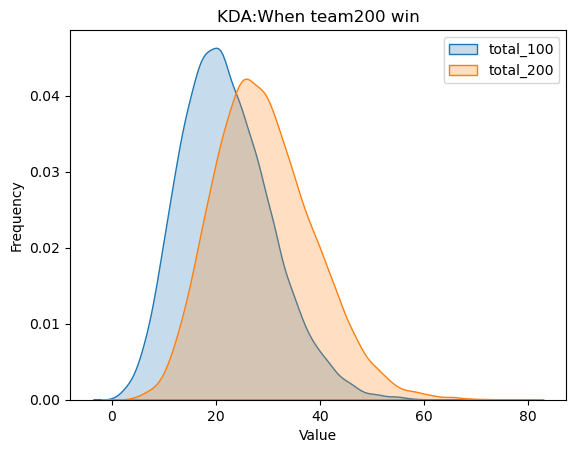

In [97]:
sns.kdeplot( data=matchdata_red['total100_KDA'],shade=True,label='total_100')
sns.kdeplot( data=matchdata_red['total200_KDA'],shade=True,label='total_200')
plt.legend()
plt.title('KDA:When team200 win')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

In [98]:
matchdata_red[matchdata_red['total200_KDA']<matchdata_red['total100_KDA']]

matchid championName_100_1 championName_100_2 championName_100_3  \
8      KR_6829343287               Sion             LeeSin               Yone   
25     KR_6945579261         Tryndamere                Zac             Viktor   
26     KR_6819224268              Riven       FiddleSticks              Galio   
29     KR_6820800743             Aatrox             LeeSin               Nunu   
33     KR_6935584432             KSante              Briar              Diana   
...              ...                ...                ...                ...   
37850  KR_6895932823        Mordekaiser              Viego               Ekko   
37855  KR_6985773340           Volibear                Jax           Vladimir   
37858  KR_6989016981             Illaoi            Taliyah               Yone   
37877  KR_6975916818             Gragas             Graves               Yone   
37878  KR_6968177944           Renekton             Lillia              Akali   

      championName_100_4 championName_100_5 championName_200_6  \
8                  Kaisa             Thresh               Shen   
25                Ezreal           Nautilus             Irelia   
26                  Jhin             Thresh            Trundle   
29                 Vayne               Lulu            DrMundo   
33                Ezreal              Shaco                Zac   
...                  ...                ...                ...   
37850             Lucian              Karma             Viktor   
37855              Senna           Nautilus             Illaoi   
37858               Jinx            Alistar              Fiora   
37877               Jhin             Xerath              Yasuo   
37878             Ezreal              Swain             Aatrox   

      championName_200_7 championName_200_8 championName_200_9  \
8                  Talon              Neeko             Ezreal   
25                Lillia                Zed               Jhin   
26               Karthus             Viktor             Ezreal   
29                 Briar               Fizz        MissFortune   
33            MonkeyKing              Talon            Smolder   
...                  ...                ...                ...   
37850             Graves          Lissandra              Sivir   
37855             LeeSin              Akali             Lucian   
37858             Khazix             Viktor              Kaisa   
37877              Brand               Hwei             Draven   
37878              Brand               Yone               Zeri   

      championName_200_10 teamPosition_100_1 teamPosition_100_2  \
8              Blitzcrank                TOP             JUNGLE   
25                   Rell                TOP             JUNGLE   
26                  Yuumi                TOP             JUNGLE   
29                 Rammus                TOP             JUNGLE   
33                  Yuumi                TOP             JUNGLE   
...                   ...                ...                ...   
37850                Lulu                TOP             JUNGLE   
37855               Leona                TOP             JUNGLE   
37858               Milio                TOP             JUNGLE   
37877          Blitzcrank                TOP             JUNGLE   
37878                Lulu                TOP             JUNGLE   

      teamPosition_100_3 teamPosition_100_4 teamPosition_100_5  \
8                 MIDDLE             BOTTOM            UTILITY   
25                MIDDLE             BOTTOM            UTILITY   
26                MIDDLE             BOTTOM            UTILITY   
29                MIDDLE             BOTTOM            UTILITY   
33                MIDDLE             BOTTOM            UTILITY   
...                  ...                ...                ...   
37850             MIDDLE             BOTTOM            UTILITY   
37855             MIDDLE             BOTTOM            UTILITY   
37858             MIDDLE             BOTTOM            

##